In [312]:
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [313]:
# this helps with scrolling df
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

In [900]:
def plot_histogram(df, variable, count = True):
    """
    Args:
        df: data frame with categoretical variable and label named as "label"
        column: string - name of column with categorical data
        count: True - returns count plot, False - kde plot
        
    Returns:
        prints histogram based on label split
    
    """
    plt.tight_layout() 
    plt.figure(figsize=(8,6))
    if count:
        sns.countplot(x=variable, hue="label", data=df, palette="hls")
        plt.title("Count of label vs size bins- "+variable,fontsize=20)
        plt.xlabel("Bin size",fontsize=15)
        plt.ylabel("Count",fontsize=15)
        plt.xticks(rotation=45)
        plt.legend(['non-malware','malware'],loc='upper right')
    else:
        sns.displot(x=variable, hue='label',data=df, kind = 'kde', fill = True)

    
    plt.show()

In [315]:
def chi_2(df, variable):
    
    cross_table = pd.crosstab(df['label'],df[variable])
    chi2, p, dof, ex = stats.chi2_contingency(cross_table) 
    alpha = 0.05
    

    print('chi_2 statistic: {:.2f}'.format(chi2))
    print('p_value: {:.2f}'.format(p))
    print("significant level", alpha)
    
    if p <=alpha:
        print('Reject H0, variables have dependency')
    else:
        print('Do not reject H0')

In [348]:
def plot_chi(df, variable, count = True):
    """
    Args: 
        df:
        variable:
        count: says if we have categorical variable
    Returns: 
    Chi2 table and hist plot
    """
    
    plot_histogram(df, variable, count)
    chi_2(df, variable)

In [349]:
# import JSON
df_all = pd.read_json('sample_data_6k.jsonl', lines=True)

In [350]:
non_mal = df_all[df_all.label==0].sample(1932,random_state=3)

In [351]:
# filter out label -1 and reset index as it mixes
df = pd.concat([df_all[df_all.label==1], non_mal]).reset_index()

In [352]:
# drop "index" column
df.drop(['index'],axis=1,  inplace = True)

In [353]:
# extract section only
section = pd.json_normalize(df['section'], record_prefix = "section")

In [354]:
# add label to set
section['label']= df.label
section['sha256'] = df.sha256

In [27]:
df.index

RangeIndex(start=0, stop=3864, step=1)

In [355]:
section['new_entry'] = section.entry.apply(lambda x: "'"+x+"'")

In [356]:
section[section.entry=='.MPRESS1' ]

entry                                           sections  label                                             sha256   new_entry
280   .MPRESS1  [{'name': '.MPRESS1', 'size': 309248, 'entropy...      1  05919e71542ef5d3f6e6e852bc653a16f1f55cf7b50d11...  '.MPRESS1'
902   .MPRESS1  [{'name': '.MPRESS1', 'size': 322560, 'entropy...      1  02be5e48e40a978222d46668f32c001ea9a06dc8316084...  '.MPRESS1'
959   .MPRESS1  [{'name': '.MPRESS1', 'size': 525312, 'entropy...      1  d1fee1d93fd4bf096cc8b775c36e8f0ee3d06c5565b3c8...  '.MPRESS1'
1055  .MPRESS1  [{'name': '.MPRESS1', 'size': 525312, 'entropy...      1  c1cda3721258b5852755324bae20304c4de3d94b7b135b...  '.MPRESS1'

In [357]:
section.groupby(['new_entry','label']).count()

entry  sections  sha256
new_entry   label                         
'\tO@fw2' 1          1         1       1
'=\n'      1          1         1       1
'   '       0          4         4       4
            1         44        44      44
''          0        211       211     211
            1         63        63      63
'+eQkb'+'  1          1         1       1
'-/
'       1          1         1       1
'.'         1         10        10      10
'.AD8Te'    1          1         1       1
'.CRT2'     1          2         2       2
'.HEYeA'    1          1         1       1
'.MPRESS1'  1          4         4       4
'.adata'    1          1         1       1
'.bss'      0          1         1       1
'.code'     0          2         2       2
            1         79        79      79
'.crt'      1          2         2       2
'.crt1'     1          1         1       1
'.data'     0          4         4       4
            1          2         2       2
'.flat'     1          3         3       3
'.indata'   1          1         1       1
'.itext'    1          2         2       2
'.neolit'   0          7         7       7
            1          1         1       1
'.nsp0'     1          1         1       1
'.orpc'     0          1         1       1
'.pjz'      1          1         1       1
'.rdata'    0          3         3       3
            1          1         1       1
'.reloc'    0          1         1       1
'.rodata'   1          2         2       2
'.rsrc'     0         14        14      14
            1         11        11      11
'.text'    1          2         2       2
'.text'     0       1517      1517    1517
            1       1315      1315    1315
'.textbss'  0          5         5       5
            1          1         1       1
'.vmp0'     1          5         5       5
'.xdata'    0         32        32      32
'.zcode'    1          1         1       1
'.zxdae'    1          1         1       1
'/89'       0          1         1       1
'2sJpMTKE'  1          1         1       1
'3'         1          1         1       1
'7744'      1          1         1       1
'8sj(dsj2'  1          1         1       1
';1,Neu'  1          1         1       1
'ATU0'      1          1         1       1
'AUTO'      1          7         7       7
'CODE'      0         78        78      78
            1        167       167     167
'EPE0'      1          1         1       1
'Ei<VLm'  1          1         1       1
'O3t`yC`'  1          1         1       1
'UPX0'      0         50        50      50
            1        183       183     183
'XbWcczqo'  1          1         1       1
'_TEXT'     1          1         1       1
'code'      0          1         1       1
'tWgK4Qr'  1          1         1       1
'{PA?}!'  1          1         1       1

In [358]:
# https://keystrokes2016.wordpress.com/2016/06/03/pe-file-structure-sections/

standard_entries = ['.text', '.bss', '.rdata', '.data', '.rsrc', '.edata', '.idata', '.pdata', '.debug']

In [359]:
# 1 - entry is in standard entry, 0 - entry is not standard
section['has_non_standard_entry'] = np.where(section['entry'].isin(standard_entries),0,1)

<Figure size 432x288 with 0 Axes>

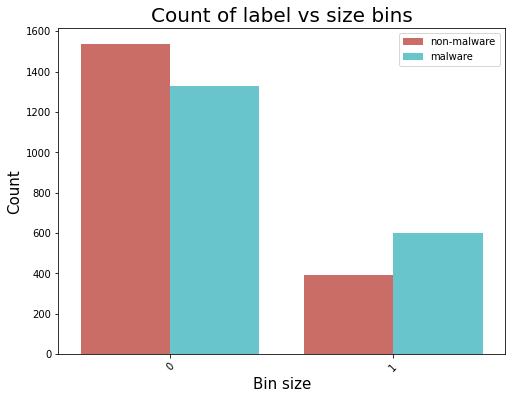

chi_2 statistic: 59.09
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency


In [360]:
plot_chi(section,'has_non_standard_entry')

In [361]:
# how many sections is in the file
section['number_sections'] = section['sections'].apply(lambda x: len(x))

In [431]:
section[section['number_sections']==0].shape

(0, 9)

In [397]:
section.shape

(3864, 9)

In [399]:
section.dropna(inplace= True)

In [400]:
section.shape

(3863, 9)

<Figure size 432x288 with 0 Axes>

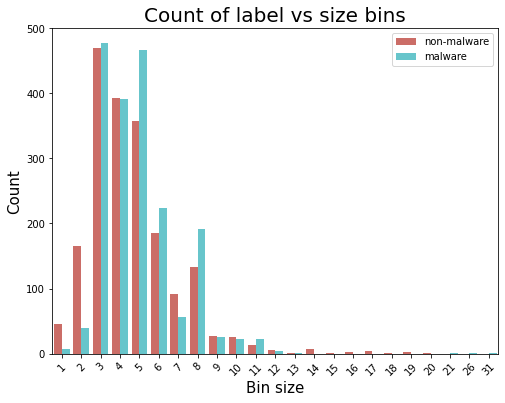

chi_2 statistic: 166.48
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency


In [401]:
plot_chi(section,'number_sections')

In [402]:
def count_non_standard_sections(x, standard_entries = standard_entries):
    """
    Args: 
        x: column  with list of dictionaries
        standard_entries: list of sections considered as standard entries
    Returns: 
        cnt: number of non standard sections
    
    """
    small_df = pd.DataFrame(x)
    
    if small_df.shape[0]==0:
        return(np.NaN)
    else:
        small_df['has_non_standard_sections'] = np.where(small_df.name.isin(standard_entries),0,1)
        cnt = small_df.has_non_standard_sections.sum()
        return cnt
    

In [403]:
# shows how many non standard section is in the file

section['non_standard_sections_cnt'] = section.sections.apply(lambda x: count_non_standard_sections(x))

In [404]:
# non_standard_ratio will be percentage of suspicious sections in total number of sections

section['non_standard_sections_ratio'] = section['non_standard_sections_cnt'] / section['number_sections'] 

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

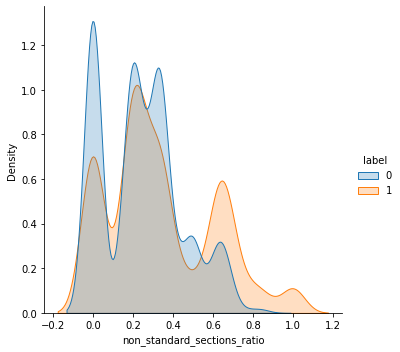

In [405]:
plot_histogram(section,'non_standard_sections_ratio', False)

In [406]:
features_created = ['has_non_standard_entry','number_sections','non_standard_sections_cnt','non_standard_sections_ratio']

In [407]:
features_selected = [ 'has_non_standard_entry','number_sections','non_standard_sections_ratio']

In [73]:
section[features_selected].var()

has_non_standard_entry        0.19
number_sections               4.82
non_standard_sections_ratio   0.06
dtype: float64

In [372]:
section['sections']

0       [{'name': '.code', 'size': 2048, 'entropy': 5....
1       [{'name': '.text', 'size': 262144, 'entropy': ...
2       [{'name': '.text', 'size': 49152, 'entropy': 6...
3       [{'name': '.text', 'size': 512, 'entropy': 0.3...
4       [{'name': 'CODE', 'size': 566272, 'entropy': 6...
                              ...                        
3859    [{'name': '.text', 'size': 16384, 'entropy': 6...
3860    [{'name': '.text', 'size': 1847296, 'entropy':...
3861    [{'name': '.text', 'size': 282112, 'entropy': ...
3862    [{'name': '.text', 'size': 49152, 'entropy': 6...
3863    [{'name': 'UPX0', 'size': 0, 'entropy': -0.0, ...
Name: sections, Length: 3864, dtype: object

In [425]:
test = section.loc[1,"sections"]

[{'name': '.text',
  'size': 262144,
  'entropy': 6.640590471339644,
  'vsize': 261943,
  'props': ['CNT_CODE', 'MEM_EXECUTE', 'MEM_READ']},
 {'name': '.rdata',
  'size': 89600,
  'entropy': 5.312861500677433,
  'vsize': 89294,
  'props': ['CNT_INITIALIZED_DATA', 'MEM_READ']},
 {'name': '.data',
  'size': 7680,
  'entropy': 4.082738959487952,
  'vsize': 11404,
  'props': ['CNT_INITIALIZED_DATA', 'MEM_READ', 'MEM_WRITE']},
 {'name': '.rsrc',
  'size': 749568,
  'entropy': 5.391061498283203,
  'vsize': 749176,
  'props': ['CNT_INITIALIZED_DATA', 'MEM_READ']},
 {'name': '.reloc',
  'size': 15872,
  'entropy': 6.597175132605103,
  'vsize': 15488,
  'props': ['CNT_INITIALIZED_DATA', 'MEM_DISCARDABLE', 'MEM_READ']}]

In [437]:
test

[{'name': '.text',
  'size': 262144,
  'entropy': 6.640590471339644,
  'vsize': 261943,
  'props': ['CNT_CODE', 'MEM_EXECUTE', 'MEM_READ']},
 {'name': '.rdata',
  'size': 89600,
  'entropy': 5.312861500677433,
  'vsize': 89294,
  'props': ['CNT_INITIALIZED_DATA', 'MEM_READ']},
 {'name': '.data',
  'size': 7680,
  'entropy': 4.082738959487952,
  'vsize': 11404,
  'props': ['CNT_INITIALIZED_DATA', 'MEM_READ', 'MEM_WRITE']},
 {'name': '.rsrc',
  'size': 749568,
  'entropy': 5.391061498283203,
  'vsize': 749176,
  'props': ['CNT_INITIALIZED_DATA', 'MEM_READ']},
 {'name': '.reloc',
  'size': 15872,
  'entropy': 6.597175132605103,
  'vsize': 15488,
  'props': ['CNT_INITIALIZED_DATA', 'MEM_DISCARDABLE', 'MEM_READ']}]

In [427]:
df_small = pd.DataFrame(test)

In [428]:
df_small.drop(['size','vsize'], axis=1, inplace=True)

In [429]:
df_small.head()

name  entropy                                              props
0   .text     6.64                  [CNT_CODE, MEM_EXECUTE, MEM_READ]
1  .rdata     5.31                   [CNT_INITIALIZED_DATA, MEM_READ]
2   .data     4.08        [CNT_INITIALIZED_DATA, MEM_READ, MEM_WRITE]
3   .rsrc     5.39                   [CNT_INITIALIZED_DATA, MEM_READ]
4  .reloc     6.60  [CNT_INITIALIZED_DATA, MEM_DISCARDABLE, MEM_READ]

In [379]:
df_small.head()

name  entropy                                              props  props_cnt
0   .text     6.64                  [CNT_CODE, MEM_EXECUTE, MEM_READ]          3
1  .rdata     5.31                   [CNT_INITIALIZED_DATA, MEM_READ]          2
2   .data     4.08        [CNT_INITIALIZED_DATA, MEM_READ, MEM_WRITE]          3
3   .rsrc     5.39                   [CNT_INITIALIZED_DATA, MEM_READ]          2
4  .reloc     6.60  [CNT_INITIALIZED_DATA, MEM_DISCARDABLE, MEM_READ]          3

In [411]:
melted = df_small.melt('name')

In [412]:
melted['var_name'] = melted.apply(lambda x: x['variable']+'_'+x['name'],axis=1)

In [413]:
melted.drop(['name','variable'], axis=1, inplace = True)

In [414]:
melted.head()

value        var_name
0  6.64   entropy_.text
1  5.31  entropy_.rdata
2  4.08   entropy_.data
3  5.39   entropy_.rsrc
4   6.6  entropy_.reloc

In [477]:
u = melted.set_index('var_name').T

In [476]:
u

value
var_name                                                         
entropy_.text                                                6.64
entropy_.rdata                                               5.31
entropy_.data                                                4.08
entropy_.rsrc                                                5.39
entropy_.reloc                                                6.6
props_.text                     [CNT_CODE, MEM_EXECUTE, MEM_READ]
props_.rdata                     [CNT_INITIALIZED_DATA, MEM_READ]
props_.data           [CNT_INITIALIZED_DATA, MEM_READ, MEM_WRITE]
props_.rsrc                      [CNT_INITIALIZED_DATA, MEM_READ]
props_.reloc    [CNT_INITIALIZED_DATA, MEM_DISCARDABLE, MEM_READ]

In [461]:
u

var_name entropy_.text entropy_.rdata entropy_.data entropy_.rsrc entropy_.reloc                        props_.text                      props_.rdata                                  props_.data                       props_.rsrc                                       props_.reloc
value             6.64           5.31          4.08          5.39            6.6  [CNT_CODE, MEM_EXECUTE, MEM_READ]  [CNT_INITIALIZED_DATA, MEM_READ]  [CNT_INITIALIZED_DATA, MEM_READ, MEM_WRITE]  [CNT_INITIALIZED_DATA, MEM_READ]  [CNT_INITIALIZED_DATA, MEM_DISCARDABLE, MEM_READ]

In [460]:
pd.Series([values for values in u.values])

0    [6.640590471339644, 5.312861500677433, 4.08273...
dtype: object

In [469]:
section.head()

entry                                           sections  label                                             sha256 new_entry  has_non_standard_entry  number_sections  non_standard_sections_cnt  non_standard_sections_ratio
0  .code  [{'name': '.code', 'size': 2048, 'entropy': 5....      1  2ef9a92ee6c955364564b0df75ee3753473014b2ba162b...   '.code'                       1                5                          1                         0.20
1  .text  [{'name': '.text', 'size': 262144, 'entropy': ...      1  48a6edeaadfe5a43d264ef4ff38b25b6e08aa0bf8d6bd3...   '.text'                       0                5                          1                         0.20
2  .text  [{'name': '.text', 'size': 49152, 'entropy': 6...      1  ce84c2b0a5589899896395875677fbd301262847457ecc...   '.text'                       0                3                          0                         0.00
3  .text  [{'name': '.text', 'size': 512, 'entropy': 0.3...      1  0e7eadd8068a5909ce53abe5f9f95dbc55b9e5d5a74064...   '.text'                       0                2                          0                         0.00
4   CODE  [{'name': 'CODE', 'size': 566272, 'entropy': 6...      1  b61064dd5d6eb23ea1681b9bf90f050c939725bcf09dc8...    'CODE'                       1                8                          5                         0.62

In [472]:
df = section['sections'].explode()

In [474]:
section.explode('sections')

entry                                           sections  label                                             sha256 new_entry  has_non_standard_entry  number_sections  non_standard_sections_cnt  non_standard_sections_ratio
0     .code  {'name': '.code', 'size': 2048, 'entropy': 5.3...      1  2ef9a92ee6c955364564b0df75ee3753473014b2ba162b...   '.code'                       1                5                          1                         0.20
0     .code  {'name': '.text', 'size': 6656, 'entropy': 6.1...      1  2ef9a92ee6c955364564b0df75ee3753473014b2ba162b...   '.code'                       1                5                          1                         0.20
0     .code  {'name': '.rdata', 'size': 512, 'entropy': 1.7...      1  2ef9a92ee6c955364564b0df75ee3753473014b2ba162b...   '.code'                       1                5                          1                         0.20
0     .code  {'name': '.data', 'size': 2048, 'entropy': 4.5...      1  2ef9a92ee6c955364564b0df75ee3753473014b2ba162b...   '.code'                       1                5                          1                         0.20
0     .code  {'name': '.rsrc', 'size': 1024, 'entropy': 5.0...      1  2ef9a92ee6c955364564b0df75ee3753473014b2ba162b...   '.code'                       1                5                          1                         0.20
...     ...                                                ...    ...                                                ...       ...                     ...              ...                        ...                          ...
3862  .text  {'name': '.SharedD', 'size': 4096, 'entropy': ...      0  4f2c3656eb7f8876390caeec40453c50f0ebe986e43599...   '.text'                       0                5                          1                         0.20
3862  .text  {'name': '.rsrc', 'size': 360448, 'entropy': 7...      0  4f2c3656eb7f8876390caeec40453c50f0ebe986e43599...   '.text'                       0                5                          1                         0.20
3863   UPX0  {'name': 'UPX0', 'size': 0, 'entropy': -0.0, '...      0  4a32ab7fb8244b2ff4e22c96b73520f7f2338f31677a9c...    'UPX0'                       1                3                          2                         0.67
3863   UPX0  {'name': 'UPX1', 'size': 1350144, 'entropy': 7...      0  4a32ab7fb8244b2ff4e22c96b73520f7f2338f31677a9c...    'UPX0'                       1                3                          2                         0.67
3863   UPX0  {'name': '.rsrc', 'size': 2560, 'entropy': 3.9...      0  4a32ab7fb8244b2ff4e22c96b73520f7f2338f31677a9c...    'UPX0'                       1                3                          2                         0.67

[18502 rows x 9 columns]

In [482]:
h = melted.set_index('var_name').T

In [494]:
section.loc[0,:]['sections']

[{'name': '.code',
  'size': 2048,
  'entropy': 5.322405635106704,
  'vsize': 1841,
  'props': ['CNT_CODE', 'MEM_EXECUTE', 'MEM_READ']},
 {'name': '.text',
  'size': 6656,
  'entropy': 6.191552965438026,
  'vsize': 6552,
  'props': ['CNT_CODE', 'MEM_EXECUTE', 'MEM_READ']},
 {'name': '.rdata',
  'size': 512,
  'entropy': 1.769545992558974,
  'vsize': 28,
  'props': ['CNT_INITIALIZED_DATA', 'MEM_READ']},
 {'name': '.data',
  'size': 2048,
  'entropy': 4.516154676301226,
  'vsize': 1960,
  'props': ['CNT_INITIALIZED_DATA', 'MEM_READ', 'MEM_WRITE']},
 {'name': '.rsrc',
  'size': 1024,
  'entropy': 5.06744528418907,
  'vsize': 700,
  'props': ['CNT_INITIALIZED_DATA', 'MEM_READ']}]

In [506]:
h.T

value
var_name                                                         
entropy_.text                                                6.64
entropy_.rdata                                               5.31
entropy_.data                                                4.08
entropy_.rsrc                                                5.39
entropy_.reloc                                                6.6
props_.text                     [CNT_CODE, MEM_EXECUTE, MEM_READ]
props_.rdata                     [CNT_INITIALIZED_DATA, MEM_READ]
props_.data           [CNT_INITIALIZED_DATA, MEM_READ, MEM_WRITE]
props_.rsrc                      [CNT_INITIALIZED_DATA, MEM_READ]
props_.reloc    [CNT_INITIALIZED_DATA, MEM_DISCARDABLE, MEM_READ]

In [507]:
H

NameError: name 'H' is not defined

In [510]:
b= h.T

In [555]:
b

value
var_name                                                         
entropy_.text                                                6.64
entropy_.rdata                                               5.31
entropy_.data                                                4.08
entropy_.rsrc                                                5.39
entropy_.reloc                                                6.6
props_.text                     [CNT_CODE, MEM_EXECUTE, MEM_READ]
props_.rdata                     [CNT_INITIALIZED_DATA, MEM_READ]
props_.data           [CNT_INITIALIZED_DATA, MEM_READ, MEM_WRITE]
props_.rsrc                      [CNT_INITIALIZED_DATA, MEM_READ]
props_.reloc    [CNT_INITIALIZED_DATA, MEM_DISCARDABLE, MEM_READ]

In [547]:
def return_agg(df):
    
    x = df['sections']
    
    df_small = pd.DataFrame(x)
    df_small.drop(['size','vsize'], axis=1, inplace=True)

    df_small['props_cnt'] = df_small.props.apply(lambda x: len(x))

    melted = df_small.melt('name')

    melted['var_name'] = melted.apply(lambda x: x['variable']+'_'+x['name'],axis=1)

    melted.drop(['name','variable'], axis=1, inplace = True)
    fin = melted.set_index('var_name').T
    
    series = pd.Series([val for val in fin.T.values],index=fin.columns )
    return series

In [548]:
k = section.apply((lambda x: return_agg(x)),axis=1,result_type='expand' )

(5, 5)
(5, 5)
(3, 5)
(2, 5)
(8, 5)
(5, 5)
(5, 5)
(5, 5)
(3, 5)
(3, 5)
(5, 5)
(4, 5)
(5, 5)
(4, 5)
(3, 5)
(5, 5)
(8, 5)
(3, 5)
(3, 5)
(8, 5)
(4, 5)
(10, 5)
(3, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(8, 5)
(5, 5)
(9, 5)
(5, 5)
(3, 5)
(3, 5)
(7, 5)
(8, 5)
(4, 5)
(4, 5)
(8, 5)
(7, 5)
(4, 5)
(2, 5)
(4, 5)
(3, 5)
(5, 5)
(3, 5)
(4, 5)
(4, 5)
(5, 5)
(4, 5)
(4, 5)
(3, 5)
(5, 5)
(8, 5)
(3, 5)
(4, 5)
(3, 5)
(3, 5)
(4, 5)
(3, 5)
(5, 5)
(5, 5)
(5, 5)
(4, 5)
(8, 5)
(3, 5)
(5, 5)
(3, 5)
(4, 5)
(3, 5)
(5, 5)
(5, 5)
(10, 5)
(5, 5)
(3, 5)
(4, 5)
(4, 5)
(4, 5)
(3, 5)
(3, 5)
(5, 5)
(5, 5)
(4, 5)
(4, 5)
(4, 5)
(5, 5)
(3, 5)
(5, 5)
(5, 5)
(4, 5)
(4, 5)
(4, 5)
(5, 5)
(3, 5)
(5, 5)
(4, 5)
(8, 5)
(3, 5)
(4, 5)
(5, 5)
(4, 5)
(4, 5)
(3, 5)
(4, 5)
(3, 5)
(7, 5)
(5, 5)
(5, 5)
(3, 5)
(8, 5)
(5, 5)
(5, 5)
(4, 5)
(5, 5)
(5, 5)
(6, 5)
(3, 5)
(3, 5)
(9, 5)
(5, 5)
(3, 5)
(8, 5)
(4, 5)
(4, 5)
(1, 5)
(5, 5)
(5, 5)
(8, 5)
(4, 5)
(6, 5)
(9, 5)
(5, 5)
(4, 5)
(5, 5)
(6, 5)
(11, 5)
(3, 5)
(5, 5)
(8, 5)
(3, 5)
(5, 5)
(5, 5)
(3,

(6, 5)
(4, 5)
(5, 5)
(4, 5)
(4, 5)
(4, 5)
(5, 5)
(6, 5)
(8, 5)
(8, 5)
(3, 5)
(3, 5)
(3, 5)
(4, 5)
(8, 5)
(8, 5)
(3, 5)
(4, 5)
(4, 5)
(4, 5)
(4, 5)
(11, 5)
(6, 5)
(6, 5)
(3, 5)
(4, 5)
(5, 5)
(6, 5)
(5, 5)
(4, 5)
(6, 5)
(5, 5)
(9, 5)
(3, 5)
(3, 5)
(4, 5)
(4, 5)
(3, 5)
(3, 5)
(6, 5)
(6, 5)
(3, 5)
(7, 5)
(3, 5)
(5, 5)
(6, 5)
(6, 5)
(4, 5)
(8, 5)
(7, 5)
(2, 5)
(6, 5)
(4, 5)
(4, 5)
(5, 5)
(5, 5)
(4, 5)
(5, 5)
(4, 5)
(5, 5)
(3, 5)
(3, 5)
(4, 5)
(3, 5)
(5, 5)
(3, 5)
(4, 5)
(4, 5)
(8, 5)
(6, 5)
(4, 5)
(8, 5)
(4, 5)
(3, 5)
(4, 5)
(4, 5)
(3, 5)
(5, 5)
(4, 5)
(4, 5)
(4, 5)
(8, 5)
(4, 5)
(6, 5)
(3, 5)
(4, 5)
(7, 5)
(5, 5)
(3, 5)
(6, 5)
(3, 5)
(4, 5)
(4, 5)
(3, 5)
(5, 5)
(8, 5)
(5, 5)
(5, 5)
(5, 5)
(4, 5)
(4, 5)
(4, 5)
(6, 5)
(3, 5)
(5, 5)
(8, 5)
(4, 5)
(4, 5)
(5, 5)
(3, 5)
(3, 5)
(5, 5)
(6, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(3, 5)
(4, 5)
(5, 5)
(3, 5)
(1, 5)
(3, 5)
(3, 5)
(4, 5)
(6, 5)
(4, 5)
(5, 5)
(4, 5)
(4, 5)
(6, 5)
(5, 5)
(4, 5)
(3, 5)
(5, 5)
(5, 5)
(6, 5)
(8, 5)
(7, 5)
(4, 5)
(4, 5)
(5, 5)
(7, 5

(3, 5)
(4, 5)
(7, 5)
(3, 5)
(6, 5)
(3, 5)
(3, 5)
(4, 5)
(2, 5)
(3, 5)
(3, 5)
(4, 5)
(5, 5)
(4, 5)
(8, 5)
(2, 5)
(4, 5)
(8, 5)
(7, 5)
(5, 5)
(5, 5)
(6, 5)
(6, 5)
(5, 5)
(6, 5)
(2, 5)
(3, 5)
(4, 5)
(8, 5)
(3, 5)
(6, 5)
(3, 5)
(5, 5)
(8, 5)
(3, 5)
(8, 5)
(7, 5)
(2, 5)
(3, 5)
(16, 5)
(5, 5)
(5, 5)
(9, 5)
(3, 5)
(6, 5)
(4, 5)
(5, 5)
(4, 5)
(3, 5)
(4, 5)
(1, 5)
(5, 5)
(3, 5)
(3, 5)
(6, 5)
(3, 5)
(8, 5)
(5, 5)
(3, 5)
(6, 5)
(3, 5)
(3, 5)
(4, 5)
(5, 5)
(3, 5)
(3, 5)
(4, 5)
(8, 5)
(5, 5)
(7, 5)
(4, 5)
(3, 5)
(2, 5)
(3, 5)
(6, 5)
(6, 5)
(4, 5)
(3, 5)
(6, 5)
(4, 5)
(4, 5)
(5, 5)
(5, 5)
(3, 5)
(8, 5)
(3, 5)
(4, 5)
(5, 5)
(5, 5)
(7, 5)
(3, 5)
(6, 5)
(6, 5)
(5, 5)
(2, 5)
(3, 5)
(3, 5)
(5, 5)
(3, 5)
(6, 5)
(8, 5)
(14, 5)
(3, 5)
(3, 5)
(3, 5)
(4, 5)
(3, 5)
(2, 5)
(7, 5)
(3, 5)
(9, 5)
(2, 5)
(5, 5)
(6, 5)
(5, 5)
(2, 5)
(4, 5)
(7, 5)
(5, 5)
(8, 5)
(3, 5)
(2, 5)
(2, 5)
(5, 5)
(4, 5)
(3, 5)
(3, 5)
(6, 5)
(3, 5)
(5, 5)
(2, 5)
(6, 5)
(7, 5)
(5, 5)
(8, 5)
(1, 5)
(5, 5)
(8, 5)
(7, 5)
(4, 5)
(3, 5)
(3, 5)
(2, 

(8, 5)
(6, 5)
(6, 5)
(5, 5)
(2, 5)
(6, 5)
(11, 5)
(5, 5)
(7, 5)
(4, 5)
(5, 5)
(4, 5)
(5, 5)
(3, 5)
(3, 5)
(5, 5)
(4, 5)
(7, 5)
(4, 5)
(8, 5)
(6, 5)
(5, 5)
(6, 5)
(3, 5)
(4, 5)
(4, 5)
(4, 5)
(3, 5)
(8, 5)
(4, 5)
(4, 5)
(5, 5)
(2, 5)
(3, 5)
(11, 5)
(5, 5)
(8, 5)
(3, 5)
(5, 5)
(6, 5)
(3, 5)
(3, 5)
(2, 5)
(4, 5)
(3, 5)
(7, 5)
(5, 5)
(6, 5)
(5, 5)
(5, 5)
(3, 5)
(4, 5)
(7, 5)
(3, 5)
(6, 5)
(3, 5)
(4, 5)
(4, 5)
(4, 5)
(3, 5)
(10, 5)
(2, 5)
(7, 5)
(3, 5)
(10, 5)
(6, 5)
(1, 5)
(4, 5)
(11, 5)
(2, 5)
(5, 5)
(5, 5)
(8, 5)
(5, 5)
(10, 5)
(7, 5)
(4, 5)
(8, 5)
(14, 5)
(8, 5)
(5, 5)
(3, 5)
(4, 5)
(4, 5)
(3, 5)
(5, 5)
(6, 5)
(3, 5)
(6, 5)
(5, 5)
(4, 5)
(1, 5)
(8, 5)
(4, 5)
(6, 5)
(3, 5)
(4, 5)
(4, 5)
(8, 5)
(3, 5)
(5, 5)
(4, 5)
(3, 5)
(4, 5)
(5, 5)
(2, 5)
(3, 5)
(3, 5)
(4, 5)
(5, 5)
(2, 5)
(3, 5)
(3, 5)
(3, 5)
(14, 5)
(8, 5)
(5, 5)
(6, 5)
(3, 5)
(5, 5)
(4, 5)
(3, 5)
(2, 5)
(5, 5)
(12, 5)
(4, 5)
(3, 5)
(5, 5)
(5, 5)
(3, 5)
(4, 5)
(6, 5)
(4, 5)
(3, 5)
(5, 5)
(6, 5)
(8, 5)
(3, 5)
(3, 5)
(2, 5)
(3, 5)
(5, 

ValueError: cannot reindex from a duplicate axis

In [ ]:
k.head()

In [478]:
df_all_users = pd.DataFrame(
    [[1, 2, 3],
     [1, 2, 3],
     [1, 2, 3],
    ],
    index=["2020-01-01", "2020-01-02", "2020-01-03"],
    columns=["user_1", "user_2", "user_3"])

In [479]:
df_all_users

user_1  user_2  user_3
2020-01-01       1       2       3
2020-01-02       1       2       3
2020-01-03       1       2       3

In [534]:
df= df_all_users.iloc[0,:]

In [553]:
df_out

user_1  user_2  user_3
2020-01-01  [1, 1]  [2, 2]  [3, 3]
2020-01-02  [1, 1]  [2, 2]  [3, 3]
2020-01-03  [1, 1]  [2, 2]  [3, 3]

In [540]:
df_out

column_1  column_2
user_1         1         1
user_2         2         2
user_3         3         3

In [539]:
df_k

0    [1, 1]
1    [2, 2]
2    [3, 3]
dtype: object

In [523]:
df_out

user_1    [1, 1]
user_2    [2, 2]
user_3    [3, 3]
Name: 2020-01-01, dtype: object

In [418]:
get

0       var_name entropy_.code entropy_.text entropy_....
1       var_name entropy_.text entropy_.rdata entropy_...
2       var_name entropy_.text entropy_.rdata entropy_...
3       var_name entropy_.text entropy_.text          ...
4       var_name entropy_CODE entropy_DATA entropy_BSS...
                              ...                        
3859    var_name entropy_.text entropy_.rdata entropy_...
3860    var_name entropy_.text entropy_.rdata entropy_...
3861    var_name entropy_.text entropy_.rdata entropy_...
3862    var_name entropy_.text entropy_.rdata entropy_...
3863    var_name entropy_UPX0 entropy_UPX1 entropy_.rs...
Name: sections, Length: 3863, dtype: object

### Using Ada's script to analyse properties

In [324]:
import json
import pandas as pd
import csv

In [863]:


def read_data(path, limiter):
    """
    Args:
        path: path to dataset in jsonl file format
        limiter: number of rows

    Returns:
        data: json dict, where every line is one sample as json
    """
    with open(path) as file:
        data = [json.loads(next(file)) for x in range(limiter)]
    return data


def transform_dll_imports(json_sample):
    """
    Args:
        json_sample: one sample of dataset

    Returns:
        functions_dict: dict with all dll functions name with value True
    """
    imports = sample["imports"]
    functions_dict = {}
    for key in imports.keys():
        functions = imports[key]
        functions_with_values = {key.lower() + "-" + f_name: True for f_name in functions}
        functions_dict.update(functions_with_values)
    return functions_dict


def transform_dict(json_dict):
    """
    Args:
        json_dict: json dict with nested key-value, where value is list

    Returns:
        functions_dict: dict with value as a key and default value True
    """
    result_dict = {}
    for key in json_dict.keys():
        keys = json_dict[key]
        values_with_default = {key.lower() + "-" + f_name: True for f_name in keys}
        result_dict.update(values_with_default)
    return result_dict


def transform_list(json_list):
    """
    Args:
        json_list: json list of values

    Returns:
        functions_dict: dict with all dll functions name with value True
    """
    result_dict = {}
    result_dict.update({i: True for i in json_list})
    return result_dict


def flatten_json(y, separator=''):
    """
    Args:
        y: json object
        separator: separator

    Returns:
        functions_dict: dict with flatten values
    """
    out = {}

    def flatten(x, name=separator):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

# Extract "sha256", "md5", "appeared", "label" and "avclass" columns to a flat form

def get_simple_column(sample, columns = ["sha256", "md5", "appeared", "label", "avclass"]):
    '''
    input:
        data: variable with dataset
        columns: list of names extracted columns
    output:
        final_list: list of dicts, one list's element is a one sample of dataset
    '''
    simple_dict = {}
    simple_dict.update({column:sample[column] for column in columns})
    return simple_dict

# Extraction columns with list: "histogram", "byteentropy", "exports"

def get_simple_list_from_column(sample, columns = ["histogram", "byteentropy", "exports"]):

    '''
    input:
        data: variable with dataset
        columns: name of extracted columns (str)
    output:
        final_list: list of dicts, one list's element is a one sample of dataset
    '''
  
    dict_exports = {}
    dict_others = {}
    dict_final = {}

    for column in columns:
        if column == "exports":
            dict_exports.update({column+"_"+str(v).lower():True for v in sample[column]})
        else:
            dict_others.update({column+"_"+str(i):n for i, n in enumerate(sample[column])})             
                
    dict_final.update(dict_others)
    dict_final.update(dict_exports)
               
    return dict_final


# Extraction IMPORTS, GENERAL and STRINGS columns

def get_features_from_dict_column(sample, columns = "imports"):
    '''
    input:
            data
            columns
    output:
            functions_with_valuex
    '''
    dict_final = {}
    temp1 = {}
    temp2 = {}
    temp3 = {}

    feature = sample[columns]
    for key in feature.keys():
        content = feature[key]
        if (isinstance(content, list) and len(content)!=0):
            if not isinstance(content[0], str):
                temp1.update({columns +"_"+key.lower() + "-" + str(i):cont for i, cont in enumerate(content)})
            else:
                temp2.update({columns +"_"+ key.lower() + "-" + str(cont).lower():True for cont in content})
        else:
            temp3.update({columns+"_"+key:content})

    dict_final.update(temp1)   
    dict_final.update(temp2) 
    dict_final.update(temp3) 
    return dict_final

# Extraction HEADER column

def get_features_from_header(sample):
    '''
    input:
        data: data
    output:
        list_final: list of dicts
    '''    
    headers = sample["header"]
    dict_lists = {}
    dict_others = {}
    dict_final = {}

    for h in headers.keys():   
        temp = headers[h]      
        for k in temp.keys():  

#             if isinstance(temp[k], list):
#                 dict_lists.update({"header_"+h.lower()+"_"+k.lower()+"_"+str(t).lower():True for t in temp[k]}) 
#             else:
            dict_others.update({"header_"+h.lower()+"_"+k.lower():temp[k]})

    dict_final.update(dict_lists)    
    dict_final.update(dict_others)
    return dict_final


# Extraction Section column

def get_features_from_section(sample):

    '''
    input:
        data: data
    output:
        list_final: list of dicts
    '''  
    section_entry = sample['section']['entry']    # .text
    section_sections = sample['section']['sections']
    dict_others_sections = {}
    dict_final = {}
    
    simple_dict = {}
    simple_dict.update({'section_entry':section_entry})
    
    for part in section_sections:
        name = part['name']
        for position in ['size', 'entropy', 'vsize', 'props']:
            dict_others_sections.update({"section_"+"sections_"+name.lower()+"_"+position:part[position]})
    
    dict_final.update(simple_dict)
    dict_final.update(dict_others_sections)
    return dict_final


# Extraction DATADIRECTORIES column

def get_features_from_datadirectories(sample):
    '''
    input:
        data: data
    output:
        sum_others_datadir: list of dicts
    '''  

    dict_others_datadir = {}
    datadir = sample["datadirectories"]

    for element in datadir:
        element_name = element['name']
        for position in ['size', 'virtual_address']:
            dict_others_datadir.update({"datadirectories_"+element_name+"_"+position:element[position]})
    return dict_others_datadir



def write_csv(csv_file_path, sample_list):
    """
    Args:
        csv_file_path: destination path of csv file
        sample_list: list of dicts 
    """
    all_keys = set().union(*(d.keys() for d in flatten_dataset))    

    try:
        with open(csv_file_path, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=all_keys)
            writer.writeheader()
            for data in flatten_dataset:
                writer.writerow(data)
    except IOError:
        print("I/O error")



In [864]:
# 1. read datas
data_path = 'sample_data_6k.jsonl'
data = read_data(data_path, limiter=6000)
# 2. iterate over dataset
flatten_dataset = []
for sample in data:
    # version 1 dummy way
    # flat = flatten_json(sample)
    # flatten_dataset.append(flat)
    # collect transformed values for each sample

    # version 2
    transformed = {}

    transformed.update(get_simple_column(sample))
#     transformed.update(get_simple_list_from_column(sample))
#     transformed.update(get_features_from_dict_column(sample, columns = "strings"))
#     transformed.update(get_features_from_dict_column(sample, columns = "general"))
#     transformed.update(get_features_from_dict_column(sample, columns = "imports"))
    transformed.update(get_features_from_header(sample))
    transformed.update(get_features_from_section(sample))
#     transformed.update(get_features_from_datadirectories(sample))


    # here we fill with transform data
    flatten_dataset.append(transformed)




In [865]:
# change all transformed dataset to dataframe object
df_flat = pd.DataFrame(flatten_dataset)



In [867]:
df_flat[df_flat.columns[df_flat.columns.str.contains('coff')]]

header_coff_timestamp header_coff_machine                        header_coff_characteristics
0                1124149349                I386  [CHARA_32BIT_MACHINE, RELOCS_STRIPPED, EXECUTA...
1                1091600092                I386  [CHARA_32BIT_MACHINE, RELOCS_STRIPPED, EXECUTA...
2                 892092777                I386  [CHARA_32BIT_MACHINE, DEBUG_STRIPPED, EXECUTAB...
3                 708992537                I386  [BYTES_REVERSED_LO, RELOCS_STRIPPED, EXECUTABL...
4                 938258311                I386  [CHARA_32BIT_MACHINE, RELOCS_STRIPPED, EXECUTA...
...                     ...                 ...                                                ...
5995             1280658757                I386  [CHARA_32BIT_MACHINE, RELOCS_STRIPPED, EXECUTA...
5996              708992537                I386  [CHARA_32BIT_MACHINE, BYTES_REVERSED_LO, EXECU...
5997             1303152846                I386  [LARGE_ADDRESS_AWARE, RELOCS_STRIPPED, EXECUTA...
5998                      0                I386  [CHARA_32BIT_MACHINE, RELOCS_STRIPPED, EXECUTA...
5999             1537976614                I386  [CHARA_32BIT_MACHINE, RELOCS_STRIPPED, EXECUTA...

[6000 rows x 3 columns]

In [868]:
# sample data with label == 0 to have the same number of class

non_mal_flat = df_flat[df_flat.label==0].sample(1932,random_state=3)

In [869]:
# select data with label == 1 

df_r = pd.concat([df_flat[df_flat.label==1], non_mal_flat]).reset_index()

In [870]:
# drop non relevant columns (for my analysis)

df_r.drop(['index','sha256','md5','appeared','avclass'], axis =1, inplace =True)

In [871]:
# drop non relevant columns size & vsize as they are non relevant from 

df_r.drop(df_r.columns[df_r.columns.str.contains('_size')],axis=1, inplace=True)
df_r.drop(df_r.columns[df_r.columns.str.contains('_vsize')],axis=1, inplace=True)

In [749]:
# unique entry sections

df_r['section_entry'].unique()

array(['.code', '.text', 'CODE', 'UPX0', '', '.AD8Te', '7744', '.',
       '.rsrc', '.neolit', '   ', '2sJpMTKE', '-/\x0c', '.MPRESS1',
       '.vmp0', '.crt1', 'tWg\x12K4Qr', '.crt', '.zxdae', '.flat',
       '.rdata', '.adata', '.indata', 'ATU0', 'XbWcczqo', '8sj(dsj2',
       '.HEYeA', '.itext', '\x03\tO@fw\x062', ';\x11\x051,Neu', '.data',
       '.CRT2', '.zcode', '.rodata', 'Ei<\x04\x0eVLm', 'O\x153t`yC`',
       "+\x05eQkb'+", '\x1a=\n', '_TEXT', 'AUTO', 'EPE0', '3', '.nsp0',
       '.text\x01', '.textbss', '.pjz', '{P\x15A?}\x10!', '.xdata',
       'code', '/89', '.reloc', '.bss', '.orpc'], dtype=object)

In [913]:
# create list of standard 
# source: https://keystrokes2016.wordpress.com/2016/06/03/pe-file-structure-sections/

standard_entries = ['.text', '.bss', '.rdata', '.data', '.rsrc', '.edata', '.idata', '.pdata', '.debug']

In [914]:
# 1 - entry is in standard entry, 0 - entry is not standard

df_r['section_has_non_standard_entry'] = np.where(df_r['section_entry'].isin(standard_entries),0,1)

In [915]:
# count number of sections 

df_r['section_cnt'] = df_r[df_r.columns[df_r.columns.str.contains('_entropy')]].apply(lambda x: sum(x>=0),axis=1)

In [916]:
# count sections which contain high entropy (>6)

df_r['section_high_entropy_cnt'] = df_r[df_r.columns[df_r.columns.str.contains('_entropy')]].apply(lambda x: sum(x>=6),axis=1)

In [917]:
# create new column: section_high_entropy ratio

df_r['section_high_entropy_ratio'] = df_r['section_high_entropy_cnt'] /df_r['section_cnt']

In [918]:
# create new column: max section entropy

df_r['section_entropy_max'] = df_r[df_r.columns[df_r.columns.str.contains('_entropy')]].max(axis=1)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

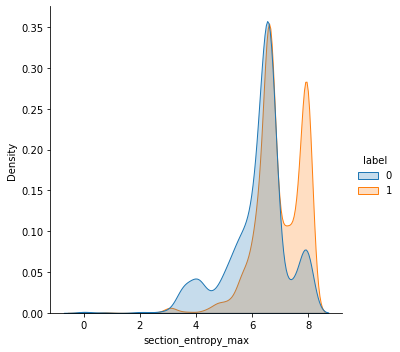

In [919]:
plot_histogram(df_r,'section_entropy_max', False)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

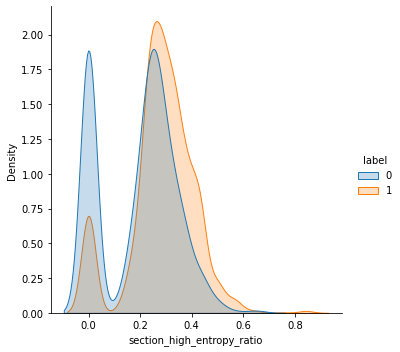

In [816]:
plot_histogram(df_r,'section_high_entropy_ratio', False)

In [814]:
df_r[['section_high_entropy_ratio','section_entropy_max']].corr()

section_high_entropy_ratio  section_entropy_max
section_high_entropy_ratio                        1.00                 0.79
section_entropy_max                               0.79                 1.00

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

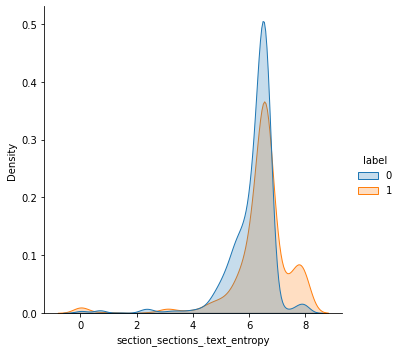

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

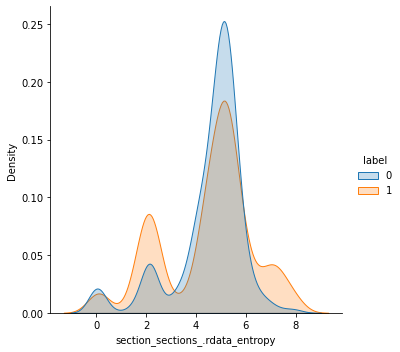

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

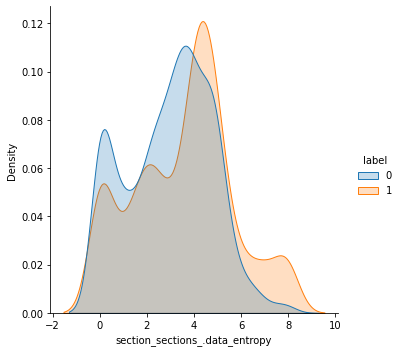

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

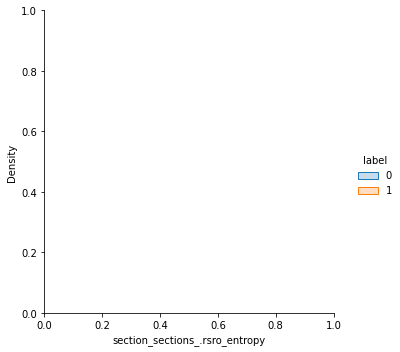

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

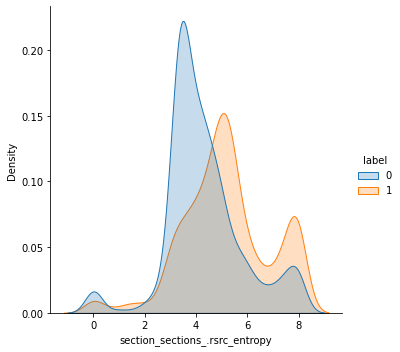

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

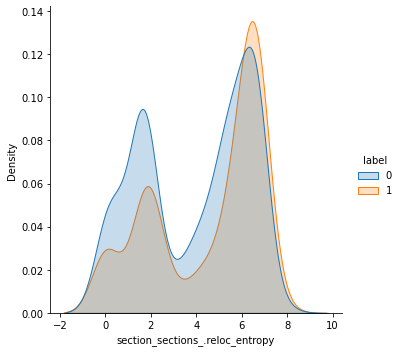

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

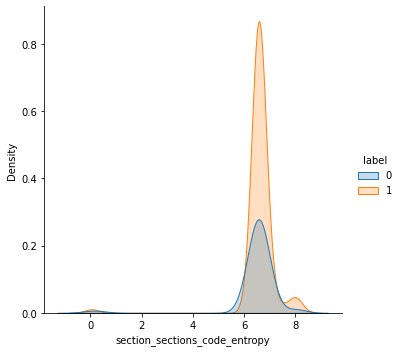

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

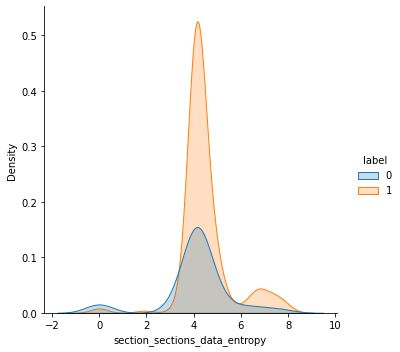

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

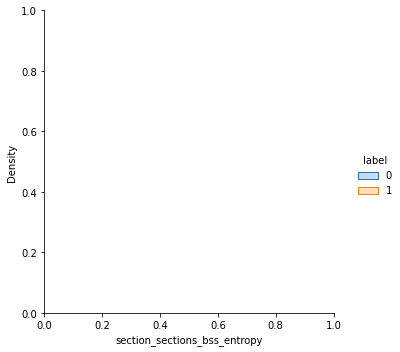

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

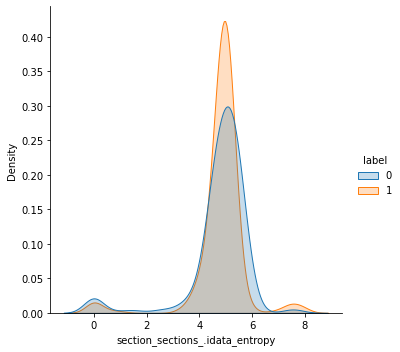

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

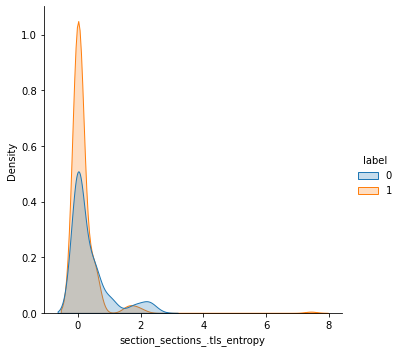

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

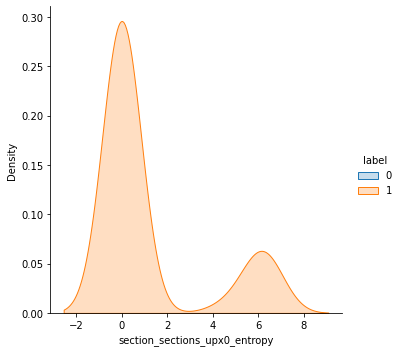

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

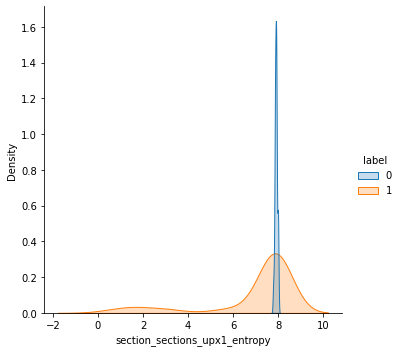

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

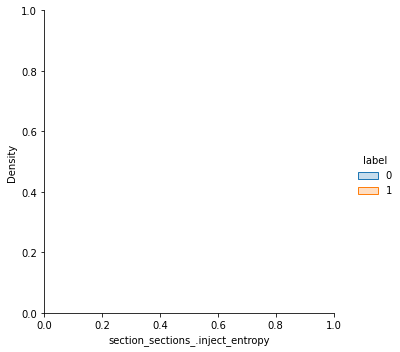

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

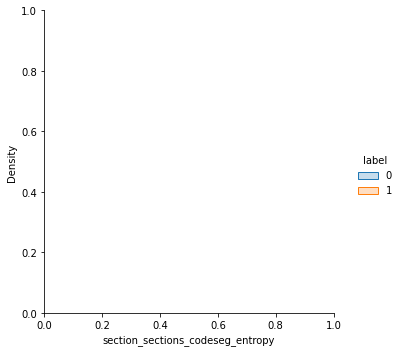

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

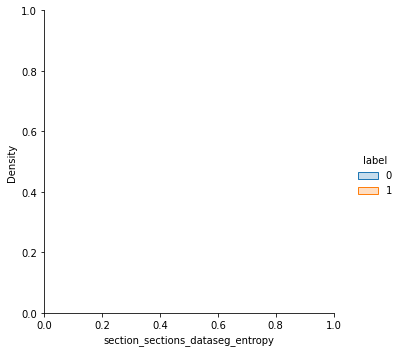

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

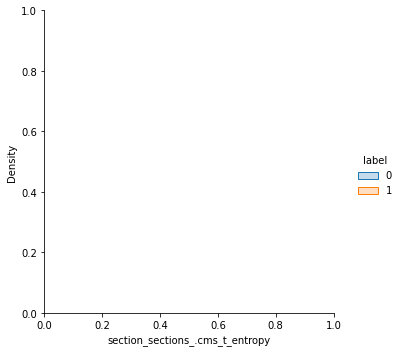

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

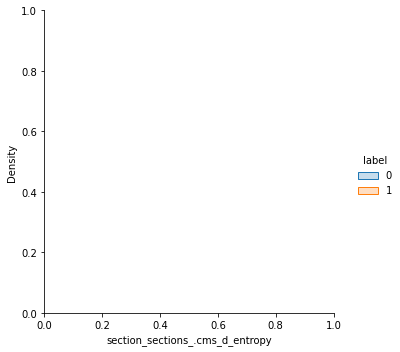

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

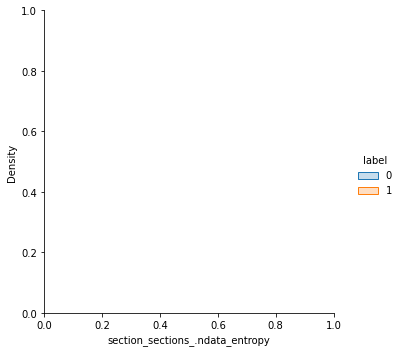

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

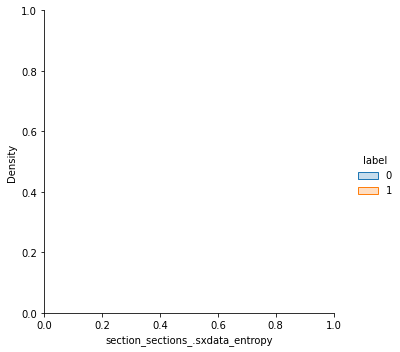

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

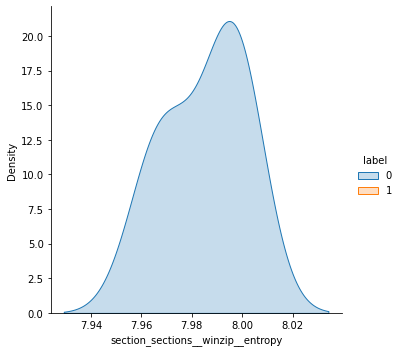

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

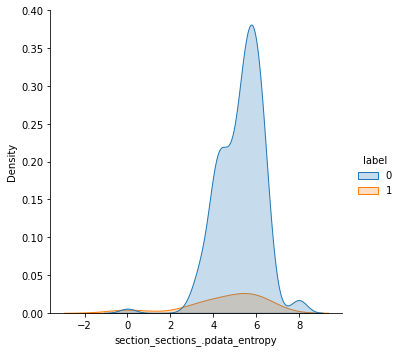

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

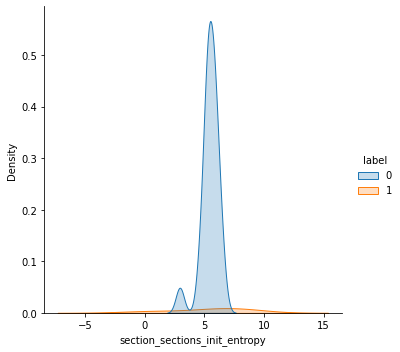

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

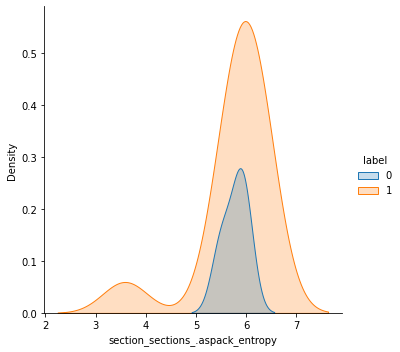

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

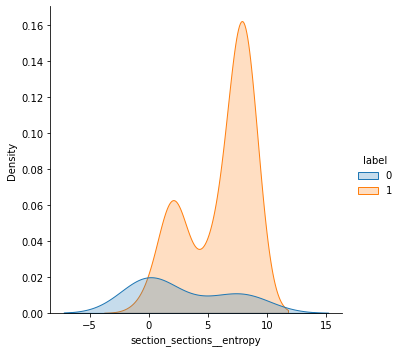

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

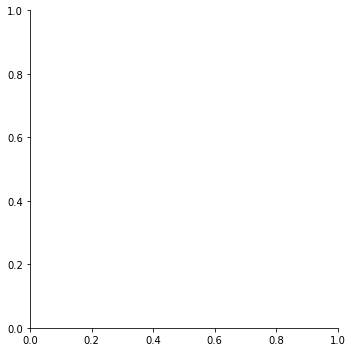

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

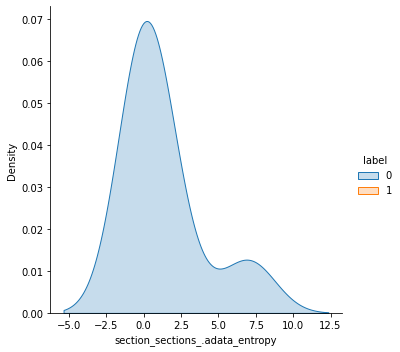

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

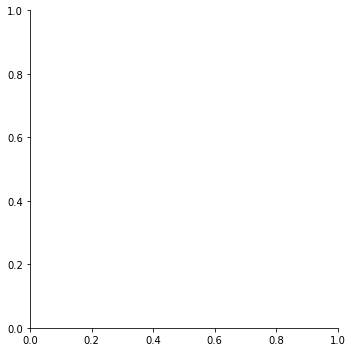

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

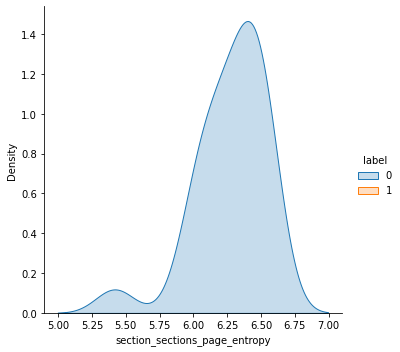

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

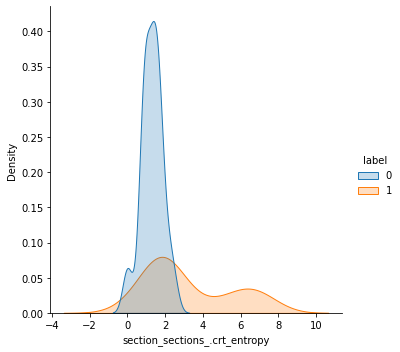

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

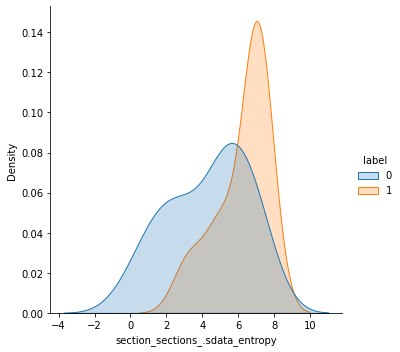

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

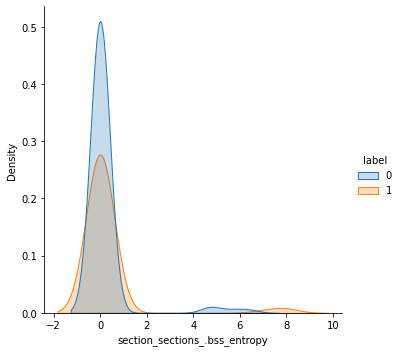

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

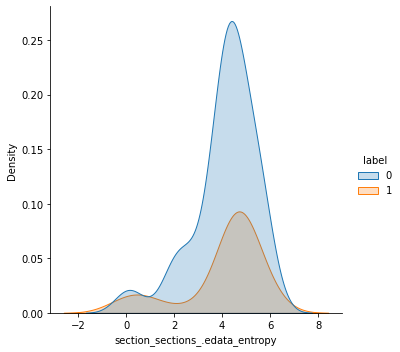

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

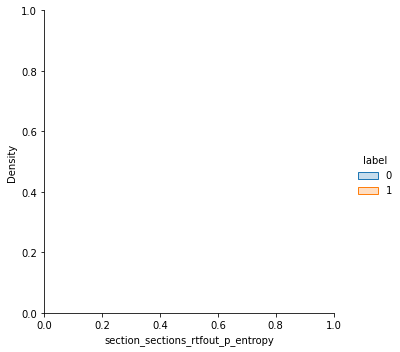

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

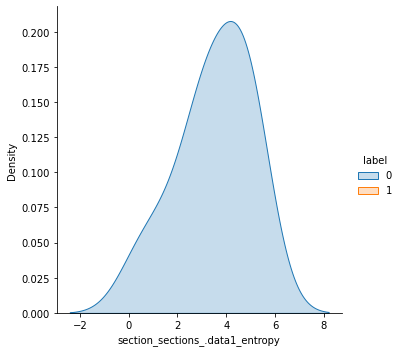

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

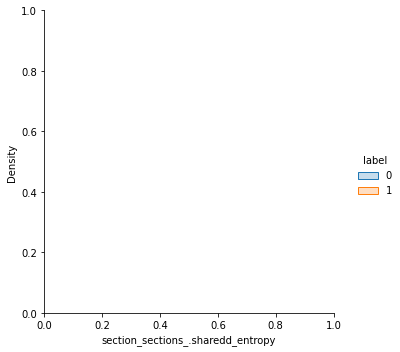

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

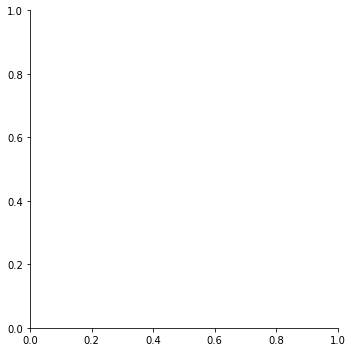

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

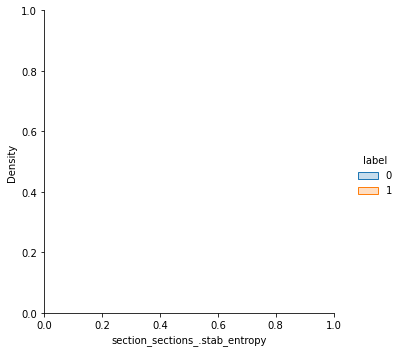

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

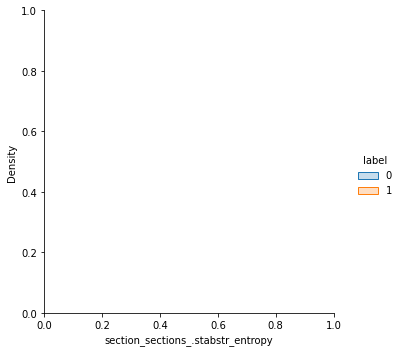

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

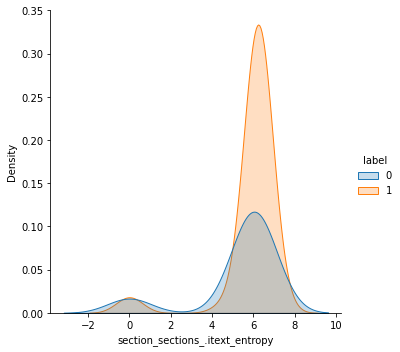

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

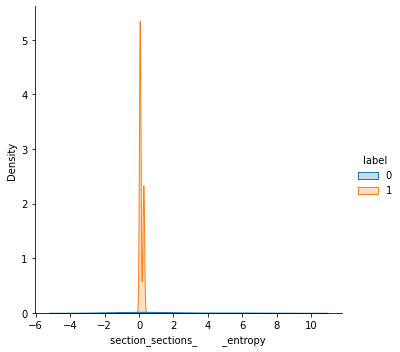

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

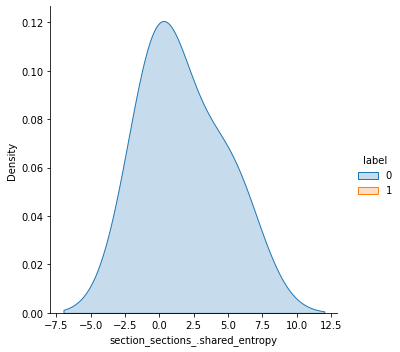

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

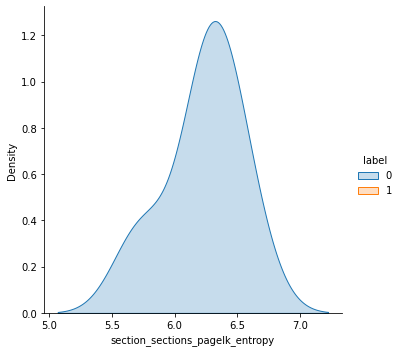

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

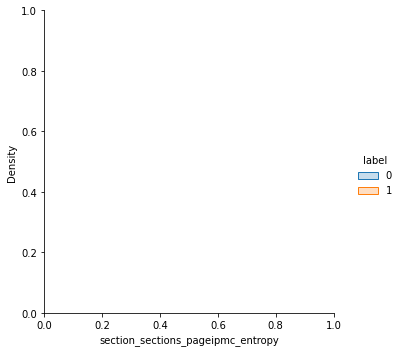

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

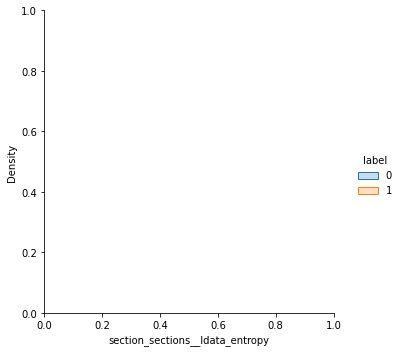

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

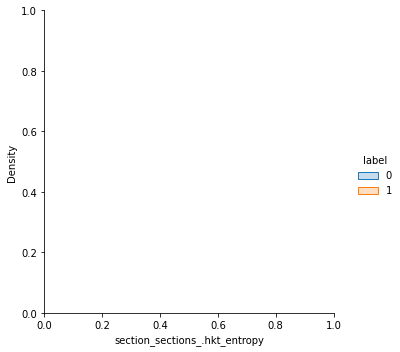

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

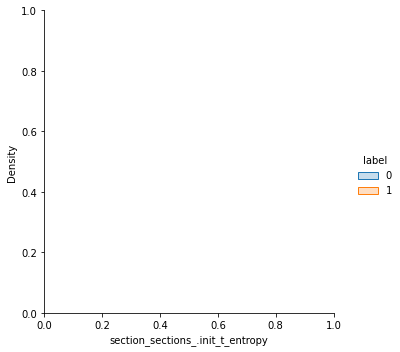

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

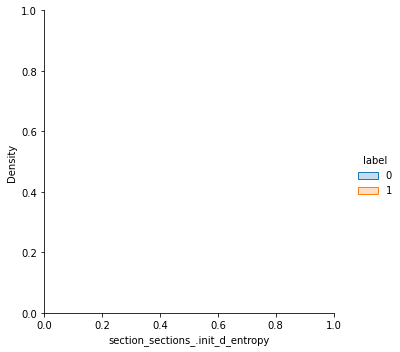

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

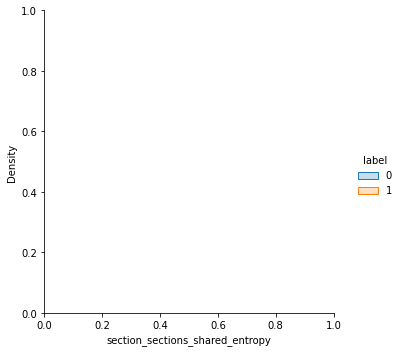

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

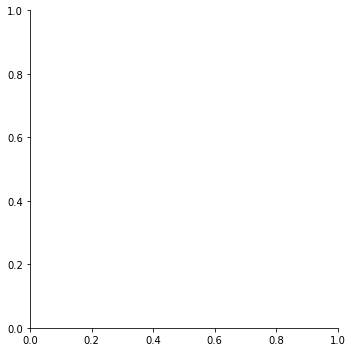

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

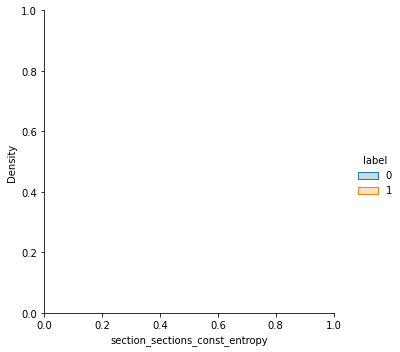

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

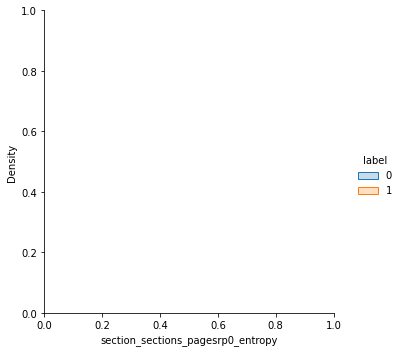

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

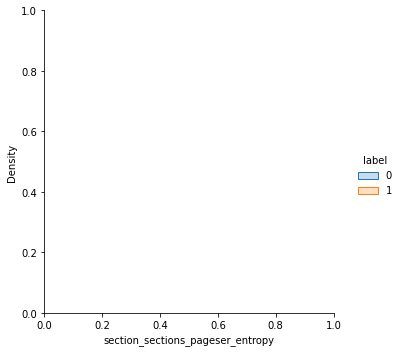

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

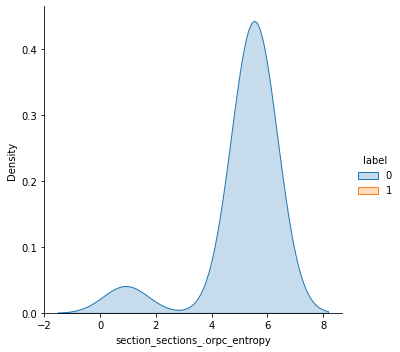

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

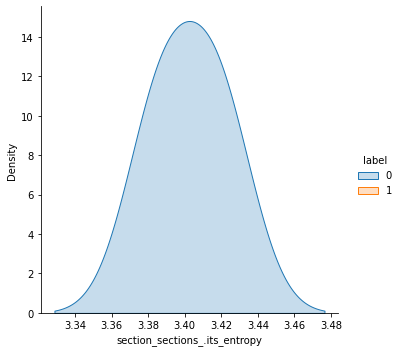

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

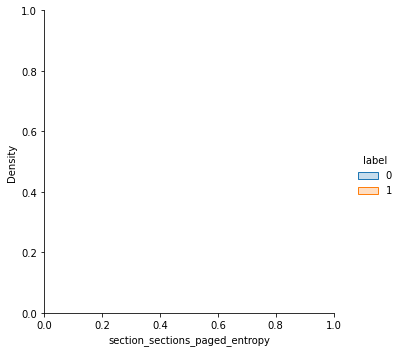

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

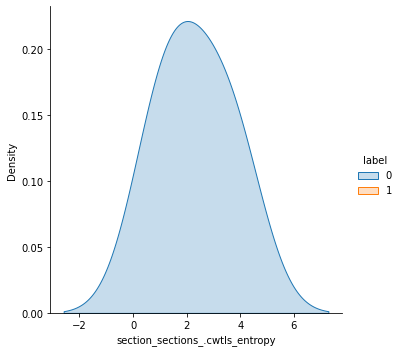

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

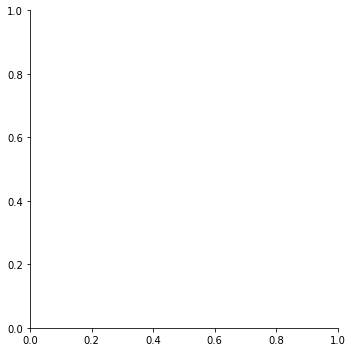

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

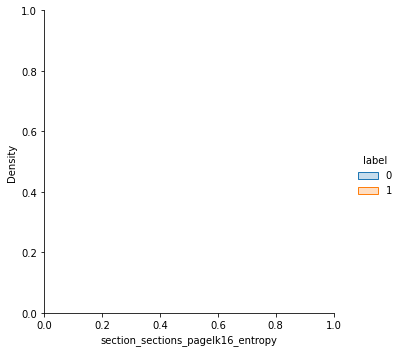

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

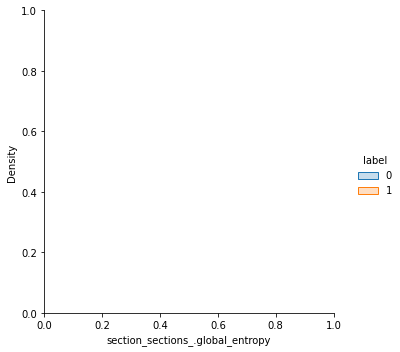

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

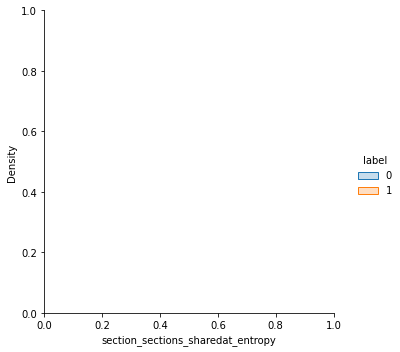

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

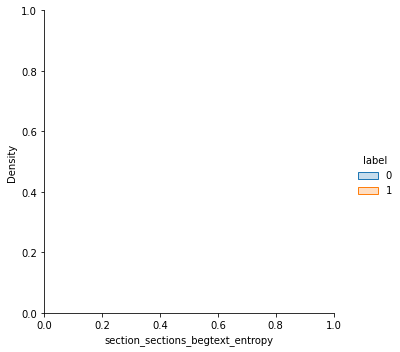

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

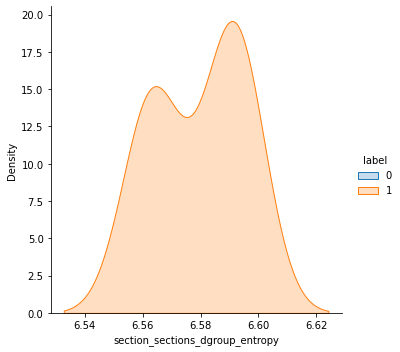

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

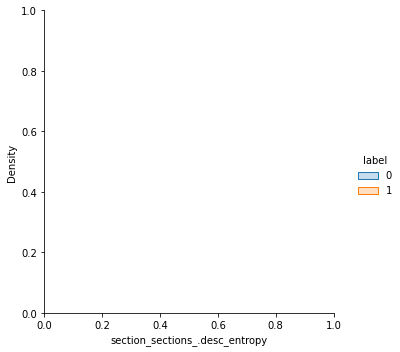

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

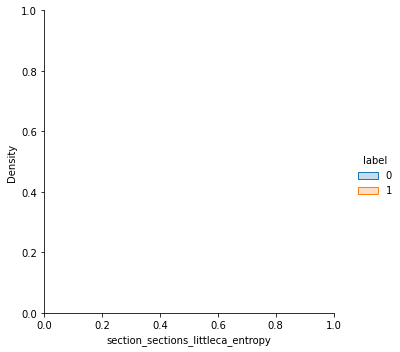

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

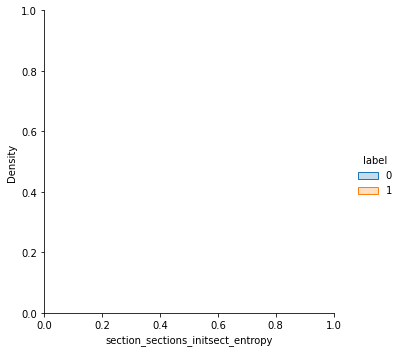

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

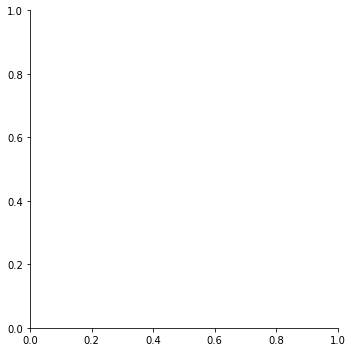

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

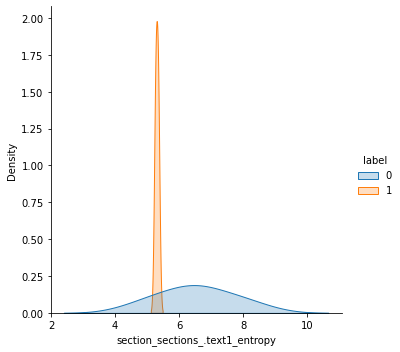

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

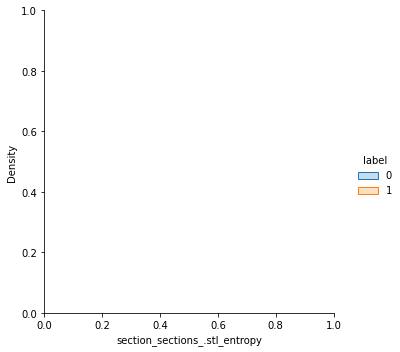

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

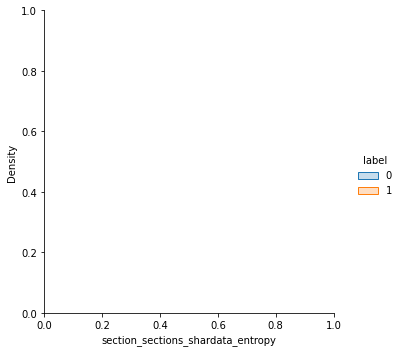

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

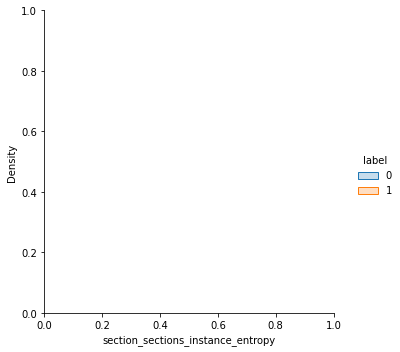

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

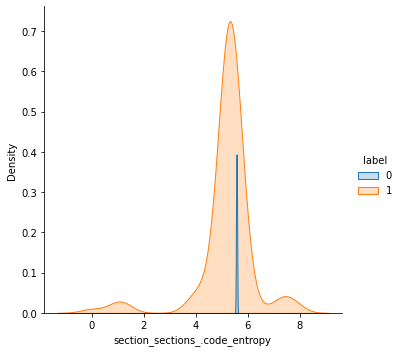

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

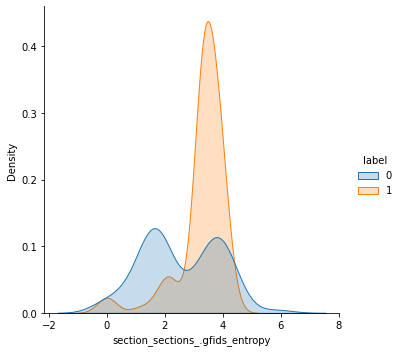

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

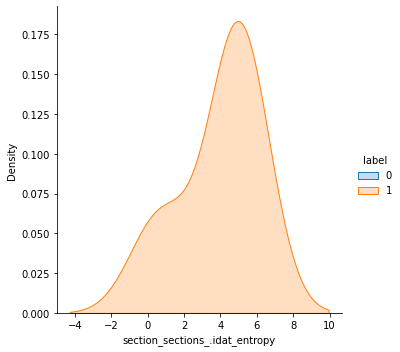

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

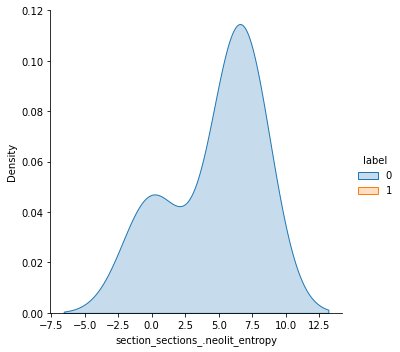

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

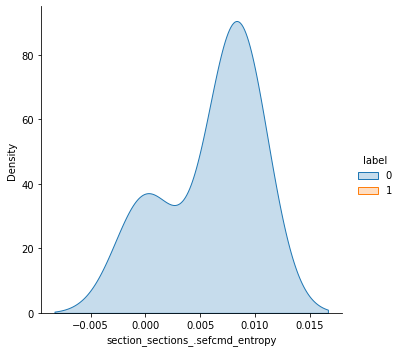

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

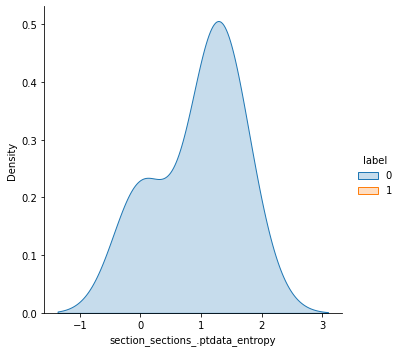

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

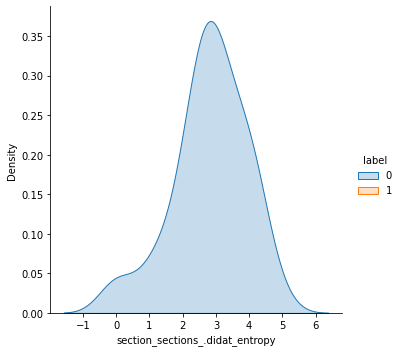

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

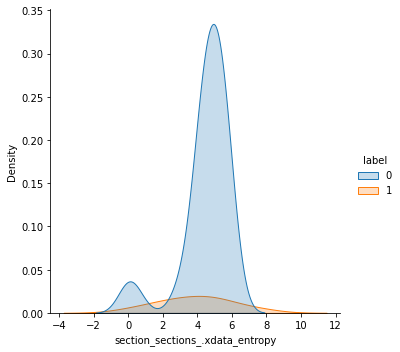

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

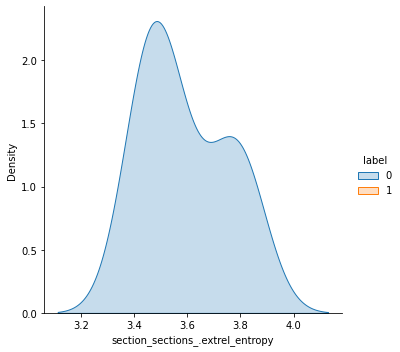

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

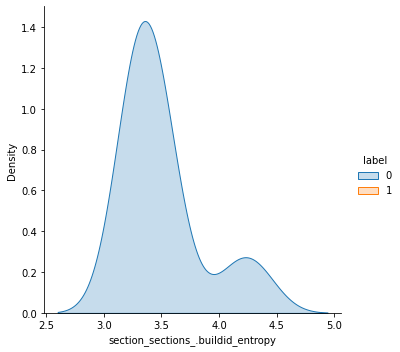

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

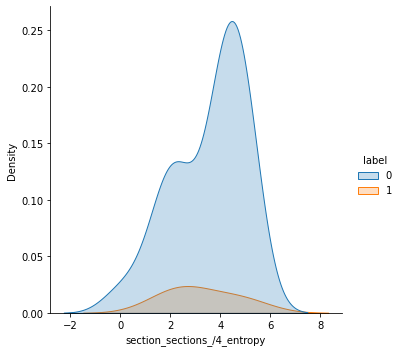

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

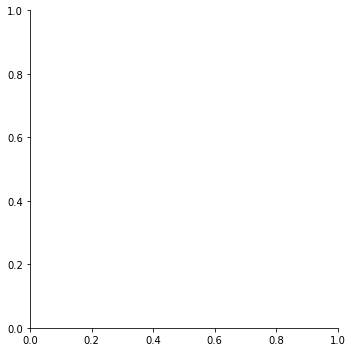

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

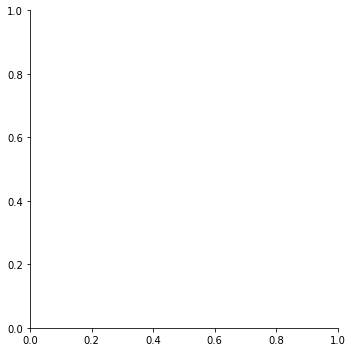

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

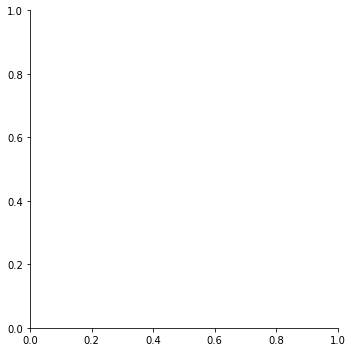

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

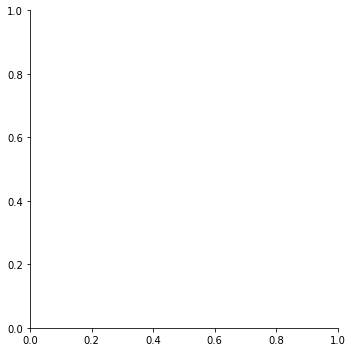

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

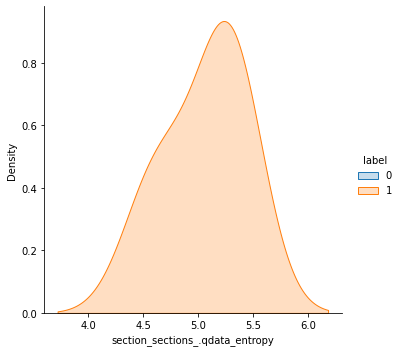

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

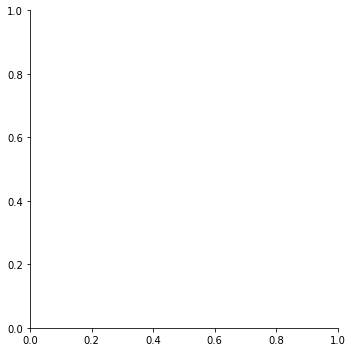

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

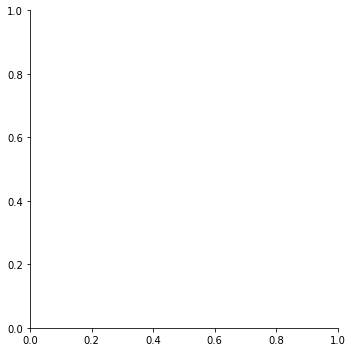

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

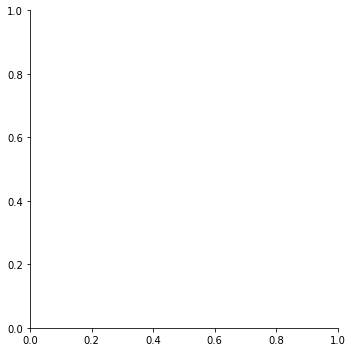

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

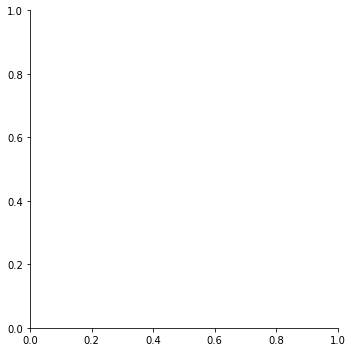

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

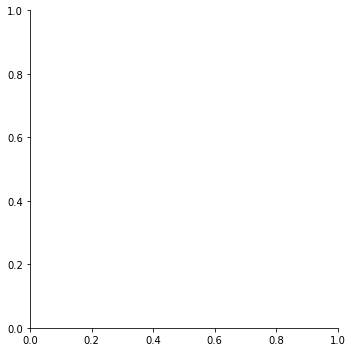

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

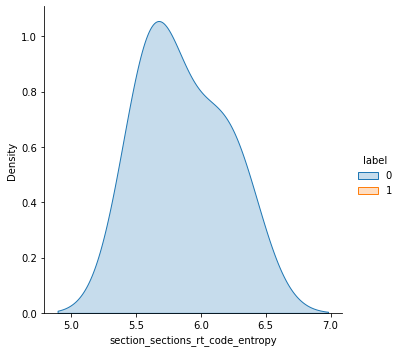

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

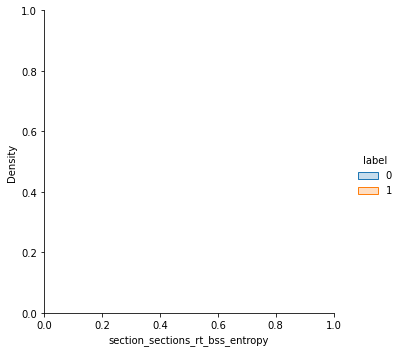

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

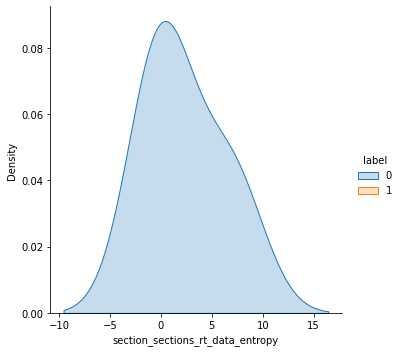

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

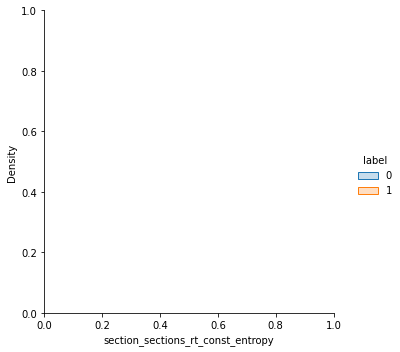

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

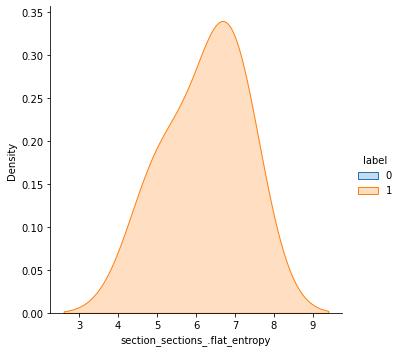

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

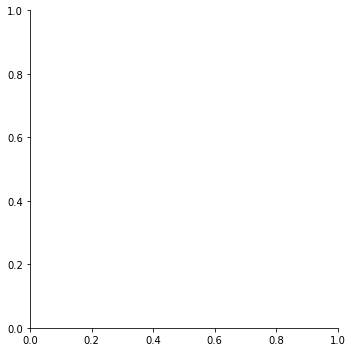

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

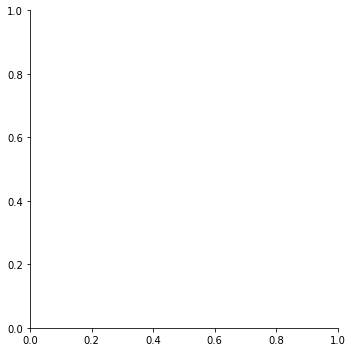

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

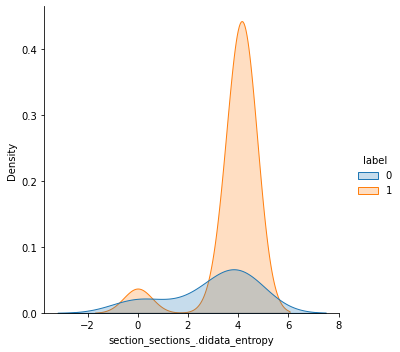

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

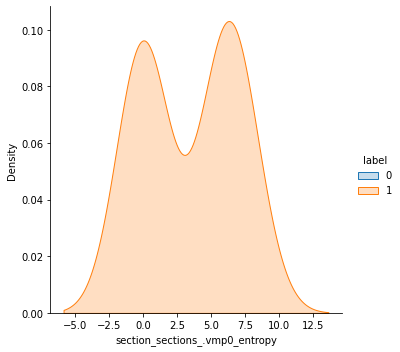

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

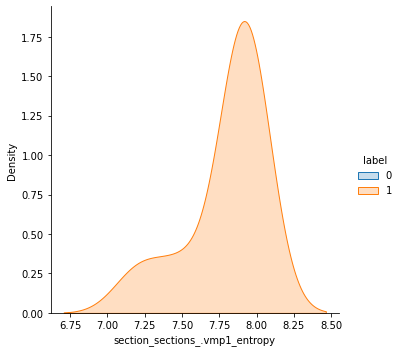

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

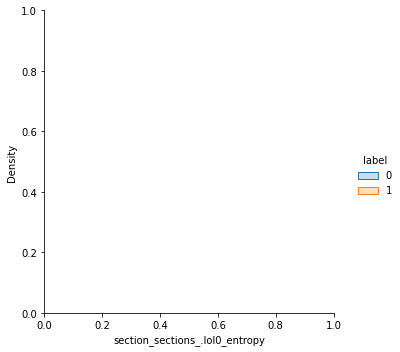

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

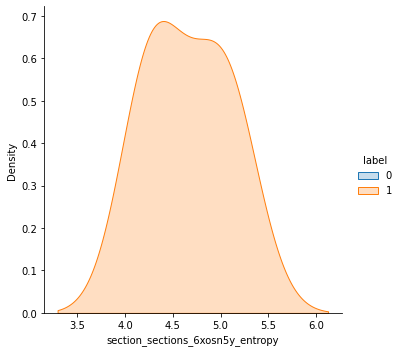

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

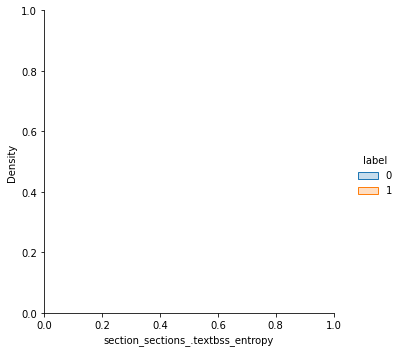

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

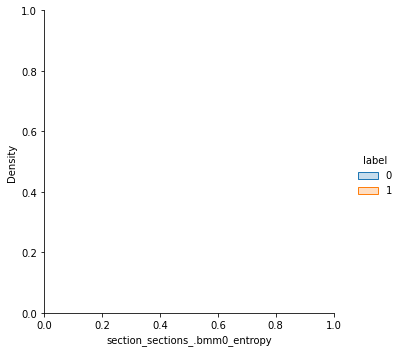

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

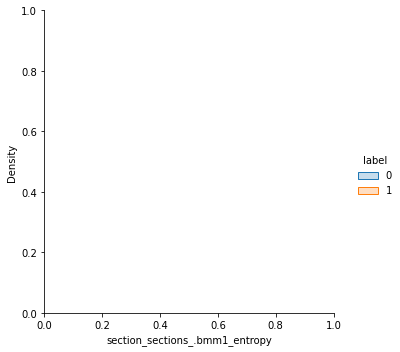

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

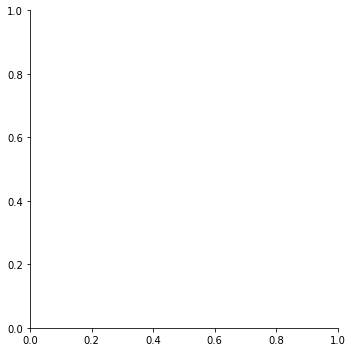

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

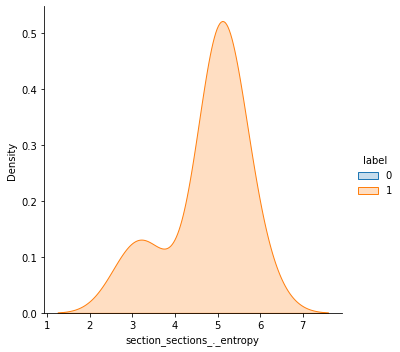

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

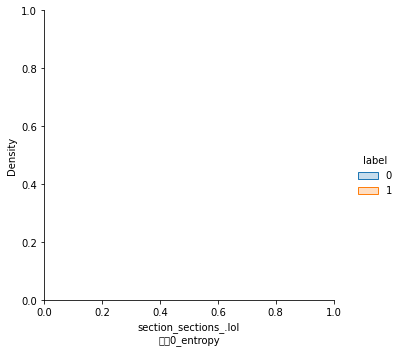

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

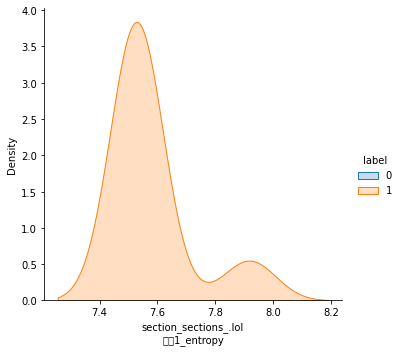

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

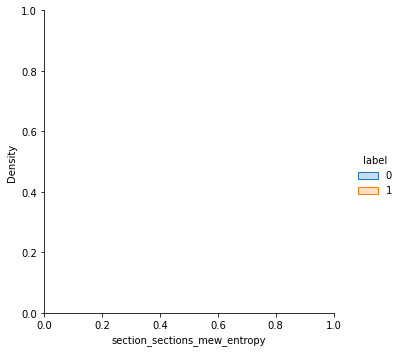

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0, flags=flags)
/

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

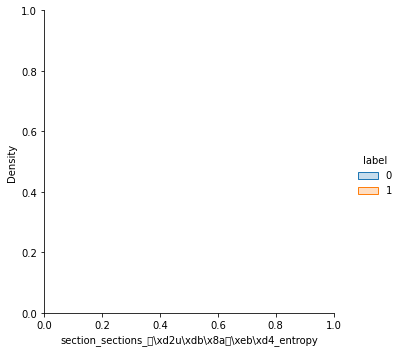

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

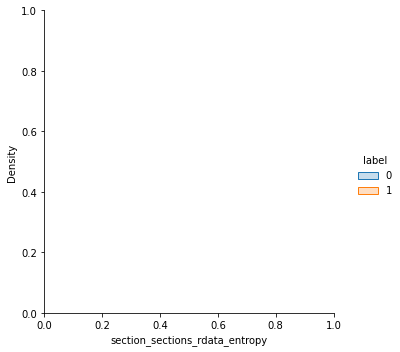

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

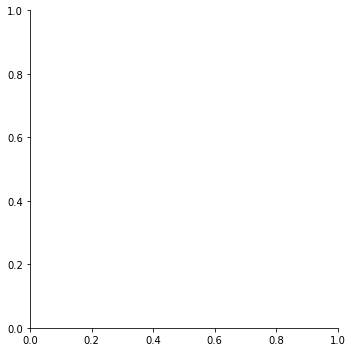

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

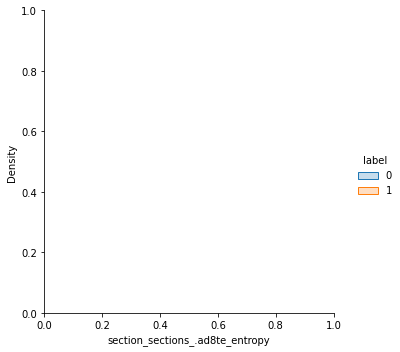

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

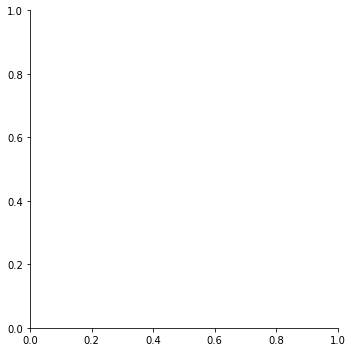

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

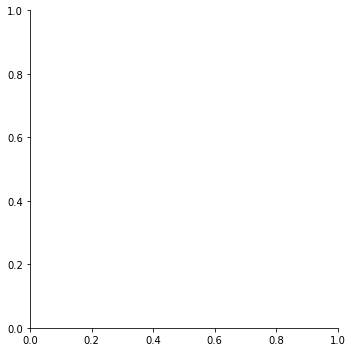

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

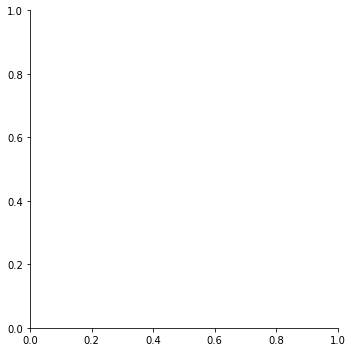

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

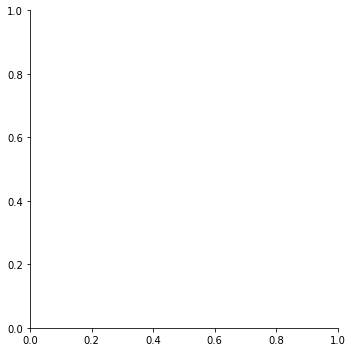

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

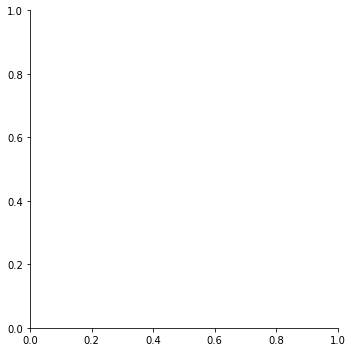

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

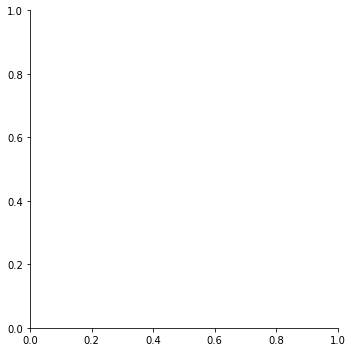

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

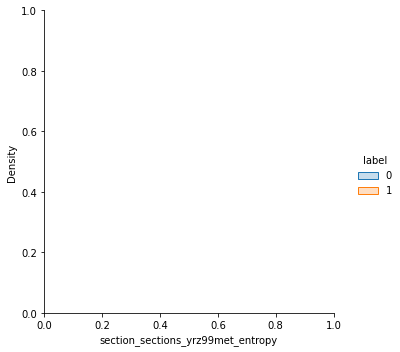

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

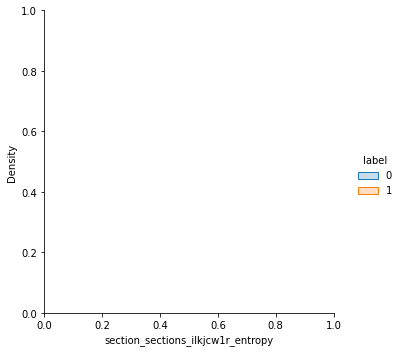

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

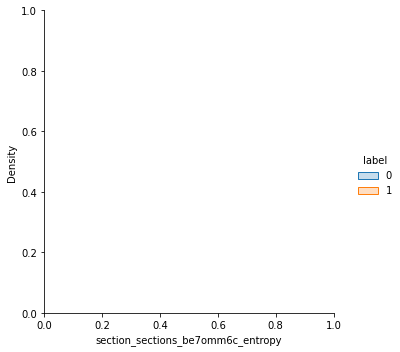

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

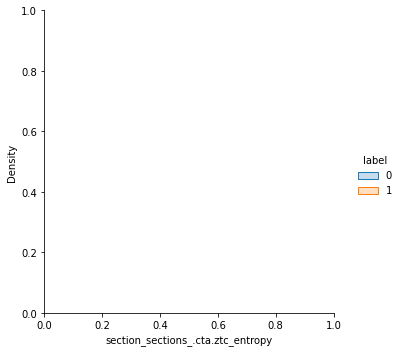

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

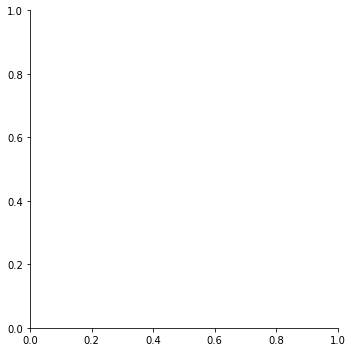

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

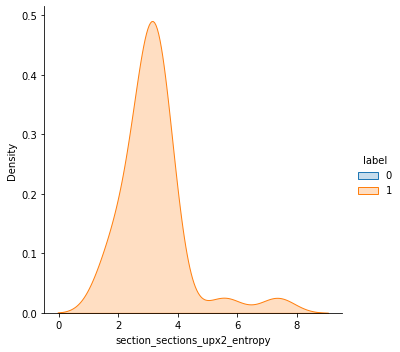

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

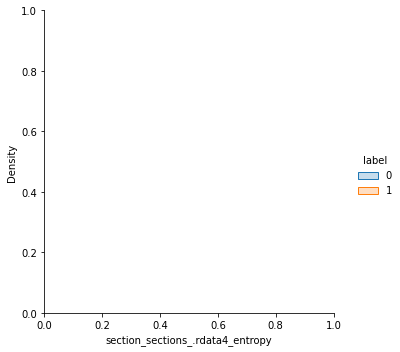

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

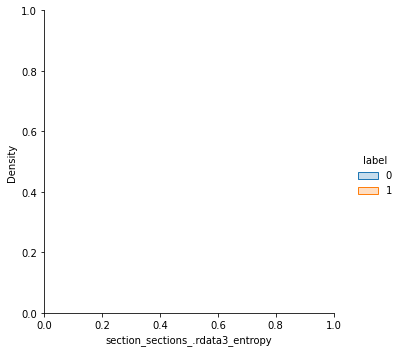

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

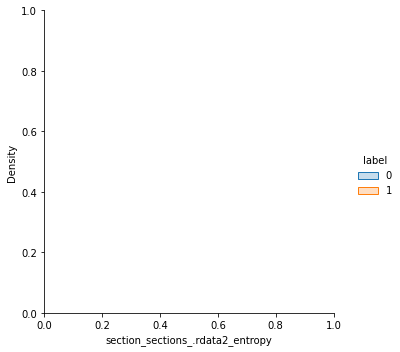

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

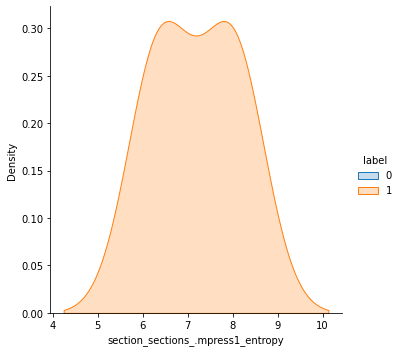

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

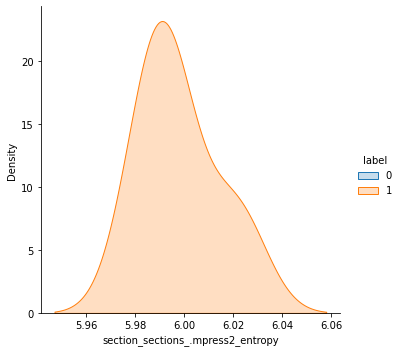

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

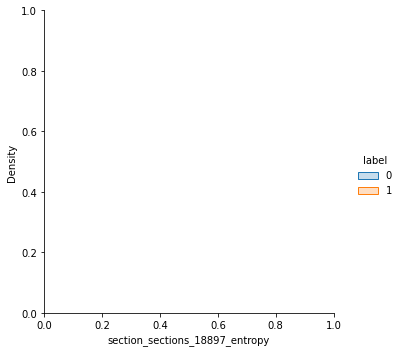

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

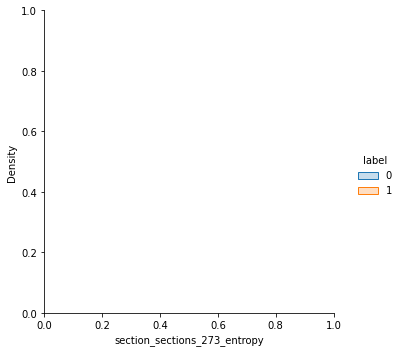

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

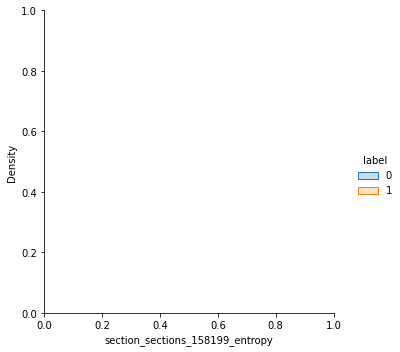

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

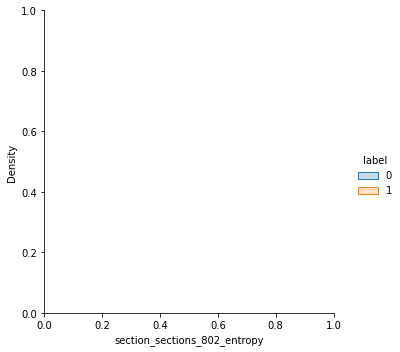

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

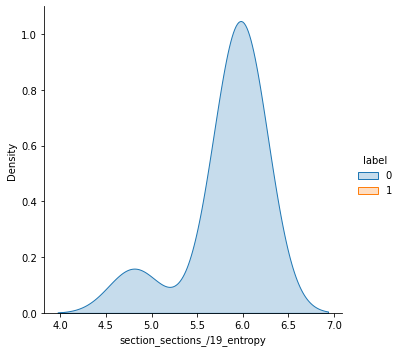

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

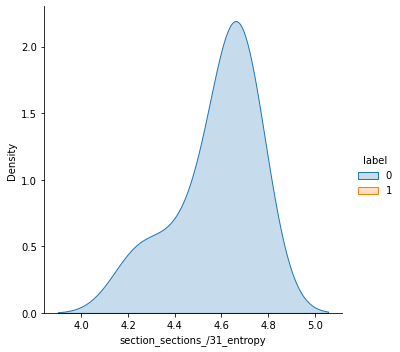

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

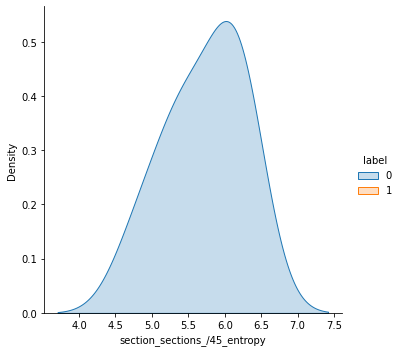

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

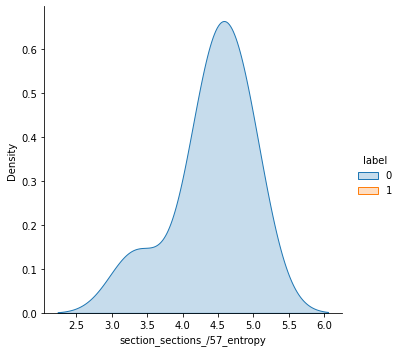

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

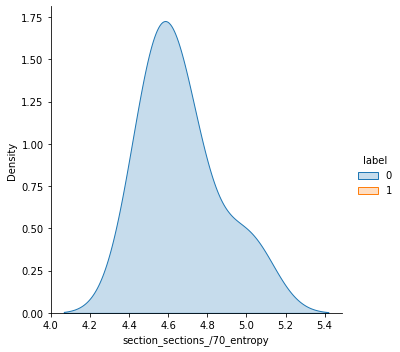

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

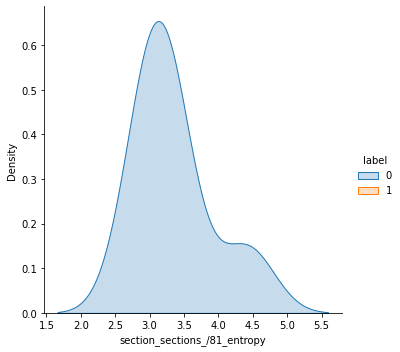

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

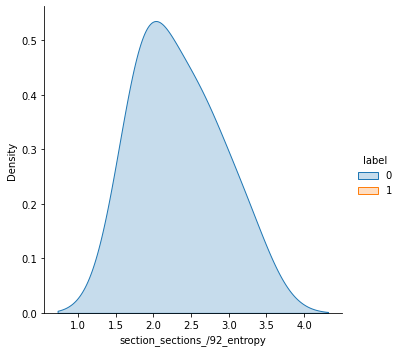

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

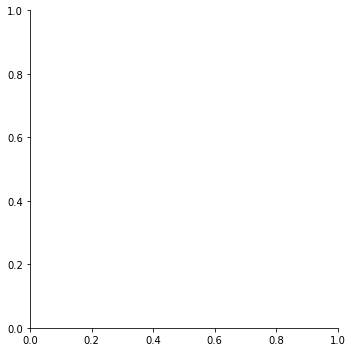

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

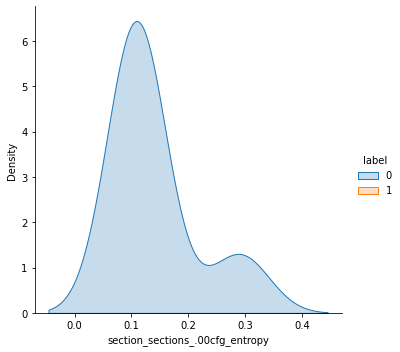

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

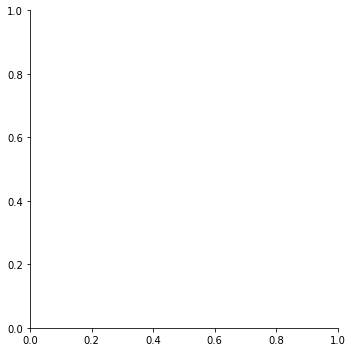

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

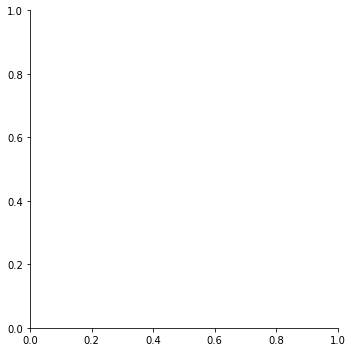

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

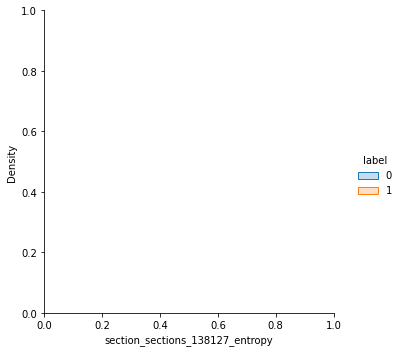

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

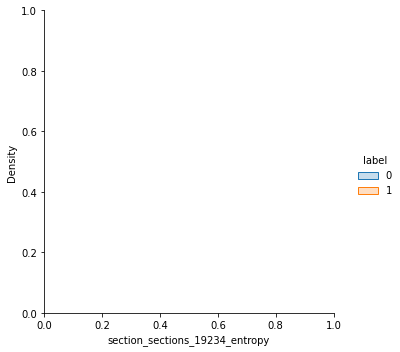

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

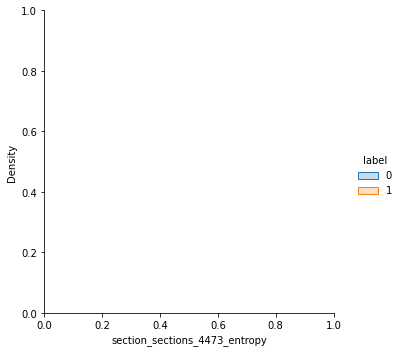

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

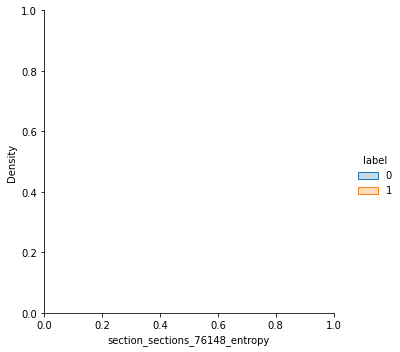

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

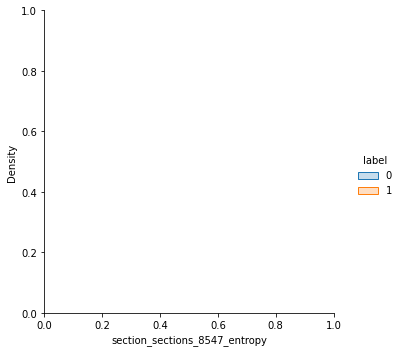

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

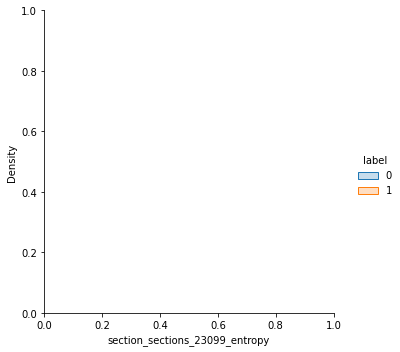

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

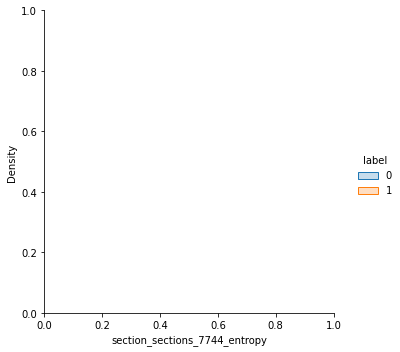

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

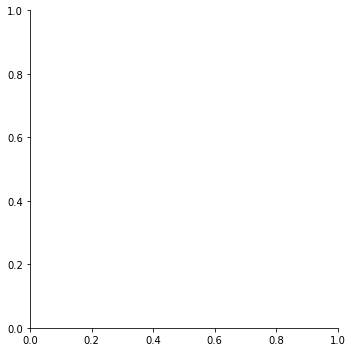

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

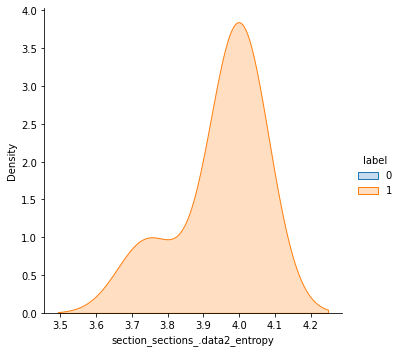

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

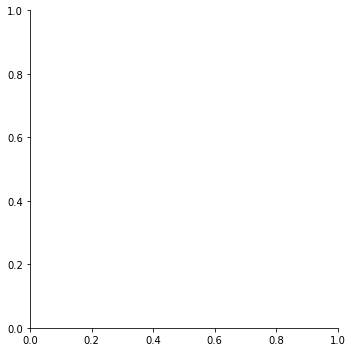

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

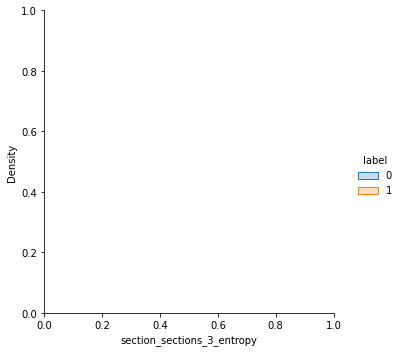

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

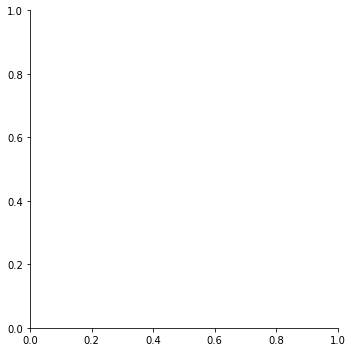

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

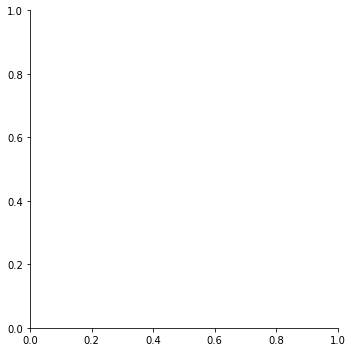

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

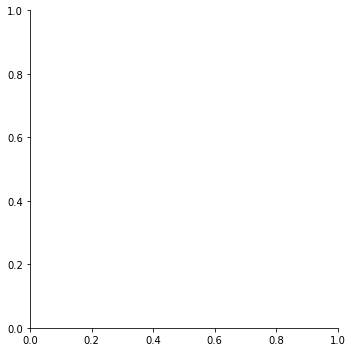

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

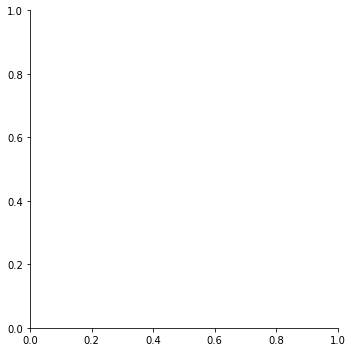

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

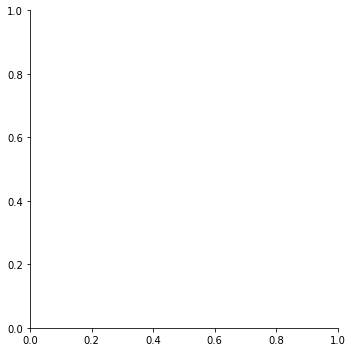

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 7 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 7 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

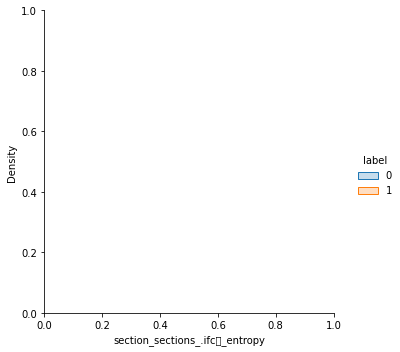

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

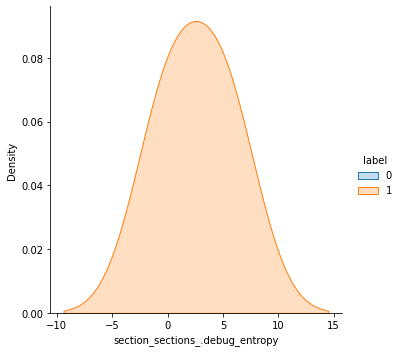

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

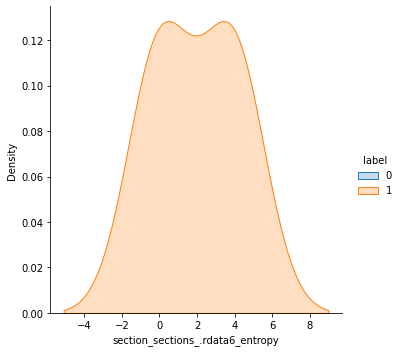

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

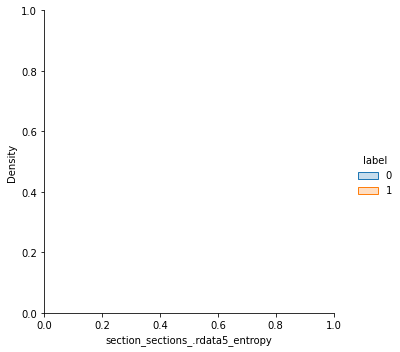

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

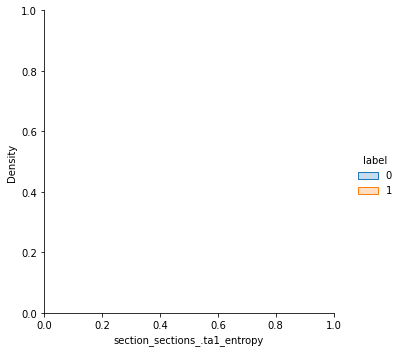

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

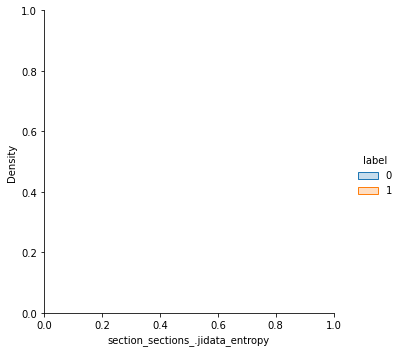

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

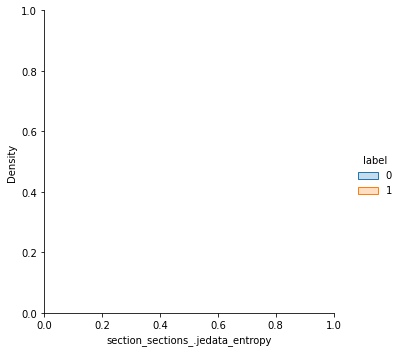

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

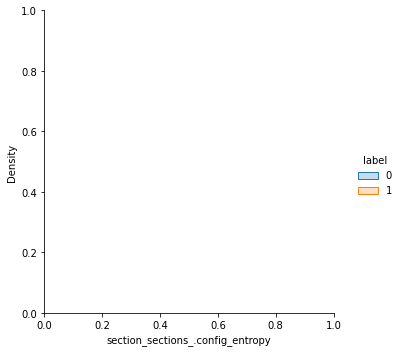

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

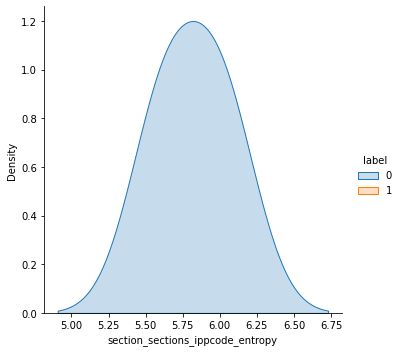

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

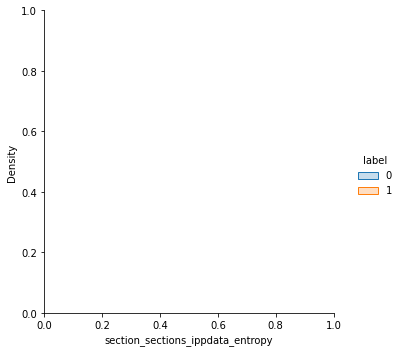

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

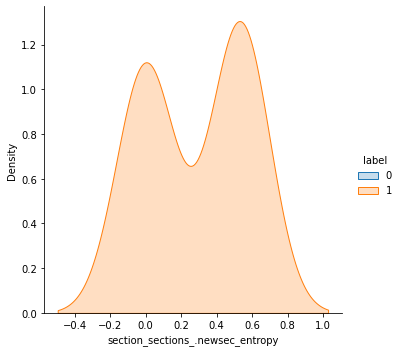

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

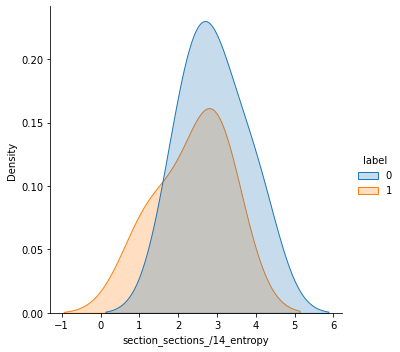

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

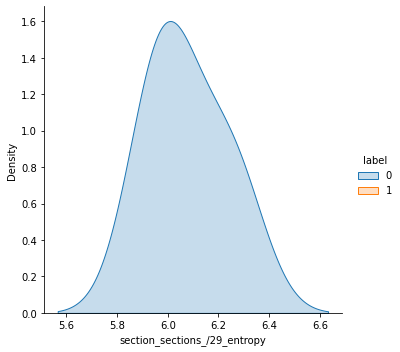

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

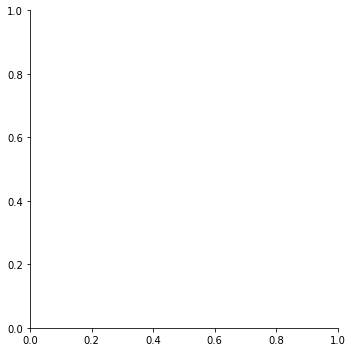

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

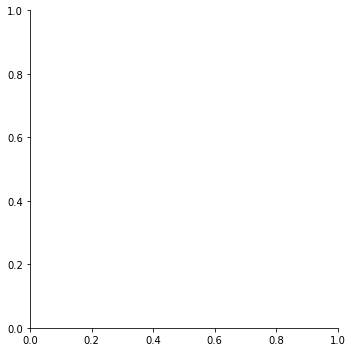

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

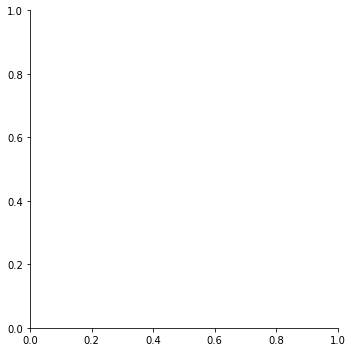

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

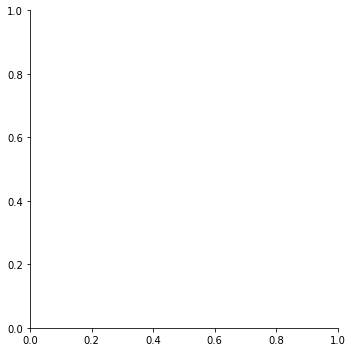

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

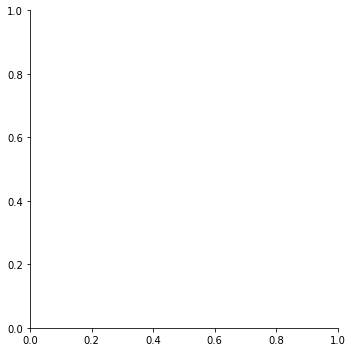

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

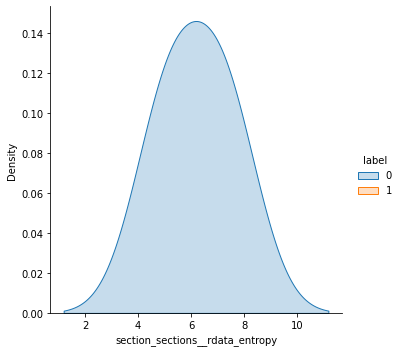

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

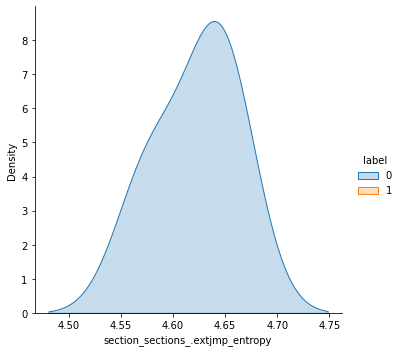

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

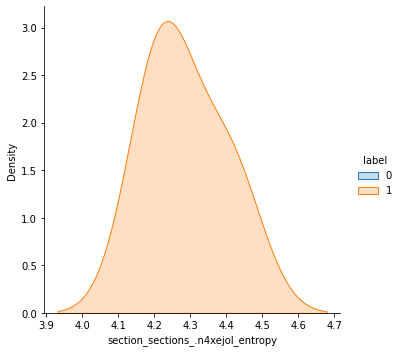

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

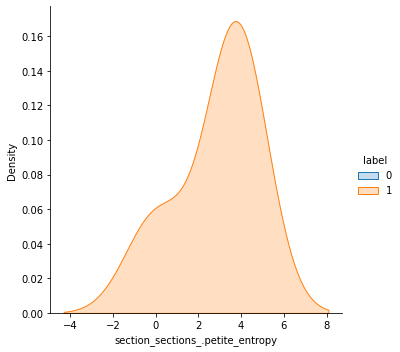

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

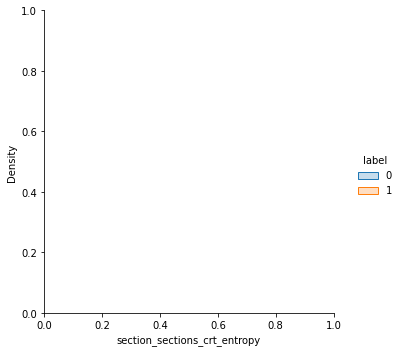

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

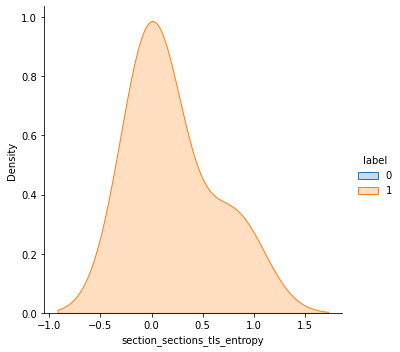

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

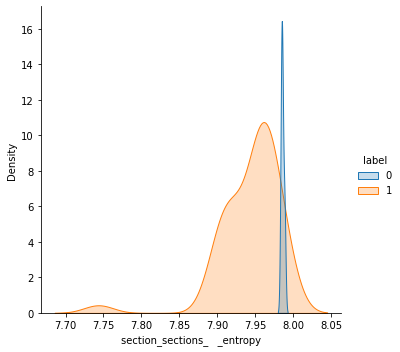

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

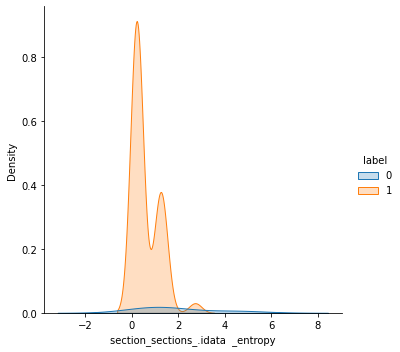

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

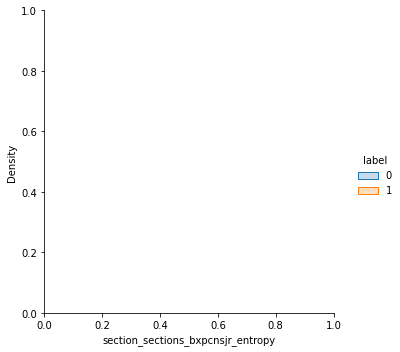

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

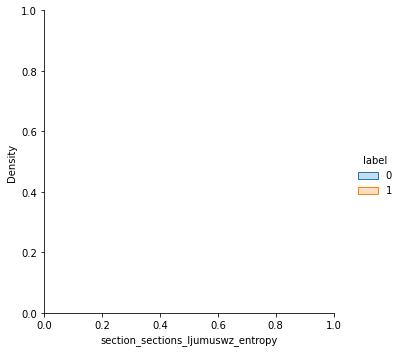

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

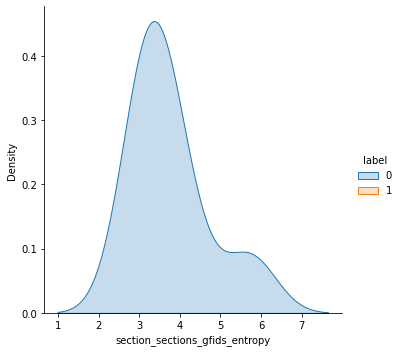

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

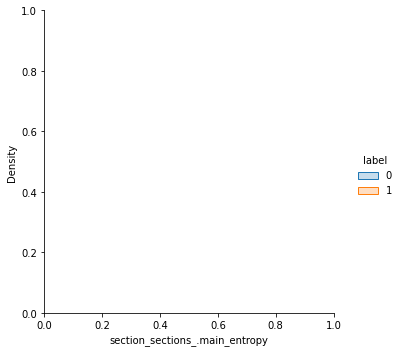

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

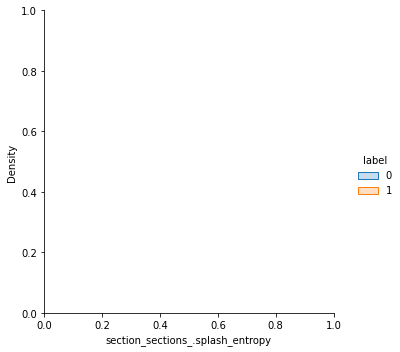

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

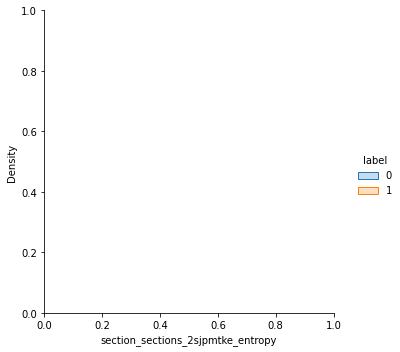

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

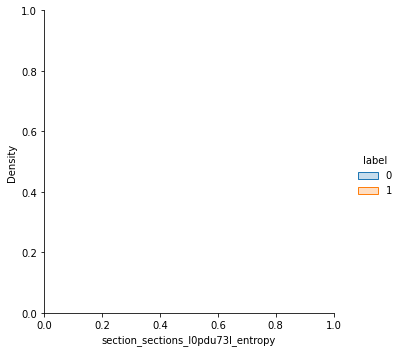

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

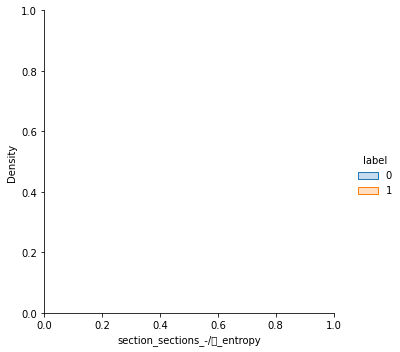

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

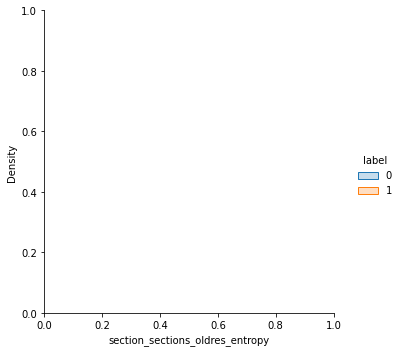

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

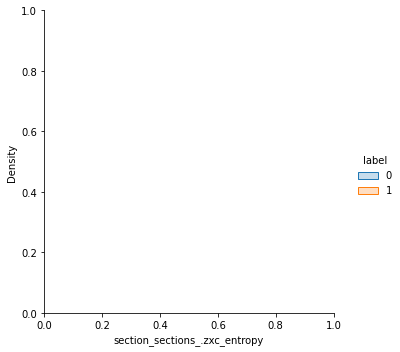

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

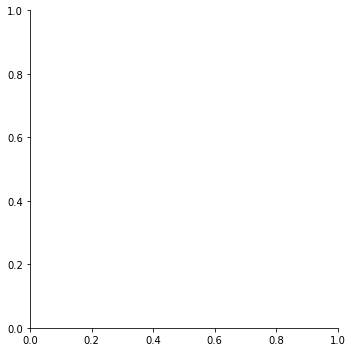

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

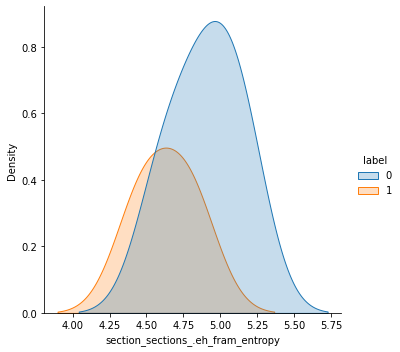

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

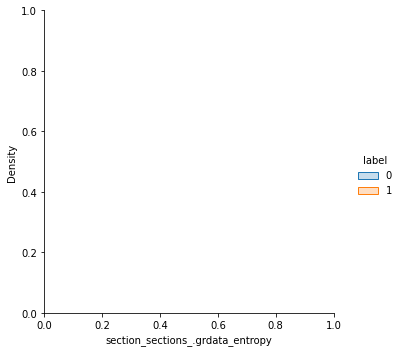

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

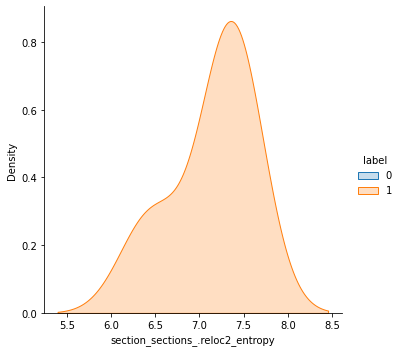

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

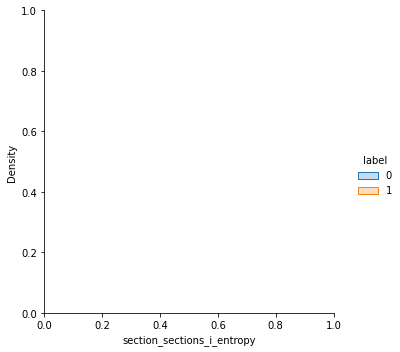

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

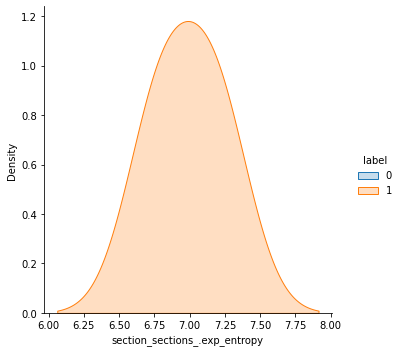

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

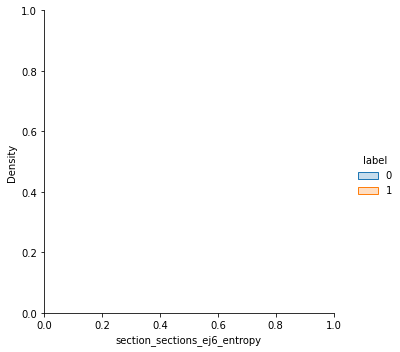

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

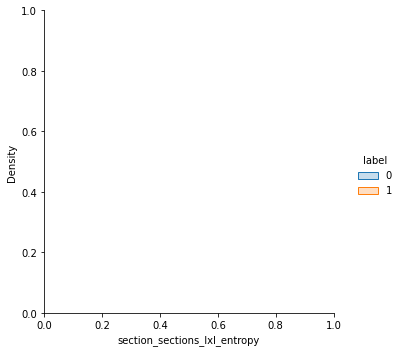

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

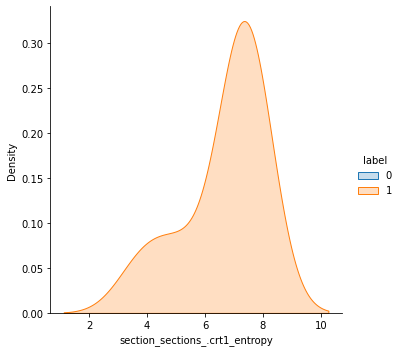

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

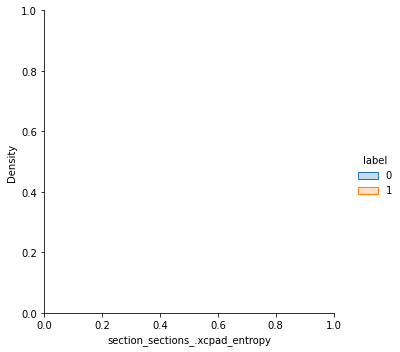

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

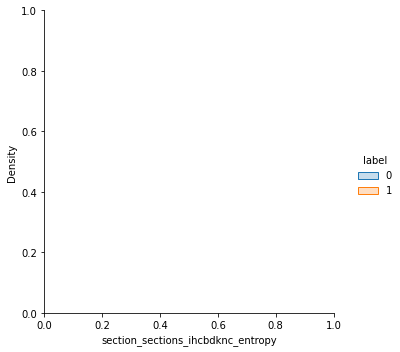

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

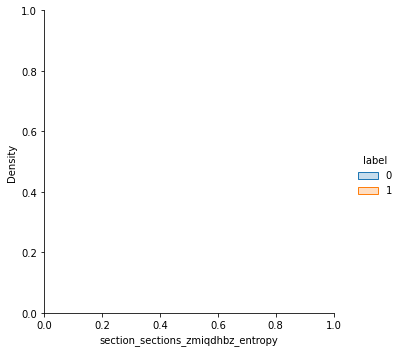

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

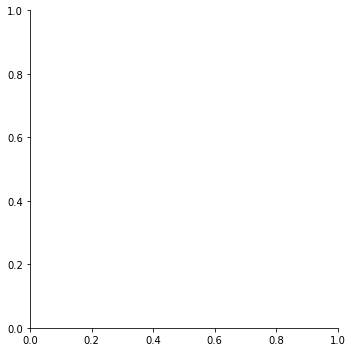

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

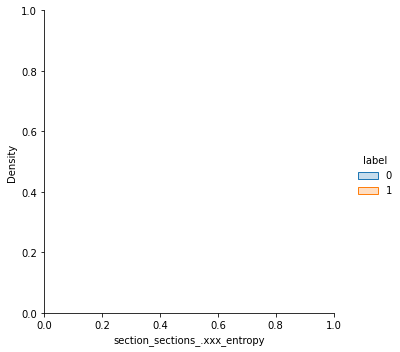

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

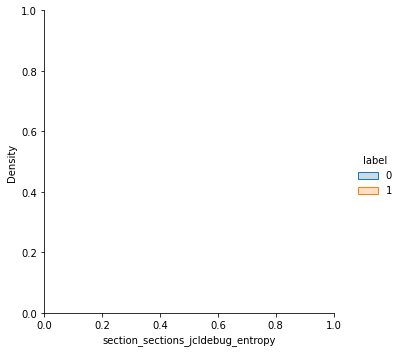

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

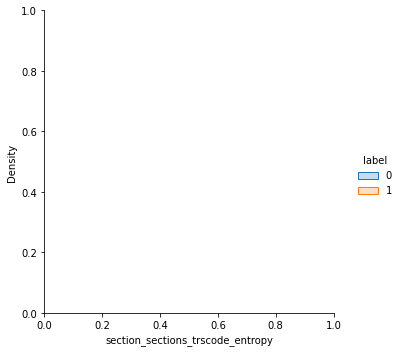

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

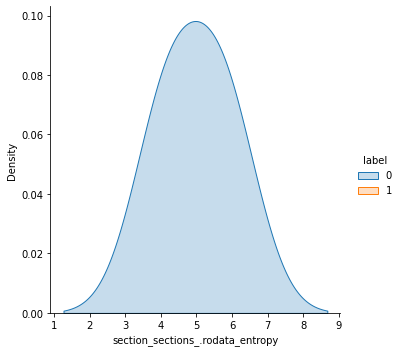

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

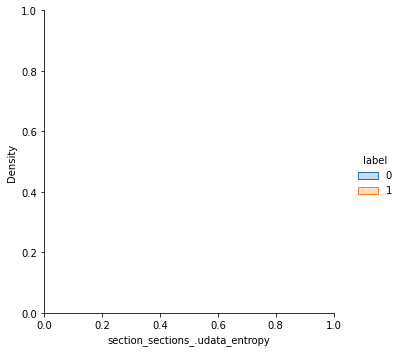

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

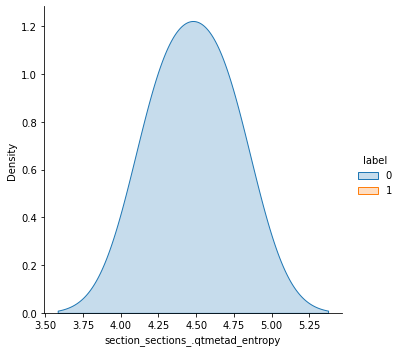

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

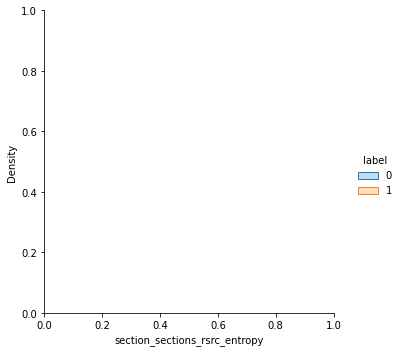

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

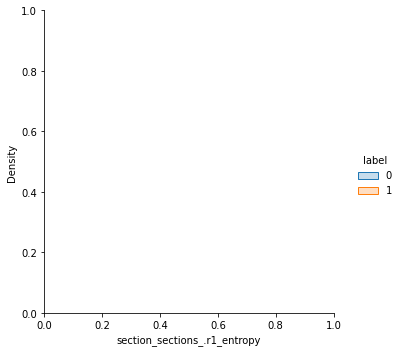

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

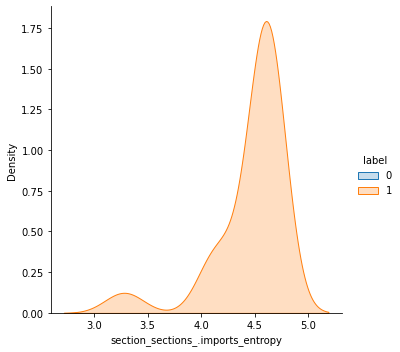

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

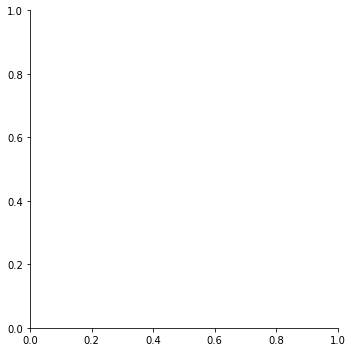

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

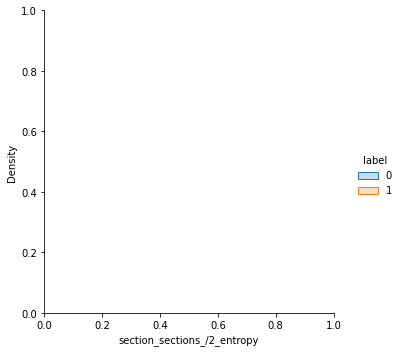

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

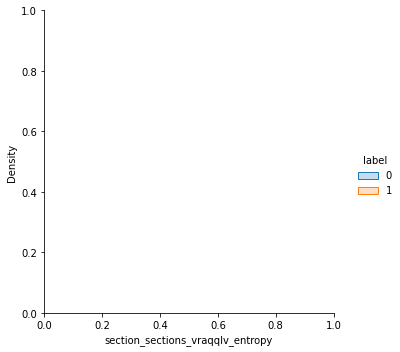

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

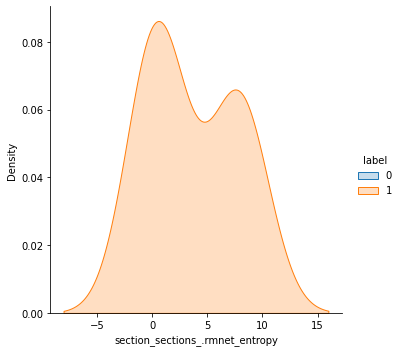

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

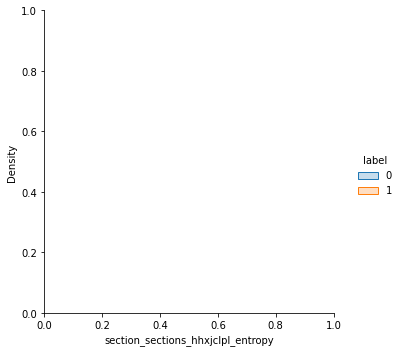

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

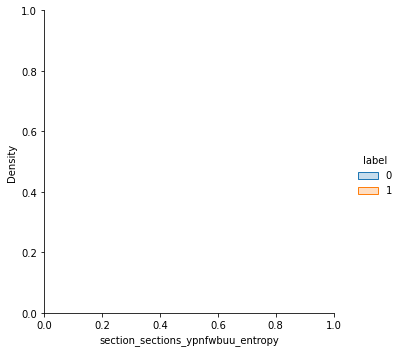

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

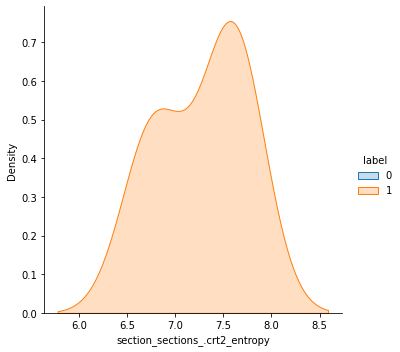

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

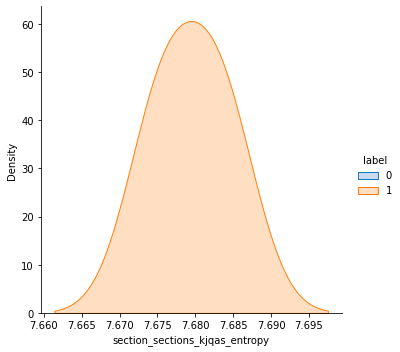

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

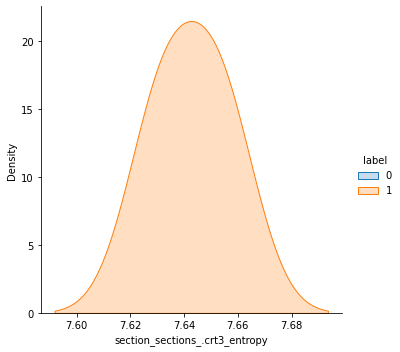

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

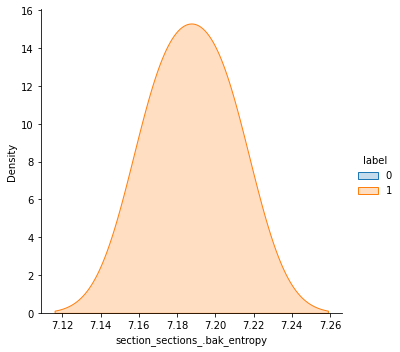

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

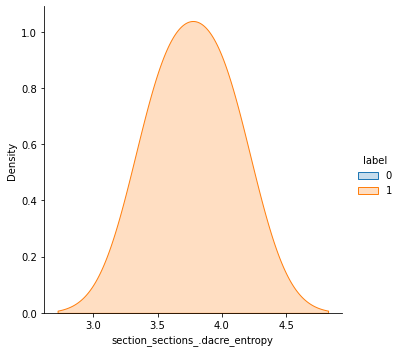

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

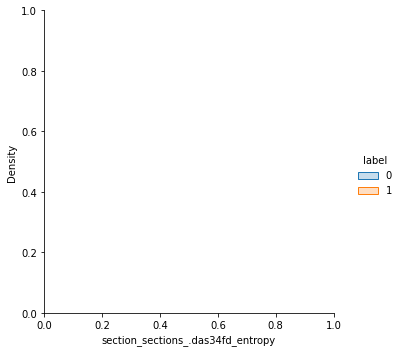

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

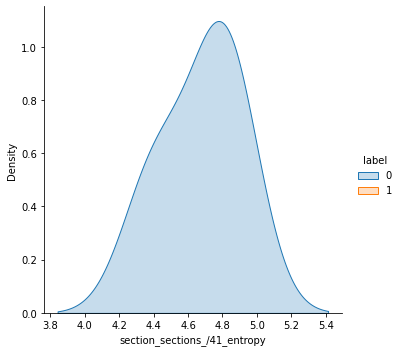

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

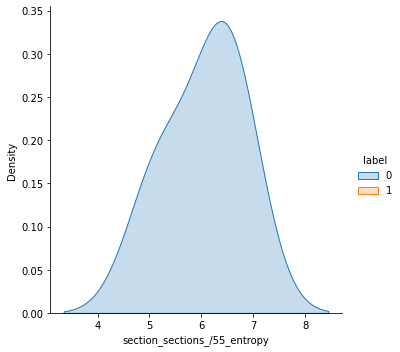

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

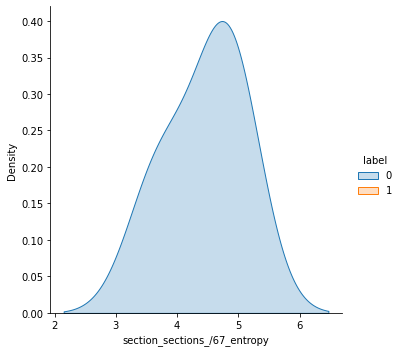

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

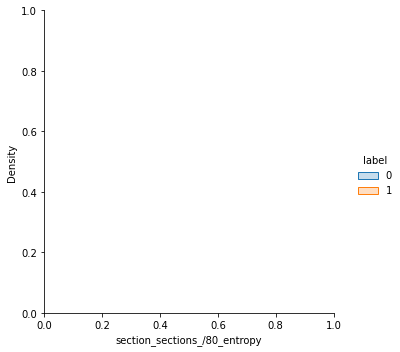

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

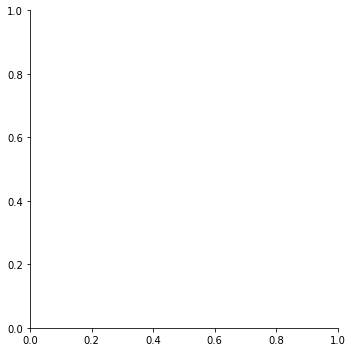

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

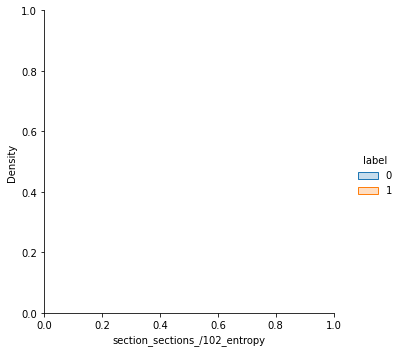

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

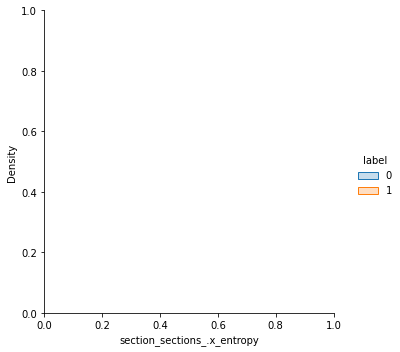

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

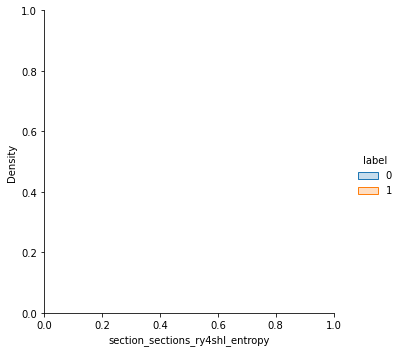

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

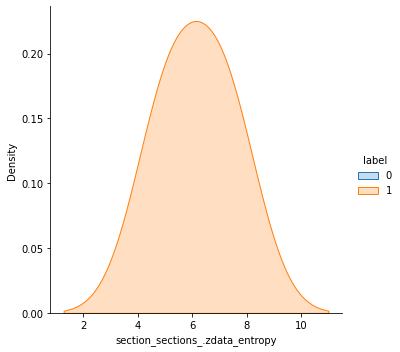

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

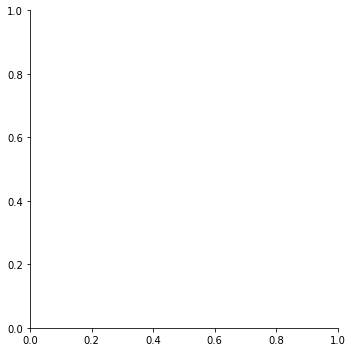

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

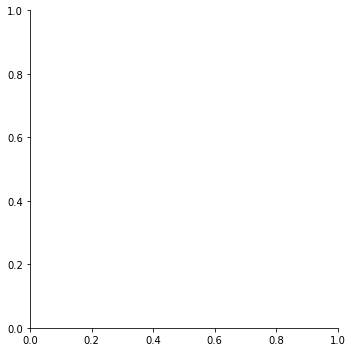

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

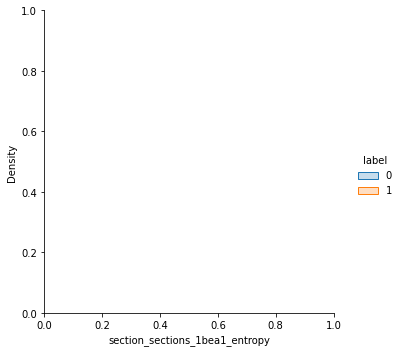

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 18 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 18 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

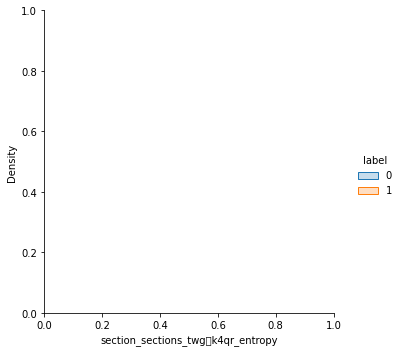

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

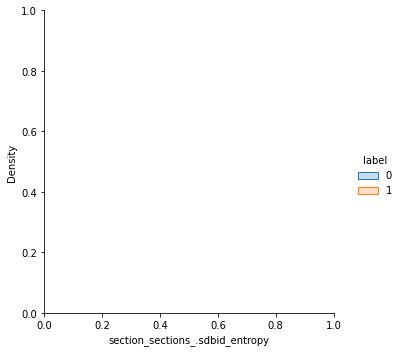

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

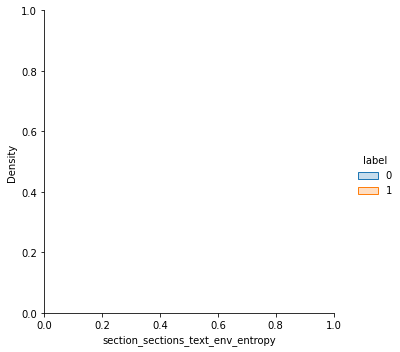

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

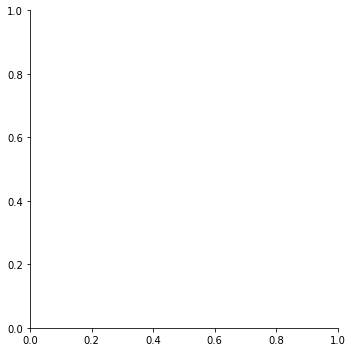

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

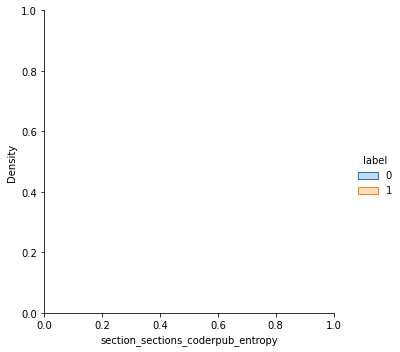

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

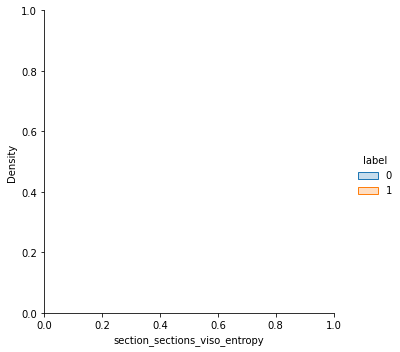

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

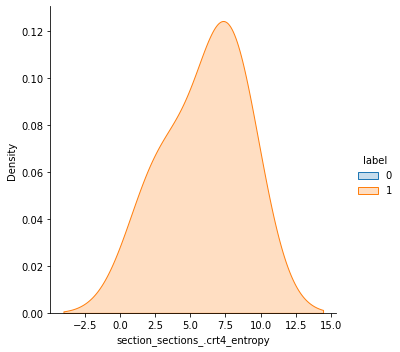

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

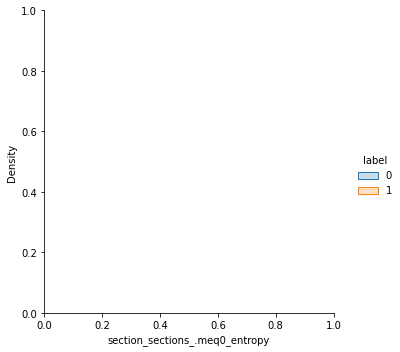

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

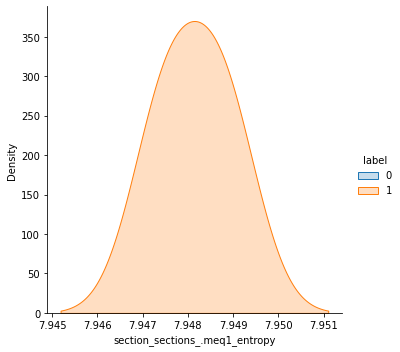

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

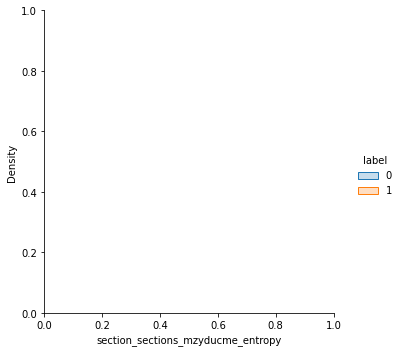

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

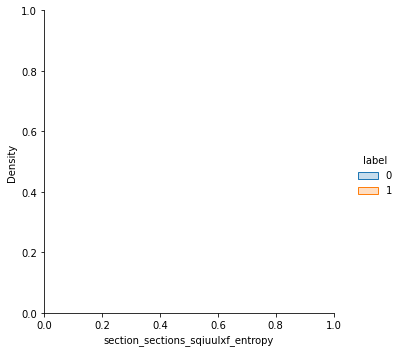

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

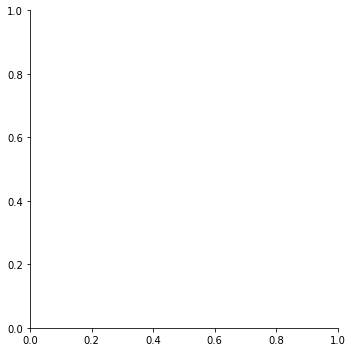

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

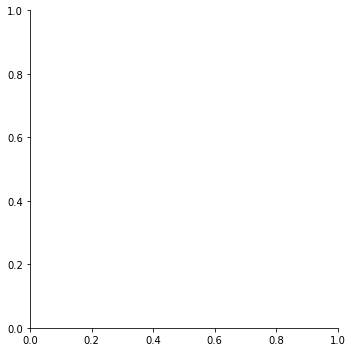

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

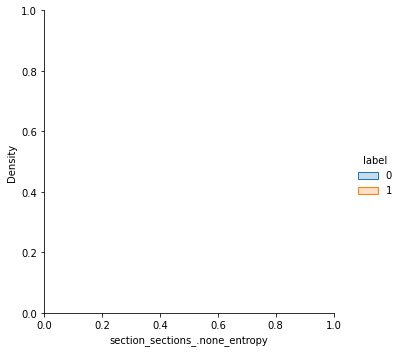

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

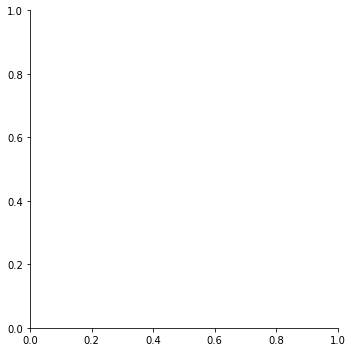

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

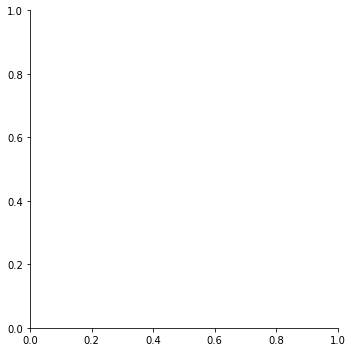

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

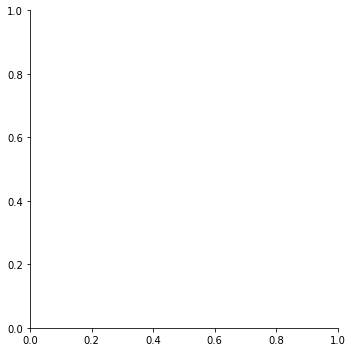

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

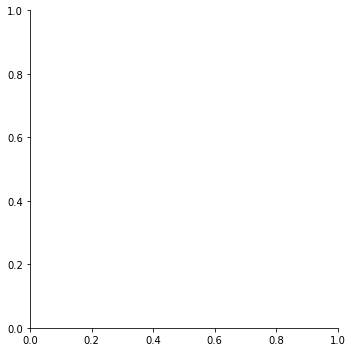

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

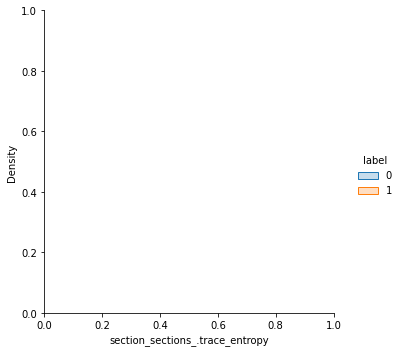

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

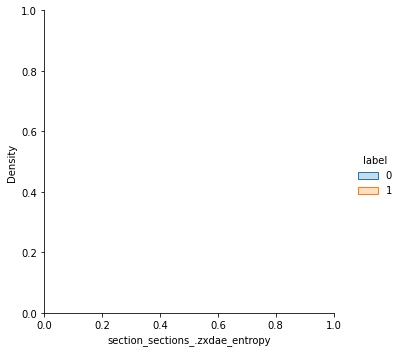

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

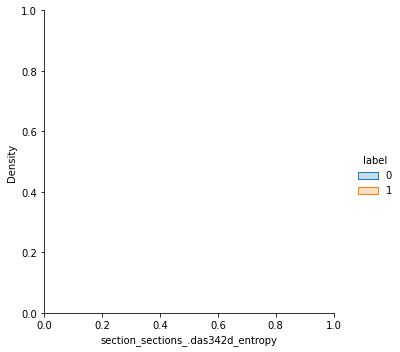

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

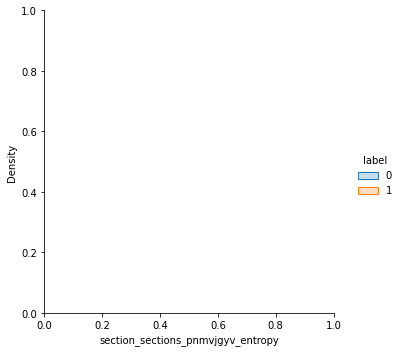

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

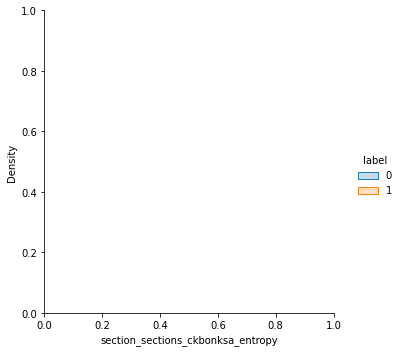

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

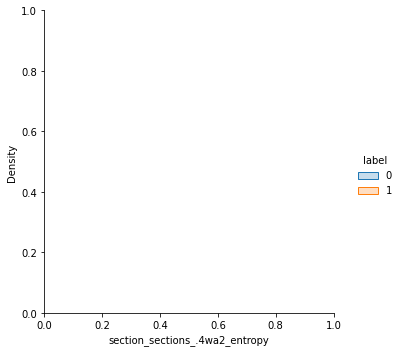

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

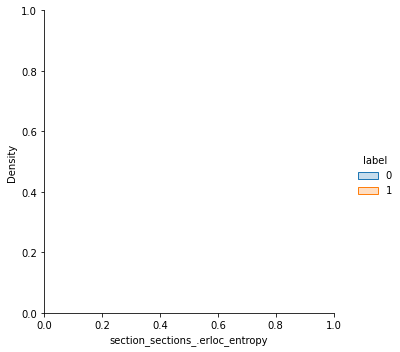

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

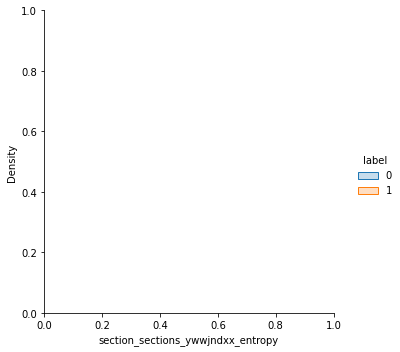

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

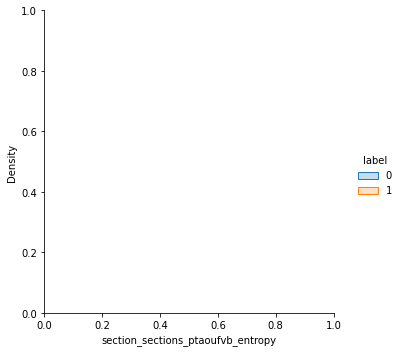

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

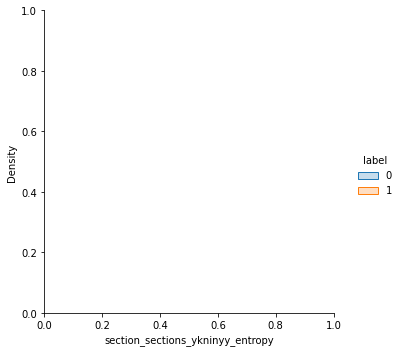

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

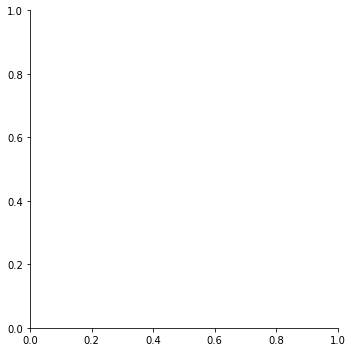

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

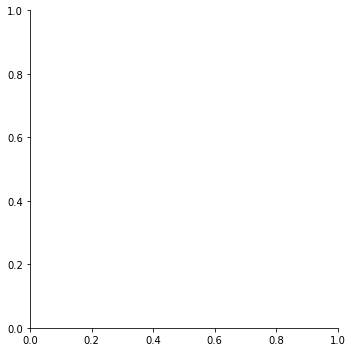

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

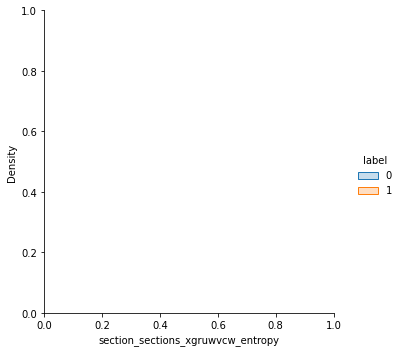

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

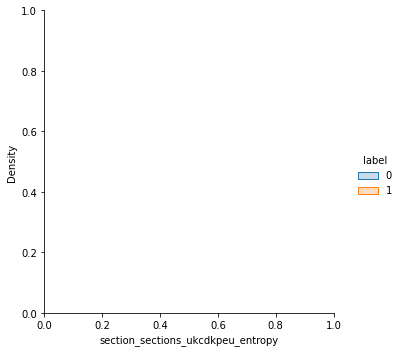

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

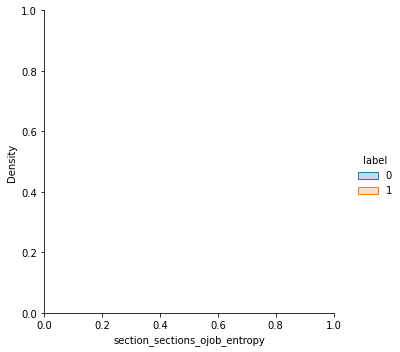

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

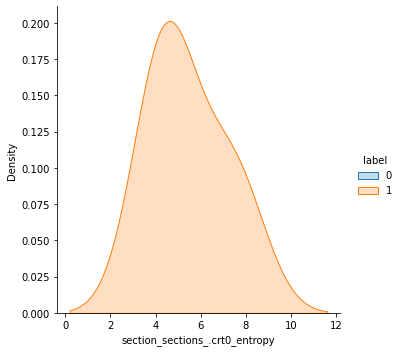

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

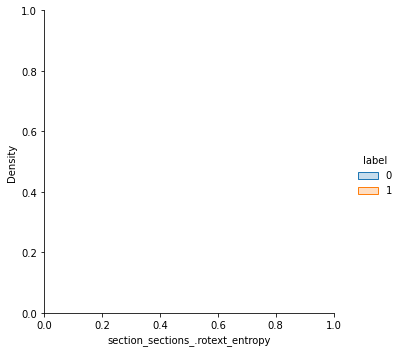

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

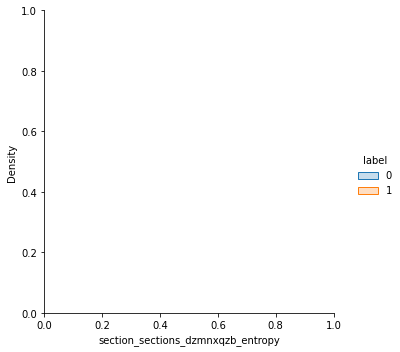

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

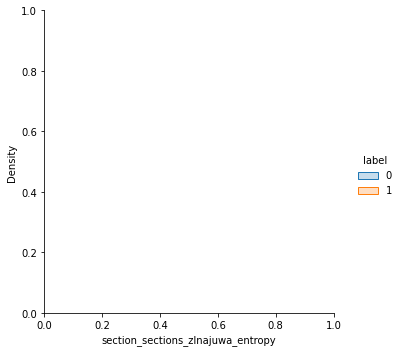

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

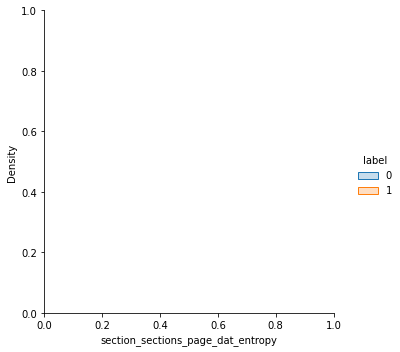

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

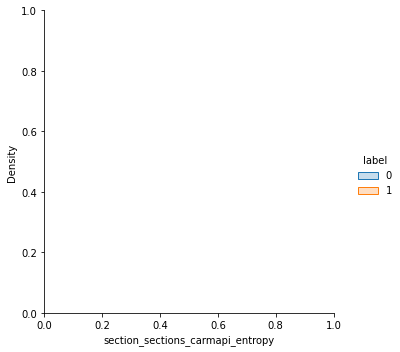

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

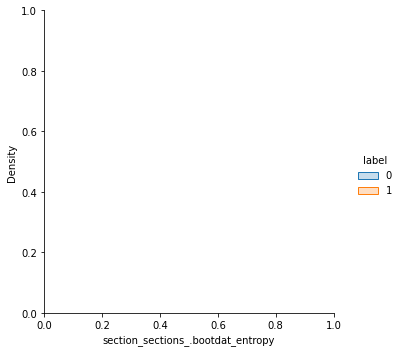

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

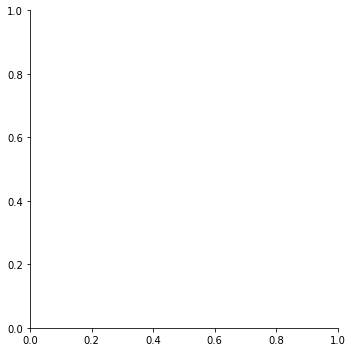

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

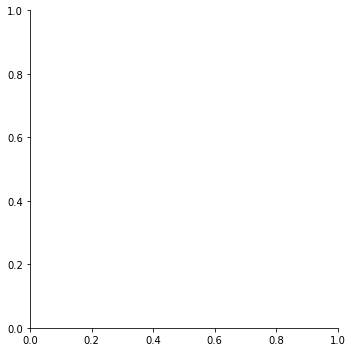

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

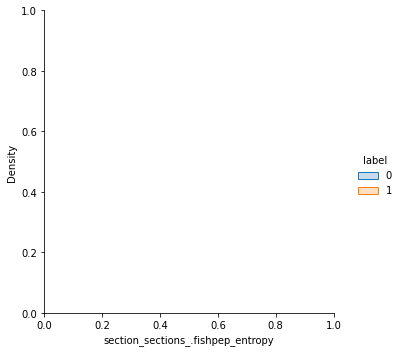

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

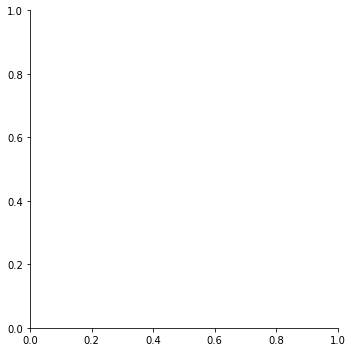

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

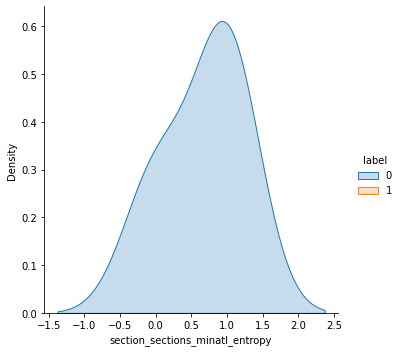

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

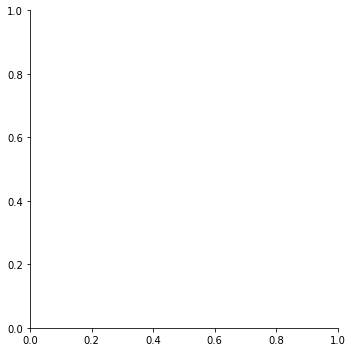

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

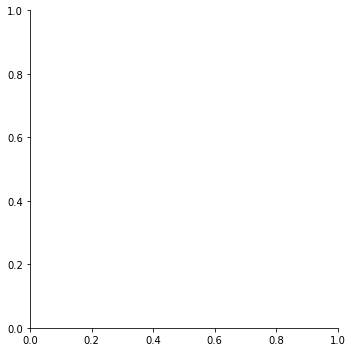

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

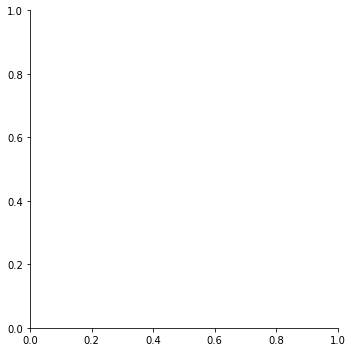

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

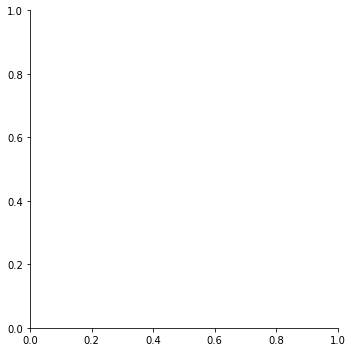

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

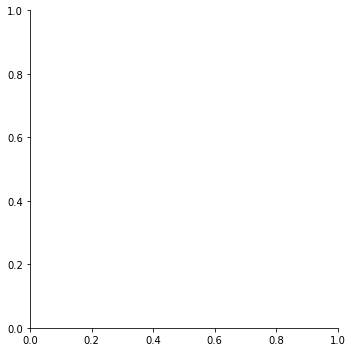

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

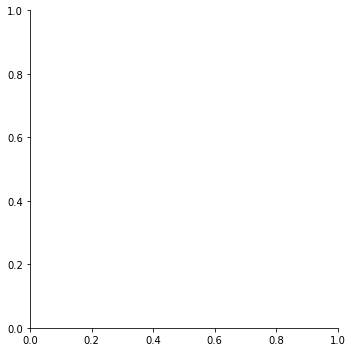

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

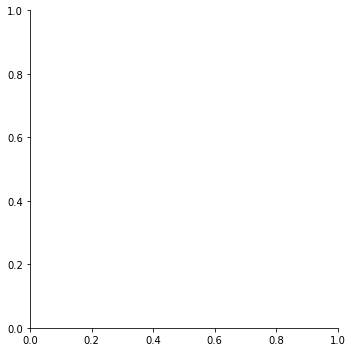

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

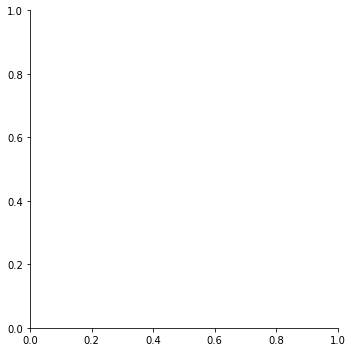

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

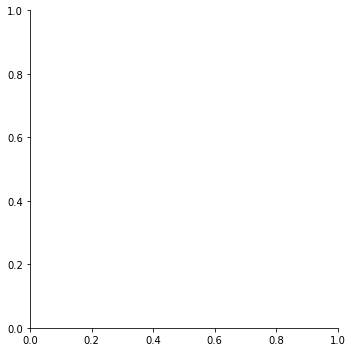

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

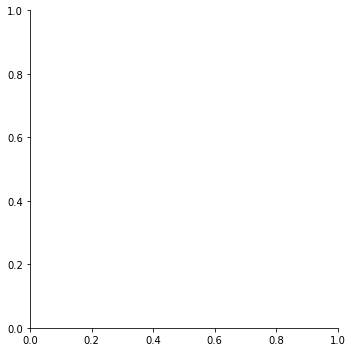

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

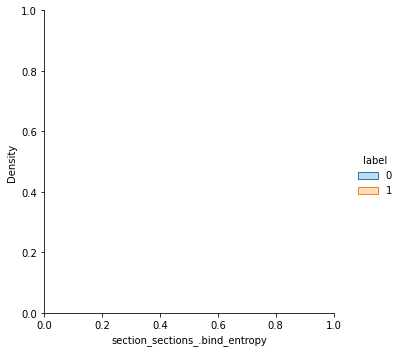

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

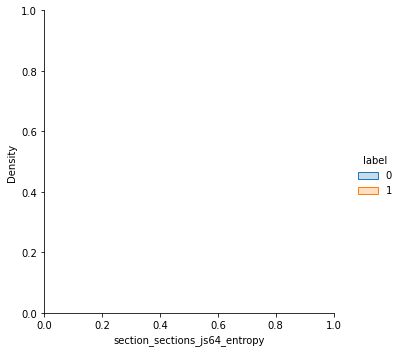

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

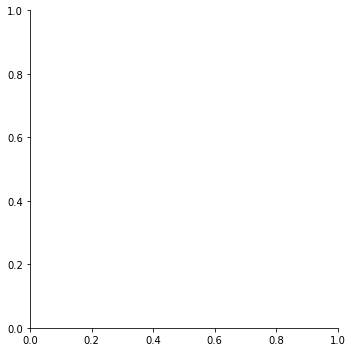

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

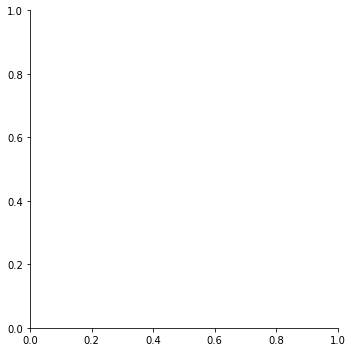

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

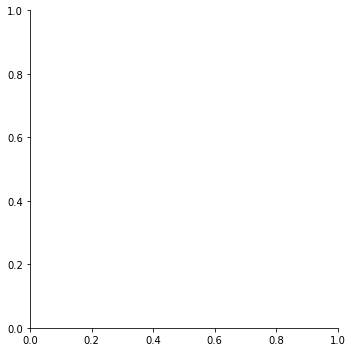

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

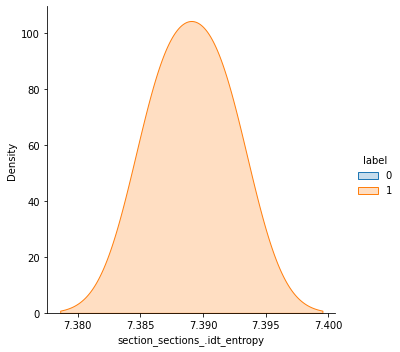

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

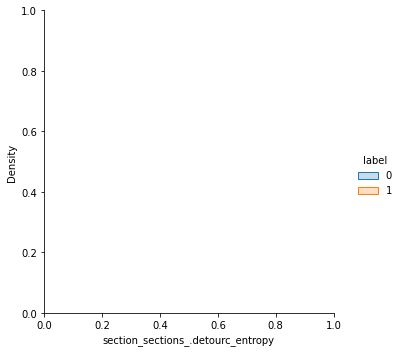

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

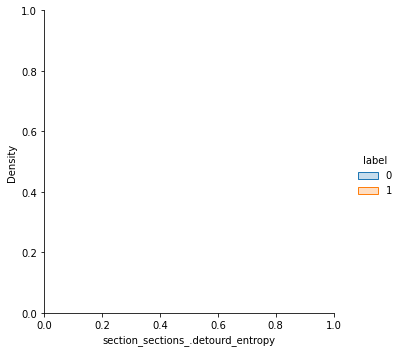

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

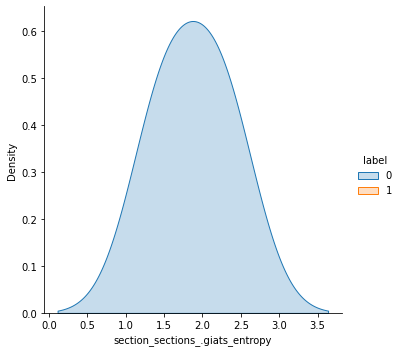

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

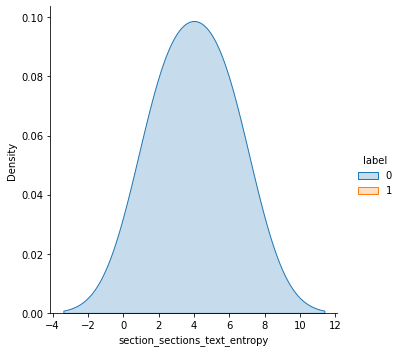

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

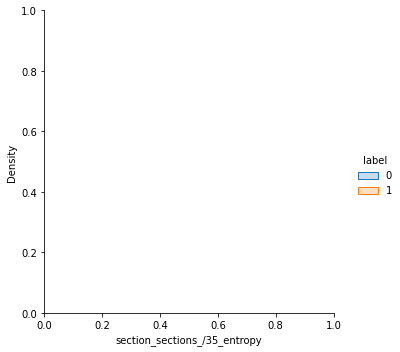

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

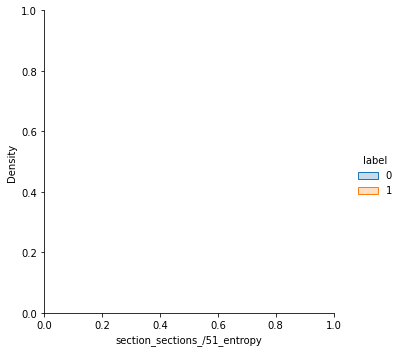

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

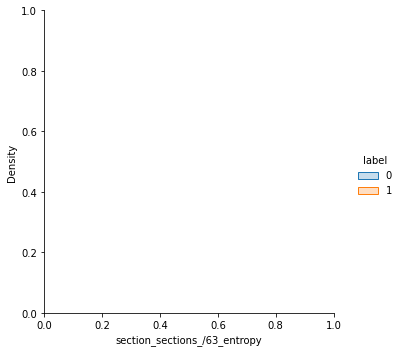

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

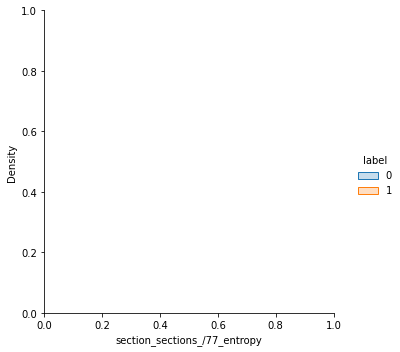

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

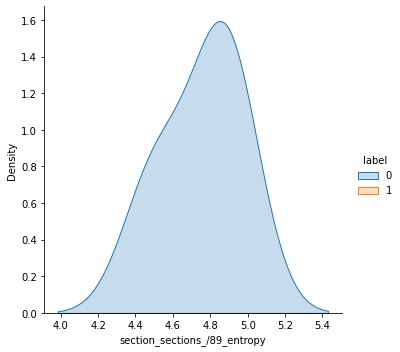

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

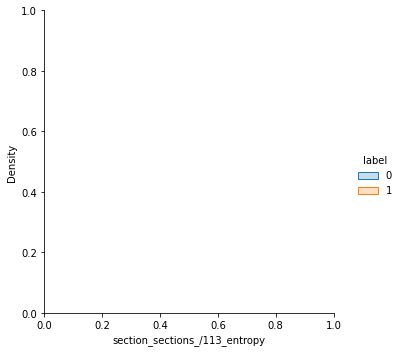

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

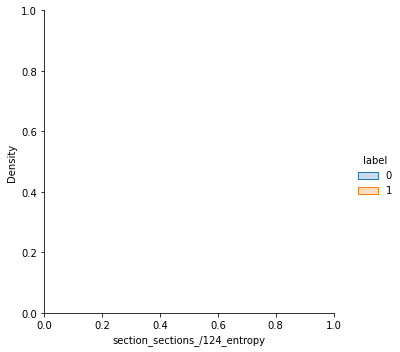

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

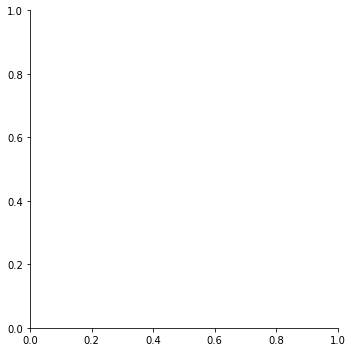

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

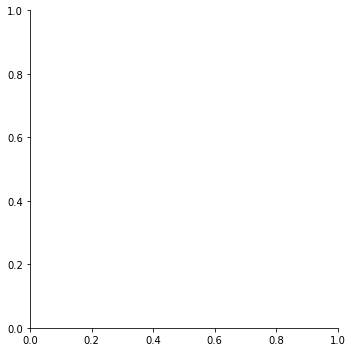

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

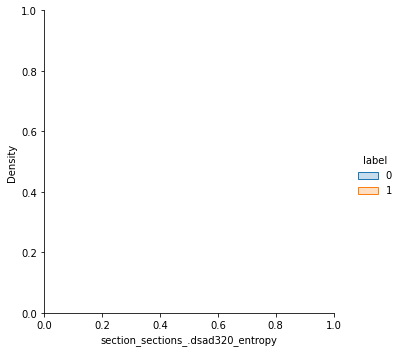

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

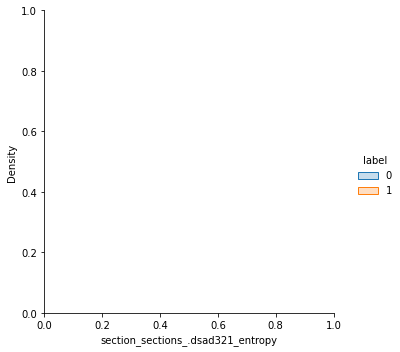

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

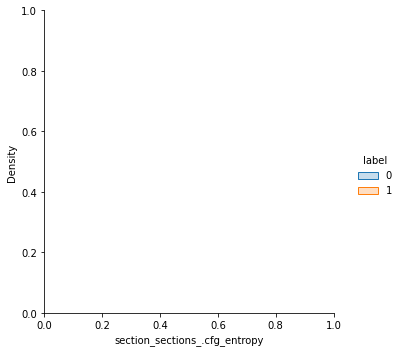

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

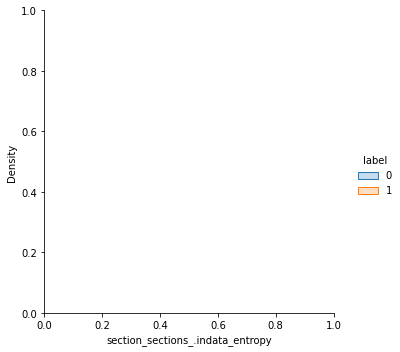

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

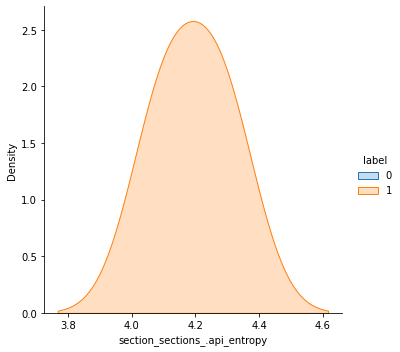

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

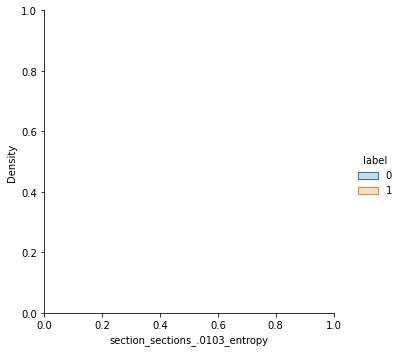

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

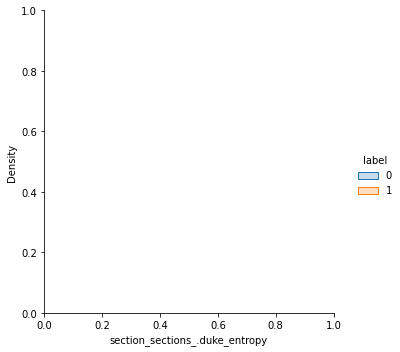

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

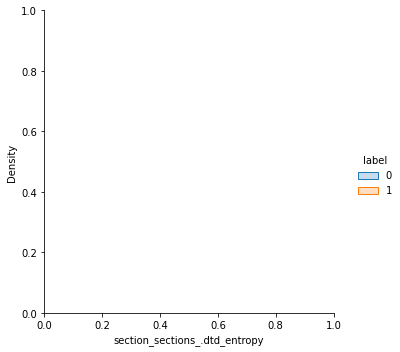

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

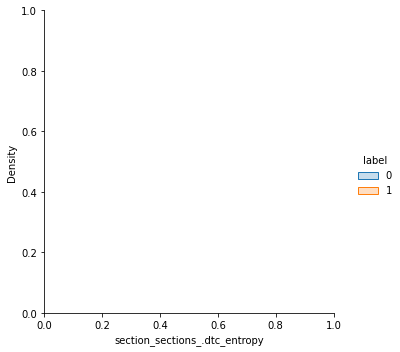

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

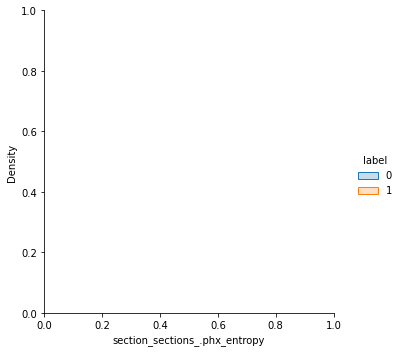

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

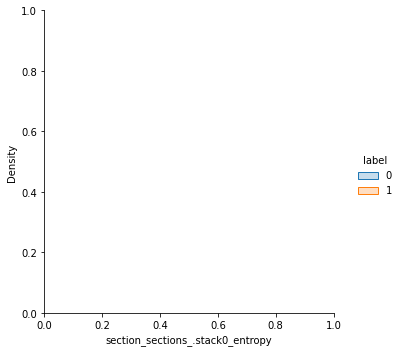

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

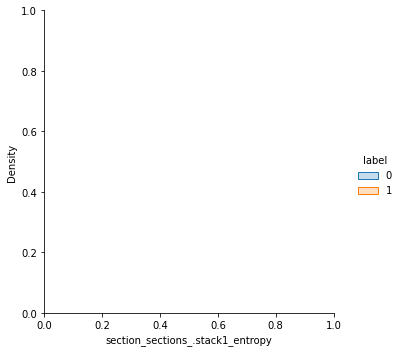

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

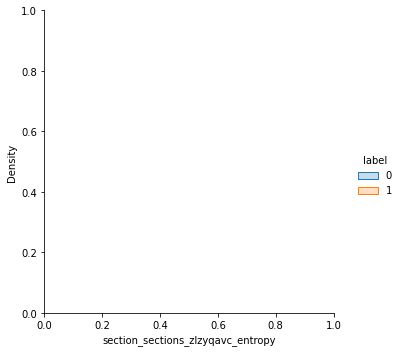

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

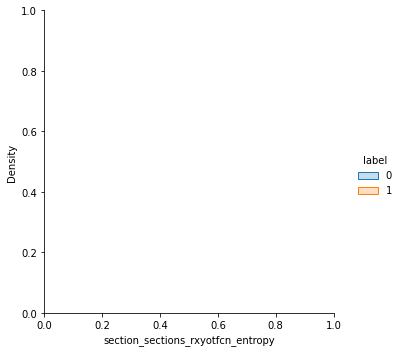

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

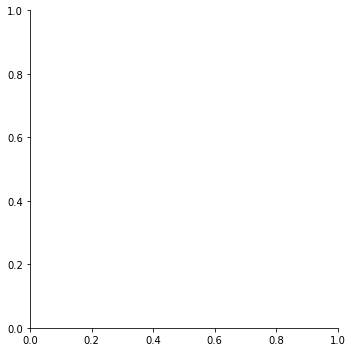

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

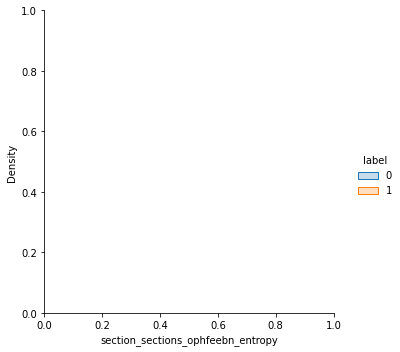

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

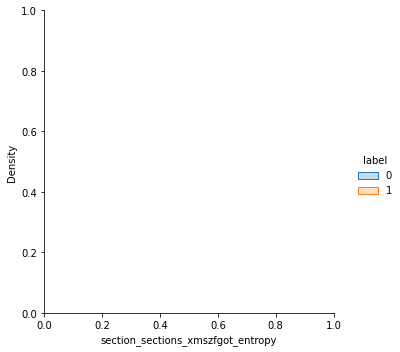

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

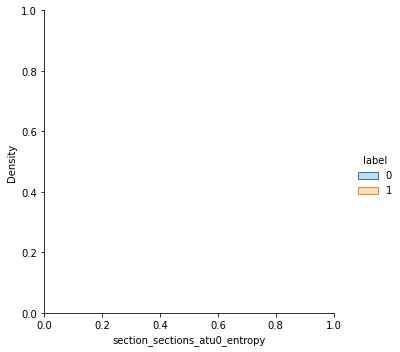

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

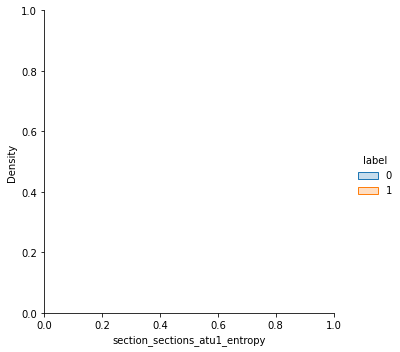

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

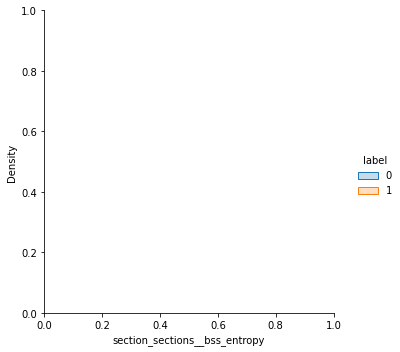

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

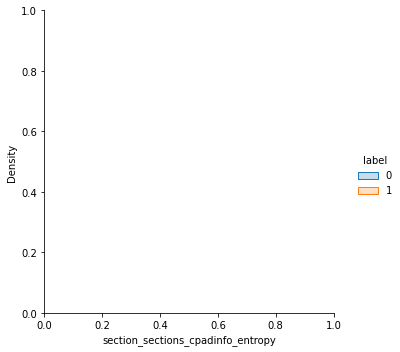

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

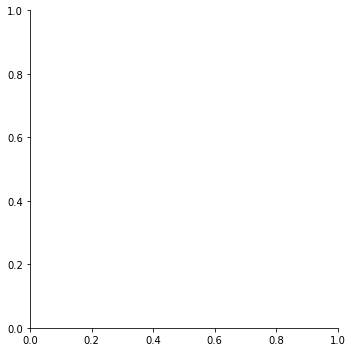

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

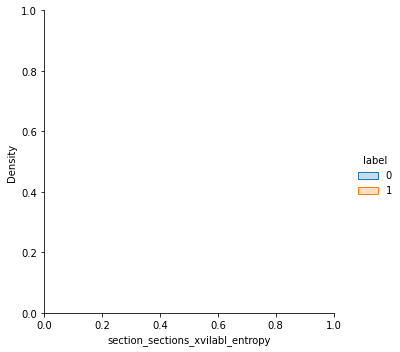

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

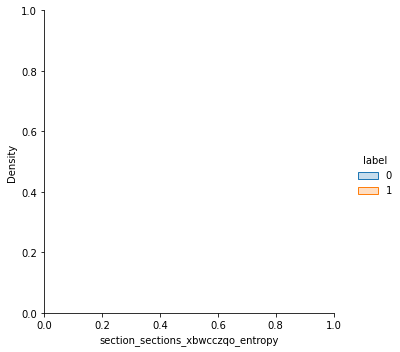

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

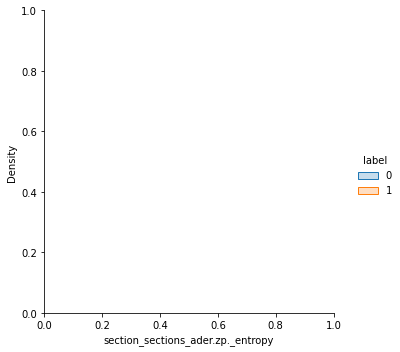

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

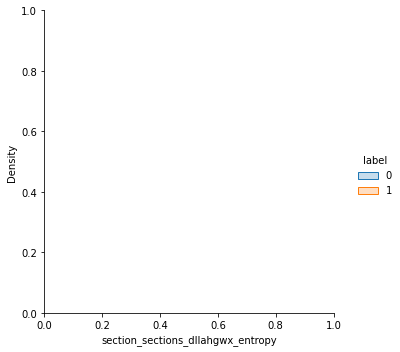

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

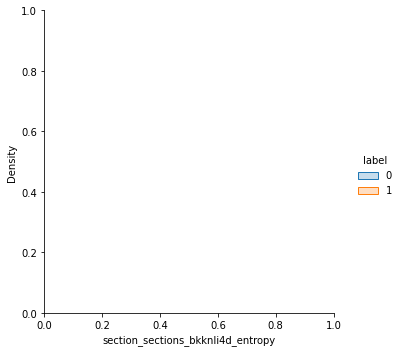

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

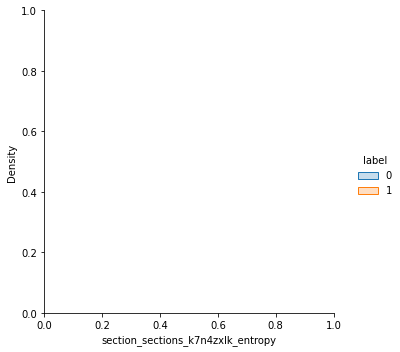

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

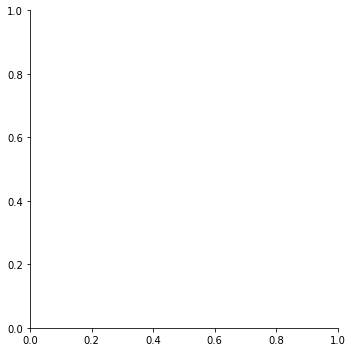

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

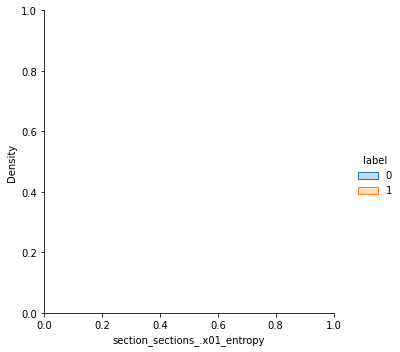

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

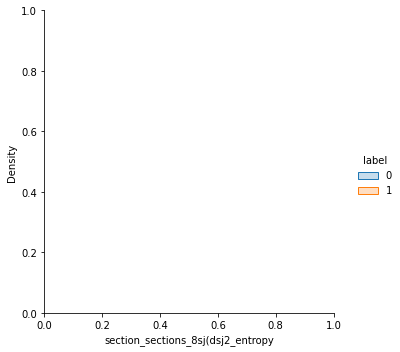

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

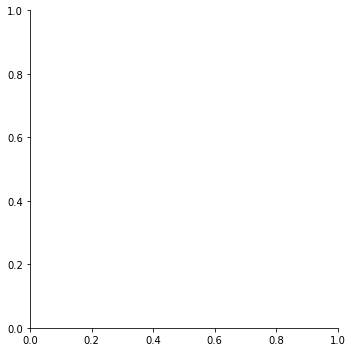

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

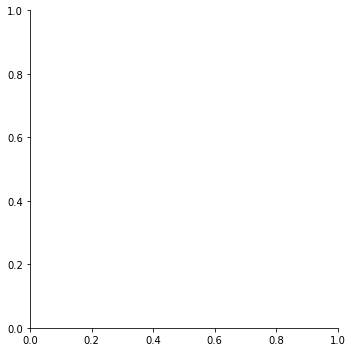

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

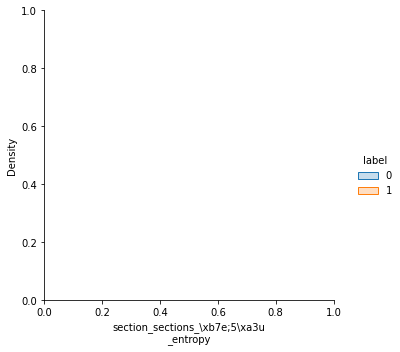

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

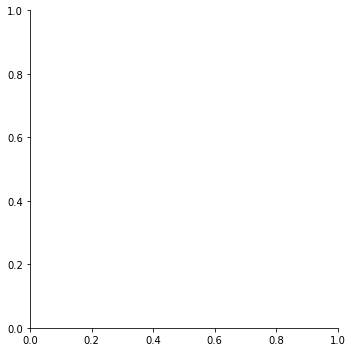

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

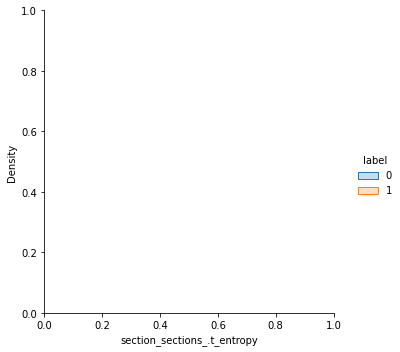

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

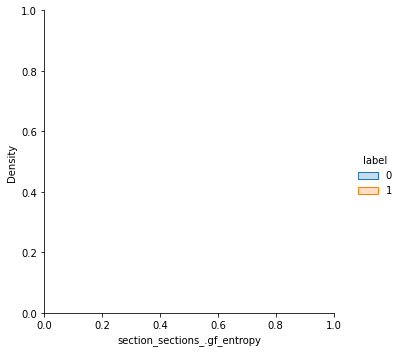

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

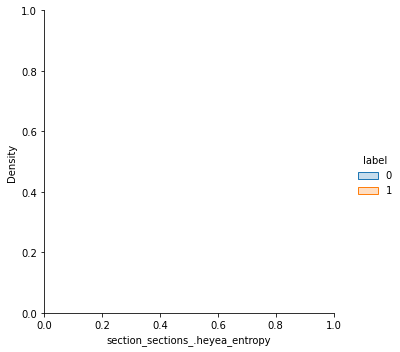

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

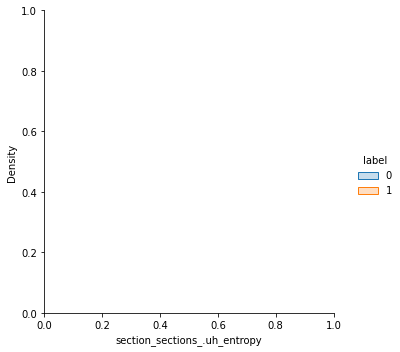

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

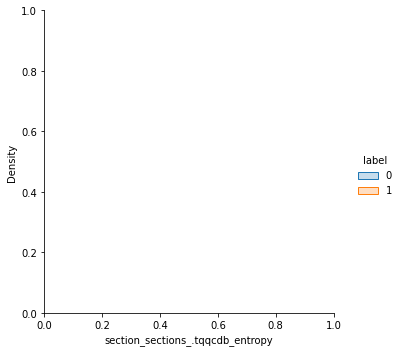

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

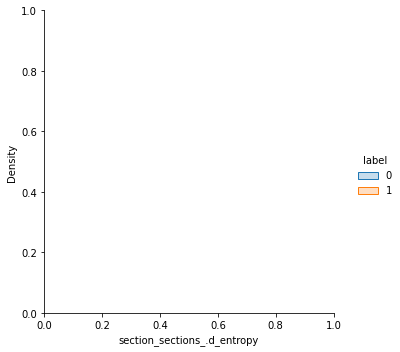

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

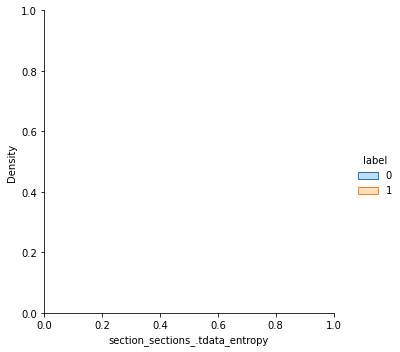

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

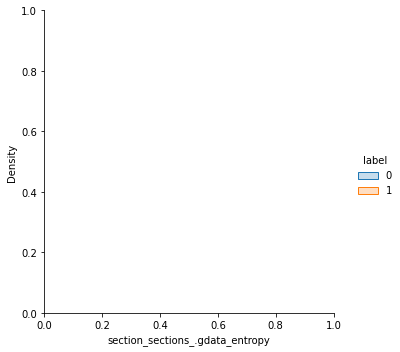

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

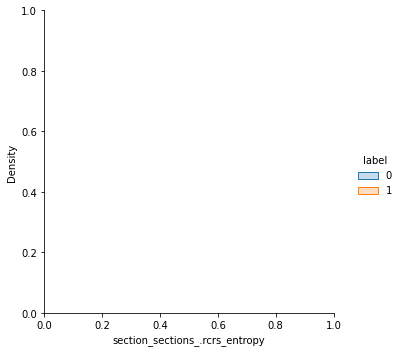

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

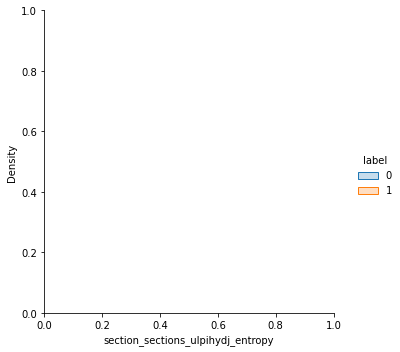

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

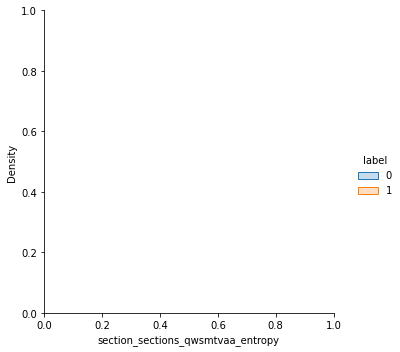

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

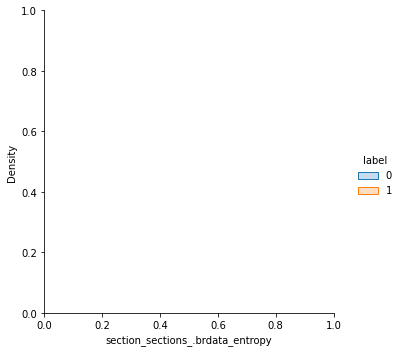

/Users/aleksandram/opt/anaconda3/envs/cyber/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


LinAlgError: singular matrix

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

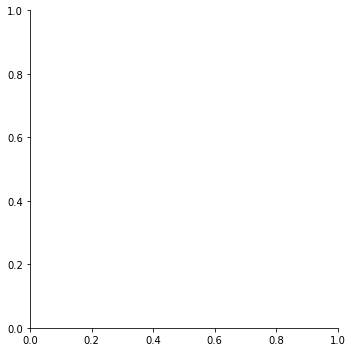

In [817]:
# plotting entropy considering label for all sections 

for col in df_r.columns[df_r.columns.str.endswith('_entropy')]:
    plot_histogram(df_r,col, False)

In [ ]:
'code','data','aspack'""

In [ ]:
# 100% malware 'upx0'

In [ ]:
#raczej spoko: .pdata, init, .adata

In [ ]:
# Count of suspicious sections

In [819]:
test=df_r[df_r.columns[df_r.columns.str.endswith('_entropy')]].iloc[7,:]

In [824]:
test[~np.isnan(test)].index

Index(['section_sections_.text_entropy', 'section_sections_.rdata_entropy', 'section_sections_.data_entropy', 'section_sections_.rsrc_entropy', 'section_sections_.reloc_entropy'], dtype='object')

In [830]:
[k.replace('section_sections_',"").replace('_entropy',"") for k in test[~np.isnan(test)].index]

['.text', '.rdata', '.data', '.rsrc', '.reloc']

In [920]:
def get_non_standard_section_ratio(row, good_sections):
    
    labels = row[~np.isnan(row)].index
    
    list_of_names = [k.replace('section_sections_',"").replace('_entropy',"") for k in labels]
    
    proper_filter = [lab for lab in list_of_names if lab not in good_sections]
    
    if len(list_of_names) == 0:
        return np.NaN
    else:
        return len(proper_filter) /len(list_of_names)
    

In [921]:
df_r['section_has_non_standard_sections_ratio'] = df_r[df_r.columns[df_r.columns.str.endswith('_entropy')]].apply(lambda x: get_non_standard_section_ratio(x,standard_entries),axis=1)

In [842]:
df_r[columns].head()

section_non_standard_section_ratio  section_high_entropy_ratio  section_entropy_max
0                                0.20                        0.22                 6.19
1                                0.20                        0.33                 6.64
2                                0.00                        0.29                 6.05
3                                0.00                        0.40                 7.85
4                                0.62                        0.25                 6.90

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

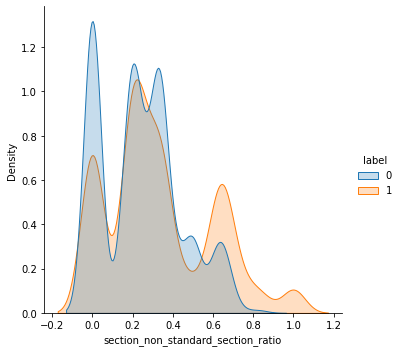

In [843]:
plot_histogram(df_r, 'section_non_standard_section_ratio',False)

In [905]:
columns = ['section_has_non_standard_entry','section_has_non_standard_sections_ratio', 'section_high_entropy_ratio','section_entropy_max']

In [849]:
df_r[columns].describe()

section_has_non_standard_entry  section_has_non_standard_sections_ratio  section_high_entropy_ratio  section_entropy_max
count                         3864.00                                  3863.00                     3864.00              3864.00
mean                             0.26                                     0.29                        0.24                 6.56
std                              0.44                                     0.24                        0.14                 1.07
min                              0.00                                     0.00                        0.00                 0.00
25%                              0.00                                     0.14                        0.18                 6.19
50%                              0.00                                     0.25                        0.25                 6.61
75%                              1.00                                     0.38                        0.33                 7.25
max                              1.00                                     1.00                        0.85                11.00

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

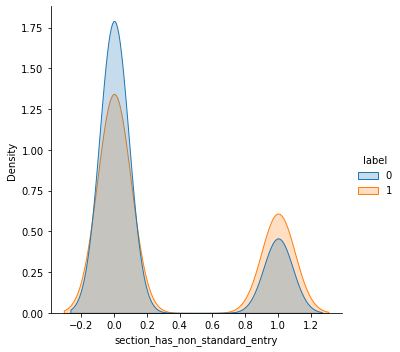

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

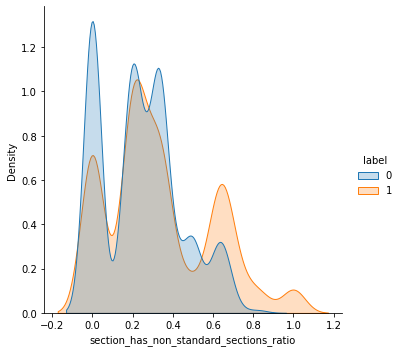

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

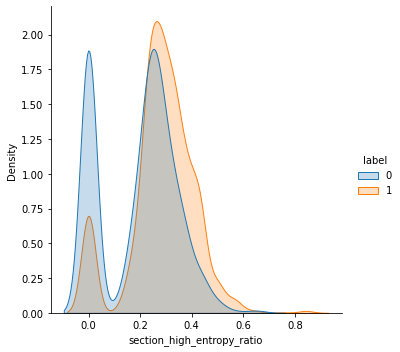

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

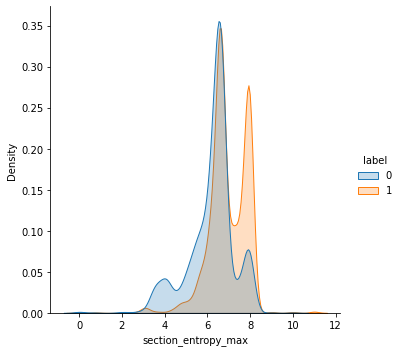

In [848]:
for col in columns:
    plot_histogram(df_r, col, False)

In [876]:
df_r[df_r.columns[df_r.columns.str.contains('coff')]]

header_coff_timestamp header_coff_machine                        header_coff_characteristics
0                1301832471                I386  [CHARA_32BIT_MACHINE, RELOCS_STRIPPED, EXECUTA...
1                1511340343                I386            [CHARA_32BIT_MACHINE, EXECUTABLE_IMAGE]
2                1510798547                I386  [CHARA_32BIT_MACHINE, RELOCS_STRIPPED, EXECUTA...
3                1514434785                I386  [CHARA_32BIT_MACHINE, RELOCS_STRIPPED, EXECUTA...
4                 708992537                I386  [CHARA_32BIT_MACHINE, BYTES_REVERSED_LO, EXECU...
...                     ...                 ...                                                ...
3859              982600987                I386  [CHARA_32BIT_MACHINE, RELOCS_STRIPPED, EXECUTA...
3860             1005228158                I386  [LOCAL_SYMS_STRIPPED, CHARA_32BIT_MACHINE, EXE...
3861             1238606545                I386  [CHARA_32BIT_MACHINE, RELOCS_STRIPPED, EXECUTA...
3862             1074714471                I386  [CHARA_32BIT_MACHINE, RELOCS_STRIPPED, EXECUTA...
3863             1211073481                I386  [CHARA_32BIT_MACHINE, RELOCS_STRIPPED, EXECUTA...

[3864 rows x 3 columns]

<Figure size 432x288 with 0 Axes>

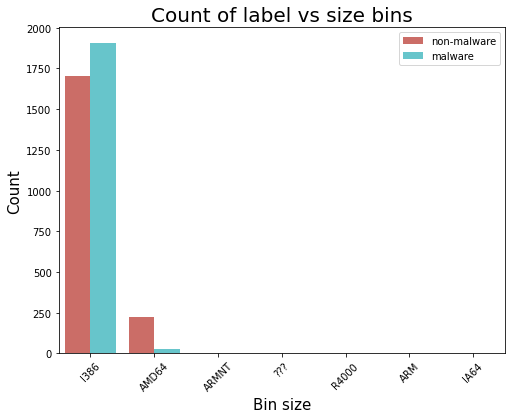

chi_2 statistic: 180.16
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency


In [879]:
plot_chi(df_r,'header_coff_machine')

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

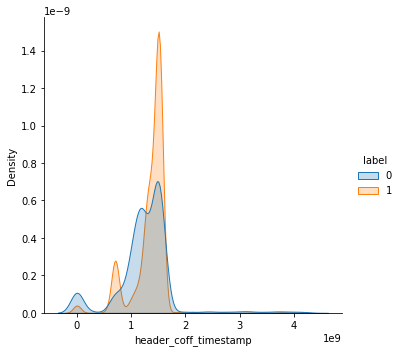

In [874]:
plot_histogram(df_r,'header_coff_timestamp', False)

In [893]:
df_r[(df_r.columns[df_r.columns.str.contains('optional')])

TypeError: bad operand type for unary ~: 'Index'

In [897]:
df_r[df_r.columns[df_r.columns.str.contains('optional')]]

header_optional_subsystem               header_optional_dll_characteristics header_optional_magic  header_optional_major_image_version  header_optional_minor_image_version  header_optional_major_linker_version  header_optional_minor_linker_version  header_optional_major_operating_system_version  header_optional_minor_operating_system_version  header_optional_major_subsystem_version  header_optional_minor_subsystem_version
0                  WINDOWS_GUI                                                []                  PE32                                    0                                    0                                     2                                    50                                               4                                               0                                        4                                        0
1                  WINDOWS_GUI  [DYNAMIC_BASE, NX_COMPAT, TERMINAL_SERVER_AWARE]                  PE32                                    0                                    0                                    14                                    11                                               5                                               1                                        5                                        1
2                  WINDOWS_GUI                [NX_COMPAT, TERMINAL_SERVER_AWARE]                  PE32                                    0                                    0                                    10                                     0                                               5                                               1                                        5                                        1
3                  WINDOWS_GUI                                                []                  PE32                                    0                                    0                                     5                                    12                                               4                                               0                                        4                                        0
4                  WINDOWS_GUI                                                []                  PE32                                    0                                    0                                     2                                    25                                               4                                               0                                        4                                        0
...                        ...                                               ...                   ...                                  ...                                  ...                                   ...                                   ...                                             ...                                             ...                                      ...                                      ...
3859               WINDOWS_GUI                                                []                  PE32                                    0                                    0                                     6                                     0                                               4                                               0                                        4                                        0
3860               WINDOWS_GUI                                                []                  PE32                                    0                                    0                                     6                                     0                                               4                                               0                                        4                                        0
3861               WINDOWS_GUI                           [TERMINAL_SERVER_AWARE]                  PE32                        

<Figure size 432x288 with 0 Axes>

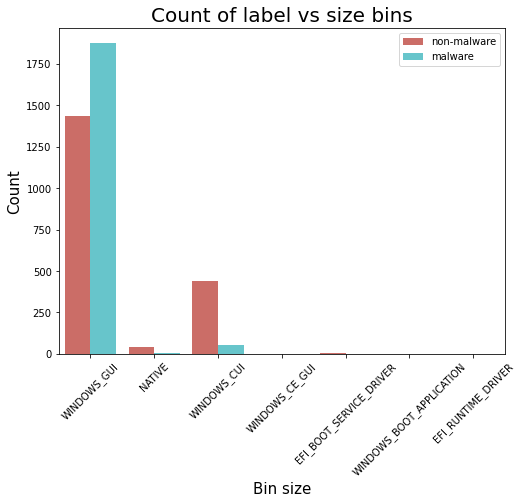

chi_2 statistic: 407.33
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency


In [883]:
plot_chi(df_r,'header_optional_subsystem')

<Figure size 432x288 with 0 Axes>

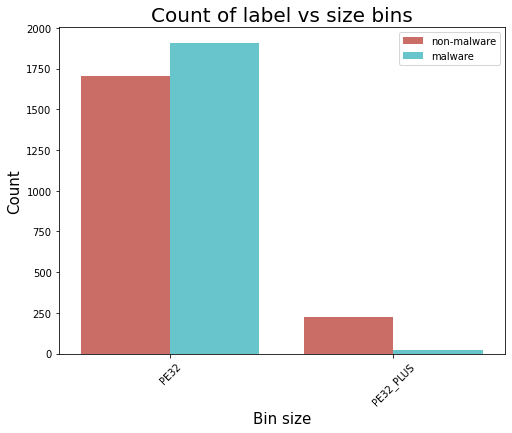

chi_2 statistic: 173.86
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency


In [884]:
plot_chi(df_r, 'header_optional_magic')

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

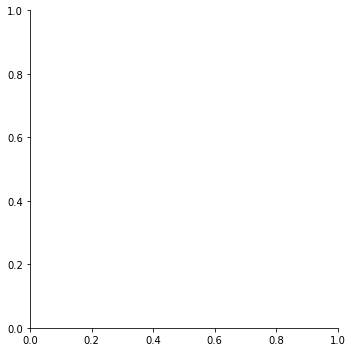

In [904]:
for col in df_r.columns[df_r.columns.str.contains('optional')]:
    if col != 'header_optional_dll_characteristics':
        plot_histogram(df_r, col, False)
    
    

In [925]:
from scipy import stats
round(stats.pointbiserialr(df_r['section_entropy_max'],df_r['label']).pvalue,2)

0.0

In [936]:
p =df_r[columns].fillna(0).copy()

In [937]:
for col in columns:
    print(stats.pointbiserialr(df_r['label'], p[col]))
    

PointbiserialrResult(correlation=0.12425104557694777, pvalue=9.107624752416753e-15)
PointbiserialrResult(correlation=0.18937213010361237, pvalue=1.5892246155138429e-32)
PointbiserialrResult(correlation=0.30467495850668314, pvalue=8.382010316101143e-84)
PointbiserialrResult(correlation=0.34779516590205384, pvalue=2.790225290247606e-110)


In [942]:
stats.pointbiserialr(df_r['section_has_non_standard_entry'], p['section_high_entropy_ratio'])

PointbiserialrResult(correlation=-0.0006869026566475304, pvalue=0.9659527949692037)

In [911]:
df_r['section_has_non_standard_sections_ratio'], 

KeyError: 'section_has_non_standard_sections_ratio'

In [906]:
plot_chi()

['section_has_non_standard_entry',
 'section_has_non_standard_sections_ratio',
 'section_high_entropy_ratio',
 'section_entropy_max']

<Figure size 432x288 with 0 Axes>

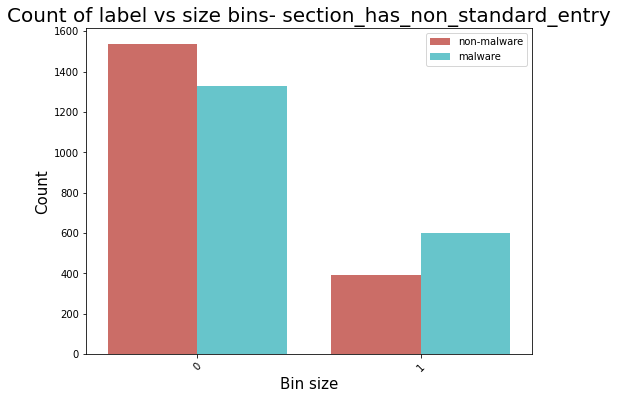

chi_2 statistic: 59.09
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency


In [938]:
plot_chi(df_r, 'section_has_non_standard_entry')